In [1]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt

from models.WGANGP4 import WGANGP
from utils.loaders import load_celeb

import pickle

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0013'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'load' #'load' #

In [3]:
print(RUN_FOLDER)

run/gan/0013_celeb


Found 202599 images belonging to 1 classes.


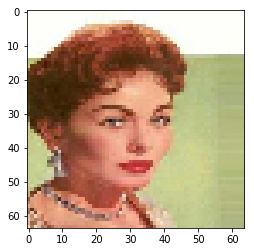

In [4]:
BATCH_SIZE = 128
IMAGE_SIZE = 64
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)
plt.imshow((x_train[0][0][0]+1)/2)

In [5]:
gan = WGANGP(input_dim = (IMAGE_SIZE, IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [2,2,2,2]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [3,3,3,3]
        , generator_conv_strides = [1,1,1,1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = 0.5
        , optimiser = 'adam'
        , initial_learning_rate = 0.0001
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights-2600.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
gan.critic.summary()
gan.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [7]:
EPOCHS = 20000
PRINT_EVERY_N_BATCHES = 50
N_CRITIC = 5
BATCH_SIZE = 128

In [8]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)


0 (5, 1) [D loss: (-4.7800)(R 4.3257, F -9.7156, G 0.0610)] [G loss: 10.5]
1 (5, 1) [D loss: (-5.8657)(R 5.3082, F -11.7039, G 0.0530)] [G loss: 13.3]
2 (5, 1) [D loss: (-6.7209)(R 4.8814, F -12.2041, G 0.0602)] [G loss: 12.1]
3 (5, 1) [D loss: (-6.6003)(R 5.9959, F -13.2028, G 0.0607)] [G loss: 12.2]
4 (5, 1) [D loss: (-6.8092)(R 4.1604, F -11.7031, G 0.0733)] [G loss: 11.5]
5 (5, 1) [D loss: (-7.3572)(R 3.8424, F -11.8933, G 0.0694)] [G loss: 11.8]
6 (5, 1) [D loss: (-7.3741)(R 5.7203, F -13.9559, G 0.0861)] [G loss: 14.0]
7 (5, 1) [D loss: (-7.3983)(R 6.5859, F -14.7510, G 0.0767)] [G loss: 14.3]
8 (5, 1) [D loss: (-6.6086)(R 8.3693, F -15.8698, G 0.0892)] [G loss: 13.4]
9 (5, 1) [D loss: (-6.5585)(R 4.4585, F -11.9225, G 0.0905)] [G loss: 12.3]
10 (5, 1) [D loss: (-6.8219)(R 3.2201, F -10.8634, G 0.0821)] [G loss: 11.0]
11 (5, 1) [D loss: (-7.1441)(R 3.5350, F -11.5828, G 0.0904)] [G loss: 11.2]
12 (5, 1) [D loss: (-7.4543)(R 2.8042, F -11.1231, G 0.0865)] [G loss: 12.2]
13 (5, 1) 

104 (5, 1) [D loss: (-7.1639)(R 4.2685, F -12.2742, G 0.0842)] [G loss: 9.9]
105 (5, 1) [D loss: (-7.1374)(R -1.5367, F -6.4795, G 0.0879)] [G loss: 7.0]
106 (5, 1) [D loss: (-8.1205)(R -1.2907, F -7.8369, G 0.1007)] [G loss: 7.0]
107 (5, 1) [D loss: (-7.4438)(R 1.8744, F -10.2548, G 0.0937)] [G loss: 11.0]
108 (5, 1) [D loss: (-7.7247)(R 4.0287, F -12.7201, G 0.0967)] [G loss: 11.6]
109 (5, 1) [D loss: (-6.0761)(R 0.6918, F -7.8906, G 0.1123)] [G loss: 8.0]
110 (5, 1) [D loss: (-6.8199)(R -1.1349, F -6.7409, G 0.1056)] [G loss: 6.8]
111 (5, 1) [D loss: (-6.7549)(R 6.8487, F -14.4008, G 0.0797)] [G loss: 15.2]
112 (5, 1) [D loss: (-7.4273)(R 3.7391, F -12.1607, G 0.0994)] [G loss: 11.1]
113 (5, 1) [D loss: (-6.7398)(R 1.9133, F -9.4534, G 0.0800)] [G loss: 9.9]
114 (5, 1) [D loss: (-7.0988)(R 1.5612, F -9.6550, G 0.0995)] [G loss: 9.6]
115 (5, 1) [D loss: (-7.2318)(R 3.8974, F -12.0384, G 0.0909)] [G loss: 11.3]
116 (5, 1) [D loss: (-7.1615)(R 1.8985, F -10.0157, G 0.0956)] [G loss: 9.

211 (5, 1) [D loss: (-7.0676)(R -0.3782, F -7.6111, G 0.0922)] [G loss: 7.0]
212 (5, 1) [D loss: (-6.4964)(R 0.0425, F -7.5093, G 0.0970)] [G loss: 7.6]
213 (5, 1) [D loss: (-6.6673)(R 0.5938, F -8.1874, G 0.0926)] [G loss: 8.6]
214 (5, 1) [D loss: (-7.2605)(R -1.8782, F -6.4454, G 0.1063)] [G loss: 5.6]
215 (5, 1) [D loss: (-7.3133)(R -1.9440, F -6.3788, G 0.1010)] [G loss: 6.8]
216 (5, 1) [D loss: (-6.5327)(R -0.4112, F -6.9490, G 0.0827)] [G loss: 8.2]
217 (5, 1) [D loss: (-7.4894)(R 0.1062, F -8.5743, G 0.0979)] [G loss: 7.1]
218 (5, 1) [D loss: (-7.8041)(R -4.2911, F -4.6321, G 0.1119)] [G loss: 4.7]
219 (5, 1) [D loss: (-6.4243)(R -3.4733, F -3.9316, G 0.0981)] [G loss: 4.0]
220 (5, 1) [D loss: (-6.9678)(R -0.5080, F -7.3808, G 0.0921)] [G loss: 7.7]
221 (5, 1) [D loss: (-7.7042)(R -0.2881, F -8.3544, G 0.0938)] [G loss: 6.3]
222 (5, 1) [D loss: (-7.5570)(R 2.9688, F -11.4585, G 0.0933)] [G loss: 10.4]
223 (5, 1) [D loss: (-6.2994)(R 2.0020, F -9.3344, G 0.1033)] [G loss: 9.3]
22

317 (5, 1) [D loss: (-6.6964)(R 3.5227, F -11.2007, G 0.0982)] [G loss: 10.7]
318 (5, 1) [D loss: (-7.4083)(R 0.8332, F -9.1956, G 0.0954)] [G loss: 10.2]
319 (5, 1) [D loss: (-7.2841)(R 0.5235, F -8.8998, G 0.1092)] [G loss: 8.5]
320 (5, 1) [D loss: (-7.4030)(R -1.2018, F -7.2077, G 0.1007)] [G loss: 7.4]
321 (5, 1) [D loss: (-7.5371)(R -3.3098, F -5.4637, G 0.1236)] [G loss: 4.0]
322 (5, 1) [D loss: (-6.8080)(R 2.2246, F -10.0098, G 0.0977)] [G loss: 10.7]
323 (5, 1) [D loss: (-7.5166)(R 4.4289, F -13.0055, G 0.1060)] [G loss: 12.9]
324 (5, 1) [D loss: (-7.0607)(R 3.3578, F -11.3641, G 0.0946)] [G loss: 10.9]
325 (5, 1) [D loss: (-7.4500)(R 4.5939, F -13.0594, G 0.1015)] [G loss: 13.0]
326 (5, 1) [D loss: (-7.0808)(R 4.0355, F -12.0880, G 0.0972)] [G loss: 12.9]
327 (5, 1) [D loss: (-7.0978)(R 4.8328, F -12.9516, G 0.1021)] [G loss: 13.0]
328 (5, 1) [D loss: (-7.0111)(R 0.9785, F -9.0805, G 0.1091)] [G loss: 8.3]
329 (5, 1) [D loss: (-7.2166)(R 0.5155, F -8.8708, G 0.1139)] [G loss: 

423 (5, 1) [D loss: (-6.9534)(R 1.7160, F -9.6897, G 0.1020)] [G loss: 11.9]
424 (5, 1) [D loss: (-7.2742)(R 3.2754, F -11.6542, G 0.1105)] [G loss: 12.0]
425 (5, 1) [D loss: (-6.8702)(R 2.1906, F -10.2138, G 0.1153)] [G loss: 10.8]
426 (5, 1) [D loss: (-7.3986)(R 2.4502, F -10.9660, G 0.1117)] [G loss: 10.4]
427 (5, 1) [D loss: (-6.8556)(R 4.0945, F -11.9077, G 0.0957)] [G loss: 13.1]
428 (5, 1) [D loss: (-7.4550)(R 4.2836, F -12.8276, G 0.1089)] [G loss: 12.2]
429 (5, 1) [D loss: (-7.5518)(R 2.2796, F -10.9255, G 0.1094)] [G loss: 9.8]
430 (5, 1) [D loss: (-7.0677)(R 1.4764, F -9.5963, G 0.1052)] [G loss: 10.8]
431 (5, 1) [D loss: (-6.9605)(R 4.5009, F -12.5518, G 0.1090)] [G loss: 12.7]
432 (5, 1) [D loss: (-6.5939)(R 7.4528, F -15.1045, G 0.1058)] [G loss: 14.6]
433 (5, 1) [D loss: (-6.7757)(R 3.3264, F -11.0555, G 0.0953)] [G loss: 10.9]
434 (5, 1) [D loss: (-6.6884)(R 5.5939, F -13.2070, G 0.0925)] [G loss: 13.3]
435 (5, 1) [D loss: (-7.9394)(R 0.1523, F -9.3056, G 0.1214)] [G lo

529 (5, 1) [D loss: (-8.5537)(R 7.7553, F -17.3827, G 0.1074)] [G loss: 17.0]
530 (5, 1) [D loss: (-7.2135)(R 6.7478, F -15.0466, G 0.1085)] [G loss: 15.0]
531 (5, 1) [D loss: (-6.0585)(R 8.5987, F -15.7589, G 0.1102)] [G loss: 15.8]
532 (5, 1) [D loss: (-8.0845)(R 12.1530, F -21.2626, G 0.1025)] [G loss: 20.4]
533 (5, 1) [D loss: (-7.4999)(R 10.7129, F -19.2511, G 0.1038)] [G loss: 19.0]
534 (5, 1) [D loss: (-6.1802)(R 9.8554, F -17.1501, G 0.1114)] [G loss: 18.1]
535 (5, 1) [D loss: (-7.7415)(R 3.5047, F -12.2553, G 0.1009)] [G loss: 12.1]
536 (5, 1) [D loss: (-8.0084)(R 4.3874, F -13.4136, G 0.1018)] [G loss: 13.2]
537 (5, 1) [D loss: (-5.9358)(R 6.5611, F -13.6237, G 0.1127)] [G loss: 13.2]
538 (5, 1) [D loss: (-6.7527)(R 3.2232, F -10.9726, G 0.0997)] [G loss: 12.1]
539 (5, 1) [D loss: (-7.5980)(R 9.0983, F -17.7859, G 0.1090)] [G loss: 18.4]
540 (5, 1) [D loss: (-6.5967)(R 11.4140, F -18.8798, G 0.0869)] [G loss: 18.0]
541 (5, 1) [D loss: (-6.6278)(R 6.9326, F -14.6209, G 0.1060)

635 (5, 1) [D loss: (-7.0653)(R 2.1846, F -10.2991, G 0.1049)] [G loss: 12.1]
636 (5, 1) [D loss: (-7.0692)(R 2.1573, F -10.2904, G 0.1064)] [G loss: 10.3]
637 (5, 1) [D loss: (-7.2359)(R 0.9811, F -9.2285, G 0.1011)] [G loss: 9.5]
638 (5, 1) [D loss: (-6.7916)(R 3.6119, F -11.3710, G 0.0968)] [G loss: 11.2]
639 (5, 1) [D loss: (-6.8485)(R 1.2590, F -9.0934, G 0.0986)] [G loss: 9.3]
640 (5, 1) [D loss: (-7.1552)(R 2.4308, F -10.7327, G 0.1147)] [G loss: 11.1]
641 (5, 1) [D loss: (-6.4567)(R 6.2590, F -13.7139, G 0.0998)] [G loss: 14.1]
642 (5, 1) [D loss: (-7.8360)(R 1.8339, F -10.7666, G 0.1097)] [G loss: 10.8]
643 (5, 1) [D loss: (-7.1397)(R 2.9902, F -11.1777, G 0.1048)] [G loss: 9.4]
644 (5, 1) [D loss: (-8.0632)(R -2.6181, F -6.4942, G 0.1049)] [G loss: 6.2]
645 (5, 1) [D loss: (-6.6878)(R -3.7811, F -4.1335, G 0.1227)] [G loss: 5.3]
646 (5, 1) [D loss: (-7.5292)(R 0.4198, F -9.0360, G 0.1087)] [G loss: 7.9]
647 (5, 1) [D loss: (-7.4701)(R 1.4178, F -9.8004, G 0.0912)] [G loss: 9.

741 (5, 1) [D loss: (-6.5408)(R 11.8777, F -19.4107, G 0.0992)] [G loss: 19.7]
742 (5, 1) [D loss: (-6.6394)(R 9.1808, F -16.7937, G 0.0973)] [G loss: 15.7]
743 (5, 1) [D loss: (-7.2199)(R 6.0279, F -14.3130, G 0.1065)] [G loss: 14.6]
744 (5, 1) [D loss: (-7.3886)(R 6.0219, F -14.3671, G 0.0957)] [G loss: 13.4]
745 (5, 1) [D loss: (-6.8576)(R 6.3328, F -14.1534, G 0.0963)] [G loss: 14.8]
746 (5, 1) [D loss: (-7.1318)(R 4.8682, F -12.9676, G 0.0968)] [G loss: 13.6]
747 (5, 1) [D loss: (-7.0350)(R 5.9647, F -13.9890, G 0.0989)] [G loss: 14.6]
748 (5, 1) [D loss: (-7.1049)(R 6.2905, F -14.2263, G 0.0831)] [G loss: 14.5]
749 (5, 1) [D loss: (-7.2283)(R 7.5651, F -15.8473, G 0.1054)] [G loss: 16.6]
750 (5, 1) [D loss: (-7.2286)(R 9.4136, F -17.6141, G 0.0972)] [G loss: 15.7]
751 (5, 1) [D loss: (-6.5268)(R 6.2464, F -13.8258, G 0.1053)] [G loss: 13.3]
752 (5, 1) [D loss: (-7.0494)(R 7.4409, F -15.6147, G 0.1124)] [G loss: 15.6]
753 (5, 1) [D loss: (-6.8697)(R 6.4880, F -14.3846, G 0.1027)] 

847 (5, 1) [D loss: (-7.1177)(R 7.8171, F -16.0255, G 0.1091)] [G loss: 16.1]
848 (5, 1) [D loss: (-7.0842)(R 6.1961, F -14.2809, G 0.1001)] [G loss: 15.0]
849 (5, 1) [D loss: (-6.7465)(R 6.0463, F -13.6744, G 0.0882)] [G loss: 13.2]
850 (5, 1) [D loss: (-7.3392)(R 4.6567, F -12.8458, G 0.0850)] [G loss: 13.2]
851 (5, 1) [D loss: (-7.0759)(R 4.7471, F -12.7809, G 0.0958)] [G loss: 12.0]
852 (5, 1) [D loss: (-7.0382)(R 5.5795, F -13.6445, G 0.1027)] [G loss: 13.5]
853 (5, 1) [D loss: (-7.3835)(R 5.2872, F -13.6736, G 0.1003)] [G loss: 13.1]
854 (5, 1) [D loss: (-7.1881)(R 6.5174, F -14.6742, G 0.0969)] [G loss: 16.4]
855 (5, 1) [D loss: (-7.0883)(R 8.3190, F -16.3955, G 0.0988)] [G loss: 16.3]
856 (5, 1) [D loss: (-6.9850)(R 8.1175, F -16.1353, G 0.1033)] [G loss: 15.8]
857 (5, 1) [D loss: (-7.1314)(R 7.8094, F -15.8959, G 0.0955)] [G loss: 14.6]
858 (5, 1) [D loss: (-7.1598)(R 4.2373, F -12.4026, G 0.1006)] [G loss: 13.1]
859 (5, 1) [D loss: (-7.4230)(R 4.1101, F -12.4811, G 0.0948)] [

953 (5, 1) [D loss: (-7.2071)(R 5.2669, F -13.3970, G 0.0923)] [G loss: 14.3]
954 (5, 1) [D loss: (-6.9570)(R 6.5128, F -14.4155, G 0.0946)] [G loss: 13.9]
955 (5, 1) [D loss: (-7.1468)(R 5.3722, F -13.6126, G 0.1094)] [G loss: 13.3]
956 (5, 1) [D loss: (-7.0787)(R 6.7908, F -14.7645, G 0.0895)] [G loss: 15.3]
957 (5, 1) [D loss: (-7.0415)(R 7.0878, F -15.1404, G 0.1011)] [G loss: 15.3]
958 (5, 1) [D loss: (-7.2424)(R 11.7081, F -20.0997, G 0.1149)] [G loss: 20.1]
959 (5, 1) [D loss: (-6.7967)(R 5.8009, F -13.6126, G 0.1015)] [G loss: 14.9]
960 (5, 1) [D loss: (-7.8872)(R 3.2800, F -12.2748, G 0.1108)] [G loss: 12.1]
961 (5, 1) [D loss: (-6.7583)(R 4.1400, F -11.8865, G 0.0988)] [G loss: 11.5]
962 (5, 1) [D loss: (-7.8581)(R 2.7879, F -11.7286, G 0.1083)] [G loss: 12.4]
963 (5, 1) [D loss: (-7.2378)(R 2.6866, F -11.0792, G 0.1155)] [G loss: 10.7]
964 (5, 1) [D loss: (-7.9769)(R 2.1714, F -11.2436, G 0.1095)] [G loss: 9.8]
965 (5, 1) [D loss: (-6.2498)(R 4.4958, F -11.9003, G 0.1155)] [

1058 (5, 1) [D loss: (-7.7236)(R 5.2062, F -13.9611, G 0.1031)] [G loss: 13.7]
1059 (5, 1) [D loss: (-6.8724)(R 7.4937, F -15.2497, G 0.0884)] [G loss: 17.3]
1060 (5, 1) [D loss: (-7.4547)(R 5.8128, F -14.3386, G 0.1071)] [G loss: 14.5]
1061 (5, 1) [D loss: (-7.0572)(R 6.3250, F -14.5208, G 0.1139)] [G loss: 14.2]
1062 (5, 1) [D loss: (-5.4292)(R 7.6766, F -14.2122, G 0.1107)] [G loss: 15.3]
1063 (5, 1) [D loss: (-7.0333)(R 7.7721, F -15.8687, G 0.1063)] [G loss: 16.4]
1064 (5, 1) [D loss: (-6.9124)(R 7.2718, F -15.1579, G 0.0974)] [G loss: 14.5]
1065 (5, 1) [D loss: (-8.1342)(R 1.4496, F -10.6895, G 0.1106)] [G loss: 9.0]
1066 (5, 1) [D loss: (-7.0180)(R -0.7651, F -7.2139, G 0.0961)] [G loss: 8.8]
1067 (5, 1) [D loss: (-6.6150)(R 4.1579, F -11.7110, G 0.0938)] [G loss: 12.1]
1068 (5, 1) [D loss: (-6.8811)(R 2.7975, F -10.6777, G 0.0999)] [G loss: 11.0]
1069 (5, 1) [D loss: (-6.9702)(R 3.3562, F -11.3855, G 0.1059)] [G loss: 10.6]
1070 (5, 1) [D loss: (-7.1086)(R 3.1149, F -11.0671, G

1162 (5, 1) [D loss: (-6.5544)(R 6.3562, F -13.9989, G 0.1088)] [G loss: 14.5]
1163 (5, 1) [D loss: (-7.5237)(R 7.6989, F -16.1168, G 0.0894)] [G loss: 15.7]
1164 (5, 1) [D loss: (-6.9667)(R 4.5461, F -12.5253, G 0.1013)] [G loss: 11.1]
1165 (5, 1) [D loss: (-6.9204)(R 2.4684, F -10.4443, G 0.1056)] [G loss: 10.1]
1166 (5, 1) [D loss: (-6.9492)(R 4.7470, F -12.6039, G 0.0908)] [G loss: 13.3]
1167 (5, 1) [D loss: (-7.6980)(R 3.7069, F -12.3787, G 0.0974)] [G loss: 11.3]
1168 (5, 1) [D loss: (-7.3735)(R 2.4151, F -10.7747, G 0.0986)] [G loss: 10.6]
1169 (5, 1) [D loss: (-6.9867)(R 4.3958, F -12.4217, G 0.1039)] [G loss: 13.6]
1170 (5, 1) [D loss: (-6.2488)(R 7.6363, F -14.8738, G 0.0989)] [G loss: 15.0]
1171 (5, 1) [D loss: (-6.7365)(R 10.0187, F -17.8006, G 0.1045)] [G loss: 18.5]
1172 (5, 1) [D loss: (-7.0772)(R 7.5247, F -15.6983, G 0.1096)] [G loss: 16.6]
1173 (5, 1) [D loss: (-7.1833)(R 8.9332, F -17.0615, G 0.0945)] [G loss: 18.0]
1174 (5, 1) [D loss: (-6.6470)(R 11.8192, F -19.506

1266 (5, 1) [D loss: (-7.1824)(R 6.1452, F -14.3295, G 0.1002)] [G loss: 14.8]
1267 (5, 1) [D loss: (-6.9959)(R 7.3351, F -15.3576, G 0.1027)] [G loss: 15.0]
1268 (5, 1) [D loss: (-7.0626)(R 7.7098, F -15.6091, G 0.0837)] [G loss: 15.8]
1269 (5, 1) [D loss: (-7.9966)(R 4.8650, F -13.9000, G 0.1038)] [G loss: 13.1]
1270 (5, 1) [D loss: (-6.6915)(R 5.7167, F -13.5099, G 0.1102)] [G loss: 13.2]
1271 (5, 1) [D loss: (-7.1570)(R 3.2688, F -11.4518, G 0.1026)] [G loss: 10.7]
1272 (5, 1) [D loss: (-7.6322)(R 4.5593, F -13.1476, G 0.0956)] [G loss: 13.1]
1273 (5, 1) [D loss: (-6.9566)(R 7.8264, F -15.8942, G 0.1111)] [G loss: 16.3]
1274 (5, 1) [D loss: (-7.6871)(R 8.5600, F -17.1430, G 0.0896)] [G loss: 16.1]
1275 (5, 1) [D loss: (-7.5684)(R 3.4986, F -12.1071, G 0.1040)] [G loss: 10.7]
1276 (5, 1) [D loss: (-6.5569)(R 4.1737, F -11.8831, G 0.1152)] [G loss: 13.4]
1277 (5, 1) [D loss: (-7.9605)(R 3.6356, F -12.5216, G 0.0926)] [G loss: 11.0]
1278 (5, 1) [D loss: (-7.3830)(R 2.6868, F -11.1286,

1370 (5, 1) [D loss: (-6.6444)(R 9.3445, F -17.0958, G 0.1107)] [G loss: 16.5]
1371 (5, 1) [D loss: (-6.9636)(R 10.0012, F -17.9204, G 0.0956)] [G loss: 18.6]
1372 (5, 1) [D loss: (-6.3084)(R 8.6768, F -15.9368, G 0.0952)] [G loss: 15.5]
1373 (5, 1) [D loss: (-7.8512)(R 6.1233, F -15.1375, G 0.1163)] [G loss: 14.5]
1374 (5, 1) [D loss: (-7.4847)(R 7.1383, F -15.5151, G 0.0892)] [G loss: 15.1]
1375 (5, 1) [D loss: (-7.0917)(R 7.9834, F -15.9234, G 0.0848)] [G loss: 15.1]
1376 (5, 1) [D loss: (-7.2478)(R 6.1683, F -14.3627, G 0.0947)] [G loss: 13.5]
1377 (5, 1) [D loss: (-6.7535)(R 5.7590, F -13.4740, G 0.0961)] [G loss: 13.7]
1378 (5, 1) [D loss: (-7.5867)(R 5.4560, F -14.0125, G 0.0970)] [G loss: 13.2]
1379 (5, 1) [D loss: (-7.3954)(R 6.8061, F -15.1457, G 0.0944)] [G loss: 13.8]
1380 (5, 1) [D loss: (-7.5940)(R 5.9729, F -14.5776, G 0.1011)] [G loss: 15.1]
1381 (5, 1) [D loss: (-7.0880)(R 6.6941, F -14.7850, G 0.1003)] [G loss: 15.5]
1382 (5, 1) [D loss: (-6.3538)(R 9.7674, F -17.1355

1474 (5, 1) [D loss: (-6.2833)(R 6.1091, F -13.3604, G 0.0968)] [G loss: 12.2]
1475 (5, 1) [D loss: (-7.1186)(R 5.7247, F -13.8552, G 0.1012)] [G loss: 12.6]
1476 (5, 1) [D loss: (-7.6593)(R 5.2603, F -13.8840, G 0.0964)] [G loss: 13.6]
1477 (5, 1) [D loss: (-7.0007)(R 5.8356, F -13.8877, G 0.1051)] [G loss: 14.9]
1478 (5, 1) [D loss: (-6.5981)(R 6.4402, F -14.0384, G 0.1000)] [G loss: 15.5]
1479 (5, 1) [D loss: (-7.4786)(R 8.0744, F -16.5161, G 0.0963)] [G loss: 15.8]
1480 (5, 1) [D loss: (-6.2726)(R 7.1234, F -14.3946, G 0.0999)] [G loss: 13.3]
1481 (5, 1) [D loss: (-6.6889)(R 3.0917, F -10.8104, G 0.1030)] [G loss: 12.4]
1482 (5, 1) [D loss: (-6.9262)(R 6.6262, F -14.5019, G 0.0949)] [G loss: 15.0]
1483 (5, 1) [D loss: (-7.4072)(R 8.0557, F -16.5325, G 0.1070)] [G loss: 16.8]
1484 (5, 1) [D loss: (-5.7458)(R 6.4377, F -13.2979, G 0.1114)] [G loss: 15.0]
1485 (5, 1) [D loss: (-7.7111)(R 7.7747, F -16.6876, G 0.1202)] [G loss: 17.8]
1486 (5, 1) [D loss: (-7.7669)(R 11.6666, F -20.6186

1578 (5, 1) [D loss: (-7.1846)(R 12.0288, F -20.1933, G 0.0980)] [G loss: 19.6]
1579 (5, 1) [D loss: (-6.2819)(R 12.4399, F -19.9000, G 0.1178)] [G loss: 19.4]
1580 (5, 1) [D loss: (-6.7071)(R 9.3231, F -17.0159, G 0.0986)] [G loss: 18.9]
1581 (5, 1) [D loss: (-6.9376)(R 13.7727, F -21.7231, G 0.1013)] [G loss: 21.5]
1582 (5, 1) [D loss: (-7.0907)(R 15.4506, F -23.5141, G 0.0973)] [G loss: 23.1]
1583 (5, 1) [D loss: (-7.7685)(R 14.9371, F -23.6286, G 0.0923)] [G loss: 22.4]
1584 (5, 1) [D loss: (-7.0751)(R 18.1226, F -26.3121, G 0.1114)] [G loss: 26.7]
1585 (5, 1) [D loss: (-8.3087)(R 15.1314, F -24.3832, G 0.0943)] [G loss: 24.2]
1586 (5, 1) [D loss: (-6.7130)(R 15.3092, F -23.0951, G 0.1073)] [G loss: 24.0]
1587 (5, 1) [D loss: (-7.5448)(R 16.2135, F -24.8081, G 0.1050)] [G loss: 24.1]
1588 (5, 1) [D loss: (-7.7070)(R 12.9932, F -21.7635, G 0.1063)] [G loss: 22.5]
1589 (5, 1) [D loss: (-6.5706)(R 13.5585, F -21.0301, G 0.0901)] [G loss: 21.8]
1590 (5, 1) [D loss: (-7.6972)(R 13.3213,

1682 (5, 1) [D loss: (-6.1728)(R 9.2237, F -16.3118, G 0.0915)] [G loss: 16.1]
1683 (5, 1) [D loss: (-7.3618)(R 9.0721, F -17.4412, G 0.1007)] [G loss: 18.5]
1684 (5, 1) [D loss: (-6.8619)(R 11.6533, F -19.3908, G 0.0876)] [G loss: 17.6]
1685 (5, 1) [D loss: (-6.4866)(R 8.8285, F -16.2839, G 0.0969)] [G loss: 17.5]
1686 (5, 1) [D loss: (-6.9362)(R 10.4239, F -18.2521, G 0.0892)] [G loss: 19.0]
1687 (5, 1) [D loss: (-7.4426)(R 10.2063, F -18.7339, G 0.1085)] [G loss: 20.2]
1688 (5, 1) [D loss: (-5.2233)(R 10.2589, F -16.6690, G 0.1187)] [G loss: 16.7]
1689 (5, 1) [D loss: (-8.3558)(R 8.1931, F -17.6060, G 0.1057)] [G loss: 17.3]
1690 (5, 1) [D loss: (-10.1388)(R 14.5349, F -25.8116, G 0.1138)] [G loss: 25.7]
1691 (5, 1) [D loss: (-3.4379)(R 21.8979, F -26.3456, G 0.1010)] [G loss: 28.4]
1692 (5, 1) [D loss: (-8.4980)(R 19.3627, F -28.8515, G 0.0991)] [G loss: 28.6]
1693 (5, 1) [D loss: (-7.7412)(R 22.3981, F -31.1443, G 0.1005)] [G loss: 29.5]
1694 (5, 1) [D loss: (-5.8328)(R 17.1260, F

1786 (5, 1) [D loss: (-7.0003)(R 10.3854, F -18.3033, G 0.0918)] [G loss: 17.2]
1787 (5, 1) [D loss: (-7.4483)(R 6.0093, F -14.4640, G 0.1006)] [G loss: 14.5]
1788 (5, 1) [D loss: (-5.6278)(R 6.6227, F -13.2172, G 0.0967)] [G loss: 14.6]
1789 (5, 1) [D loss: (-5.3261)(R 11.4179, F -17.6400, G 0.0896)] [G loss: 18.7]
1790 (5, 1) [D loss: (-6.9814)(R 9.1752, F -16.9997, G 0.0843)] [G loss: 15.5]
1791 (5, 1) [D loss: (-6.8535)(R 4.9866, F -12.7588, G 0.0919)] [G loss: 13.9]
1792 (5, 1) [D loss: (-7.3191)(R 6.1650, F -14.4141, G 0.0930)] [G loss: 13.9]
1793 (5, 1) [D loss: (-6.9395)(R 5.8256, F -13.8496, G 0.1085)] [G loss: 14.5]
1794 (5, 1) [D loss: (-7.2241)(R 3.2211, F -11.5689, G 0.1124)] [G loss: 10.7]
1795 (5, 1) [D loss: (-6.4259)(R 4.0000, F -11.4056, G 0.0980)] [G loss: 12.6]
1796 (5, 1) [D loss: (-7.0991)(R 3.3876, F -11.7253, G 0.1239)] [G loss: 11.4]
1797 (5, 1) [D loss: (-7.2277)(R 4.5612, F -12.9550, G 0.1166)] [G loss: 13.9]
1798 (5, 1) [D loss: (-7.4721)(R 8.6013, F -17.125

1890 (5, 1) [D loss: (-7.2289)(R 8.9914, F -17.2836, G 0.1063)] [G loss: 17.3]
1891 (5, 1) [D loss: (-7.9349)(R 9.9563, F -18.8529, G 0.0962)] [G loss: 17.3]
1892 (5, 1) [D loss: (-6.4384)(R 12.4994, F -19.9475, G 0.1010)] [G loss: 19.2]
1893 (5, 1) [D loss: (-7.1809)(R 12.3310, F -20.5507, G 0.1039)] [G loss: 20.9]
1894 (5, 1) [D loss: (-5.7305)(R 11.9979, F -18.7522, G 0.1024)] [G loss: 19.5]
1895 (5, 1) [D loss: (-7.3336)(R 8.1943, F -16.6509, G 0.1123)] [G loss: 16.6]
1896 (5, 1) [D loss: (-6.4247)(R 9.4522, F -16.7553, G 0.0878)] [G loss: 16.2]
1897 (5, 1) [D loss: (-6.9979)(R 10.7439, F -18.8006, G 0.1059)] [G loss: 18.6]
1898 (5, 1) [D loss: (-6.5842)(R 14.4707, F -21.8675, G 0.0813)] [G loss: 22.7]
1899 (5, 1) [D loss: (-7.4391)(R 12.0506, F -20.3540, G 0.0864)] [G loss: 21.6]
1900 (5, 1) [D loss: (-6.4505)(R 14.1309, F -21.5378, G 0.0956)] [G loss: 21.5]
1901 (5, 1) [D loss: (-7.1403)(R 13.4413, F -21.5260, G 0.0944)] [G loss: 21.5]
1902 (5, 1) [D loss: (-7.2746)(R 9.2203, F -

1994 (5, 1) [D loss: (-6.7335)(R 7.3289, F -15.1107, G 0.1048)] [G loss: 15.6]
1995 (5, 1) [D loss: (-7.4758)(R 7.6697, F -16.1061, G 0.0961)] [G loss: 17.2]
1996 (5, 1) [D loss: (-6.8322)(R 9.4538, F -17.2262, G 0.0940)] [G loss: 17.4]
1997 (5, 1) [D loss: (-7.0947)(R 8.9442, F -16.9753, G 0.0936)] [G loss: 16.1]
1998 (5, 1) [D loss: (-6.3561)(R 7.6864, F -15.0797, G 0.1037)] [G loss: 16.6]
1999 (5, 1) [D loss: (-7.1141)(R 10.9143, F -19.0677, G 0.1039)] [G loss: 20.5]
2000 (5, 1) [D loss: (-7.0161)(R 11.0283, F -19.0001, G 0.0956)] [G loss: 20.0]
2001 (5, 1) [D loss: (-7.1870)(R 12.3000, F -20.5497, G 0.1063)] [G loss: 19.0]
2002 (5, 1) [D loss: (-7.4558)(R 8.2467, F -16.5877, G 0.0885)] [G loss: 15.3]
2003 (5, 1) [D loss: (-6.8655)(R 8.0508, F -15.7937, G 0.0877)] [G loss: 15.8]
2004 (5, 1) [D loss: (-7.4469)(R 7.7152, F -16.2058, G 0.1044)] [G loss: 16.7]
2005 (5, 1) [D loss: (-7.0139)(R 4.3674, F -12.4126, G 0.1031)] [G loss: 11.5]
2006 (5, 1) [D loss: (-6.8680)(R 4.0680, F -12.02

2098 (5, 1) [D loss: (-6.8818)(R 10.0365, F -17.9209, G 0.1003)] [G loss: 17.7]
2099 (5, 1) [D loss: (-7.7409)(R 14.3872, F -23.0457, G 0.0918)] [G loss: 23.7]
2100 (5, 1) [D loss: (-7.4287)(R 10.1974, F -18.7066, G 0.1081)] [G loss: 18.8]
2101 (5, 1) [D loss: (-7.1255)(R 9.9405, F -18.1952, G 0.1129)] [G loss: 18.1]
2102 (5, 1) [D loss: (-7.2045)(R 10.6117, F -18.7643, G 0.0948)] [G loss: 16.5]
2103 (5, 1) [D loss: (-7.8707)(R 6.0101, F -14.9983, G 0.1117)] [G loss: 14.2]
2104 (5, 1) [D loss: (-5.8610)(R 5.4818, F -12.3857, G 0.1043)] [G loss: 13.6]
2105 (5, 1) [D loss: (-6.6179)(R 5.2268, F -12.8390, G 0.0994)] [G loss: 13.1]
2106 (5, 1) [D loss: (-6.9970)(R 9.0548, F -17.0099, G 0.0958)] [G loss: 15.5]
2107 (5, 1) [D loss: (-6.5631)(R 10.7464, F -18.3567, G 0.1047)] [G loss: 18.6]
2108 (5, 1) [D loss: (-7.4227)(R 9.4268, F -17.7399, G 0.0890)] [G loss: 17.0]
2109 (5, 1) [D loss: (-6.4779)(R 11.4991, F -18.9279, G 0.0951)] [G loss: 17.5]
2110 (5, 1) [D loss: (-7.7087)(R 7.7341, F -16

2201 (5, 1) [D loss: (-6.9274)(R 15.1042, F -23.0016, G 0.0970)] [G loss: 22.7]
2202 (5, 1) [D loss: (-7.2091)(R 14.9014, F -22.9790, G 0.0869)] [G loss: 21.8]
2203 (5, 1) [D loss: (-6.7832)(R 14.8834, F -22.6412, G 0.0975)] [G loss: 23.9]
2204 (5, 1) [D loss: (-6.8496)(R 15.2597, F -23.0466, G 0.0937)] [G loss: 22.8]
2205 (5, 1) [D loss: (-6.9571)(R 14.1215, F -22.1502, G 0.1072)] [G loss: 20.6]
2206 (5, 1) [D loss: (-6.4732)(R 9.8485, F -17.4222, G 0.1100)] [G loss: 17.0]
2207 (5, 1) [D loss: (-6.6191)(R 12.6885, F -20.2293, G 0.0922)] [G loss: 22.1]
2208 (5, 1) [D loss: (-6.5467)(R 14.0798, F -21.5598, G 0.0933)] [G loss: 20.2]
2209 (5, 1) [D loss: (-8.6543)(R 6.1491, F -15.8394, G 0.1036)] [G loss: 14.8]
2210 (5, 1) [D loss: (-7.6865)(R 4.4186, F -13.0421, G 0.0937)] [G loss: 13.9]
2211 (5, 1) [D loss: (-6.5221)(R 7.6345, F -15.2092, G 0.1053)] [G loss: 16.2]
2212 (5, 1) [D loss: (-8.6754)(R 7.7922, F -17.6534, G 0.1186)] [G loss: 16.4]
2213 (5, 1) [D loss: (-6.6274)(R 7.1745, F -1

2304 (5, 1) [D loss: (-7.7277)(R 9.1573, F -17.8887, G 0.1004)] [G loss: 18.3]
2305 (5, 1) [D loss: (-7.0117)(R 13.8979, F -21.9239, G 0.1014)] [G loss: 20.8]
2306 (5, 1) [D loss: (-7.3359)(R 9.9566, F -18.3067, G 0.1014)] [G loss: 18.1]
2307 (5, 1) [D loss: (-7.0898)(R 13.8438, F -21.8132, G 0.0880)] [G loss: 21.6]
2308 (5, 1) [D loss: (-6.6892)(R 11.2124, F -18.9909, G 0.1089)] [G loss: 18.4]
2309 (5, 1) [D loss: (-7.9059)(R 7.1245, F -16.0728, G 0.1042)] [G loss: 15.3]
2310 (5, 1) [D loss: (-6.7017)(R 7.2996, F -15.0986, G 0.1097)] [G loss: 14.6]
2311 (5, 1) [D loss: (-6.8748)(R 9.4151, F -17.2393, G 0.0949)] [G loss: 18.1]
2312 (5, 1) [D loss: (-7.1800)(R 12.0844, F -20.1269, G 0.0863)] [G loss: 21.3]
2313 (5, 1) [D loss: (-7.1842)(R 11.3314, F -19.5594, G 0.1044)] [G loss: 19.0]
2314 (5, 1) [D loss: (-7.3507)(R 10.1579, F -18.5226, G 0.1014)] [G loss: 19.0]
2315 (5, 1) [D loss: (-7.1492)(R 10.8153, F -18.9872, G 0.1023)] [G loss: 18.9]
2316 (5, 1) [D loss: (-6.8295)(R 7.5452, F -1

2408 (5, 1) [D loss: (-6.4638)(R 6.9862, F -14.4072, G 0.0957)] [G loss: 15.8]
2409 (5, 1) [D loss: (-7.1804)(R 9.8021, F -17.9383, G 0.0956)] [G loss: 17.4]
2410 (5, 1) [D loss: (-6.9532)(R 8.5943, F -16.4610, G 0.0913)] [G loss: 17.1]
2411 (5, 1) [D loss: (-6.6364)(R 10.2874, F -17.8275, G 0.0904)] [G loss: 17.5]
2412 (5, 1) [D loss: (-7.0839)(R 8.9746, F -16.9629, G 0.0904)] [G loss: 18.8]
2413 (5, 1) [D loss: (-6.7076)(R 7.9546, F -15.6982, G 0.1036)] [G loss: 15.9]
2414 (5, 1) [D loss: (-7.8241)(R 12.8534, F -21.6839, G 0.1006)] [G loss: 21.8]
2415 (5, 1) [D loss: (-7.4445)(R 14.8827, F -23.3026, G 0.0975)] [G loss: 23.2]
2416 (5, 1) [D loss: (-7.0000)(R 15.1279, F -23.0513, G 0.0923)] [G loss: 22.9]
2417 (5, 1) [D loss: (-7.0735)(R 16.7460, F -24.8438, G 0.1024)] [G loss: 25.6]
2418 (5, 1) [D loss: (-6.8306)(R 12.6603, F -20.5369, G 0.1046)] [G loss: 17.9]
2419 (5, 1) [D loss: (-6.7566)(R 11.3469, F -19.2305, G 0.1127)] [G loss: 18.3]
2420 (5, 1) [D loss: (-7.2234)(R 10.4973, F -

2512 (5, 1) [D loss: (-6.8633)(R 11.4914, F -19.2976, G 0.0943)] [G loss: 19.7]
2513 (5, 1) [D loss: (-6.5496)(R 16.1906, F -23.5785, G 0.0838)] [G loss: 24.7]
2514 (5, 1) [D loss: (-6.3218)(R 15.7107, F -23.1444, G 0.1112)] [G loss: 21.6]
2515 (5, 1) [D loss: (-7.5112)(R 14.8889, F -23.3571, G 0.0957)] [G loss: 22.7]
2516 (5, 1) [D loss: (-6.3704)(R 13.6457, F -21.0091, G 0.0993)] [G loss: 21.9]
2517 (5, 1) [D loss: (-6.9170)(R 16.2081, F -23.8795, G 0.0754)] [G loss: 23.2]
2518 (5, 1) [D loss: (-7.2113)(R 13.8520, F -21.9556, G 0.0892)] [G loss: 21.5]
2519 (5, 1) [D loss: (-7.0361)(R 10.7864, F -18.7423, G 0.0920)] [G loss: 18.5]
2520 (5, 1) [D loss: (-7.6084)(R 10.3319, F -18.9460, G 0.1006)] [G loss: 18.5]
2521 (5, 1) [D loss: (-7.2882)(R 12.2142, F -20.4888, G 0.0986)] [G loss: 20.8]
2522 (5, 1) [D loss: (-7.4097)(R 11.0885, F -19.5120, G 0.1014)] [G loss: 18.4]
2523 (5, 1) [D loss: (-7.6629)(R 14.0044, F -22.6751, G 0.1008)] [G loss: 23.7]
2524 (5, 1) [D loss: (-7.5063)(R 15.3479

2615 (5, 1) [D loss: (-5.8119)(R 13.4052, F -20.1506, G 0.0934)] [G loss: 20.3]
2616 (5, 1) [D loss: (-8.1133)(R 13.2895, F -22.4277, G 0.1025)] [G loss: 20.8]
2617 (5, 1) [D loss: (-5.9157)(R 14.4181, F -21.3967, G 0.1063)] [G loss: 22.0]
2618 (5, 1) [D loss: (-7.0982)(R 8.5784, F -16.5864, G 0.0910)] [G loss: 15.8]
2619 (5, 1) [D loss: (-7.6681)(R 4.0014, F -12.7167, G 0.1047)] [G loss: 14.1]
2620 (5, 1) [D loss: (-5.7648)(R 5.9629, F -12.8718, G 0.1144)] [G loss: 13.3]
2621 (5, 1) [D loss: (-6.9459)(R 9.9270, F -17.6612, G 0.0788)] [G loss: 16.9]
2622 (5, 1) [D loss: (-7.1374)(R 9.9427, F -17.9660, G 0.0886)] [G loss: 17.9]
2623 (5, 1) [D loss: (-6.7525)(R 8.9425, F -16.6400, G 0.0945)] [G loss: 16.9]
2624 (5, 1) [D loss: (-6.6518)(R 13.3999, F -21.0833, G 0.1032)] [G loss: 20.8]
2625 (5, 1) [D loss: (-6.9149)(R 15.5199, F -23.3873, G 0.0952)] [G loss: 24.4]
2626 (5, 1) [D loss: (-8.0025)(R 14.6710, F -23.6140, G 0.0940)] [G loss: 24.2]
2627 (5, 1) [D loss: (-7.4785)(R 18.2742, F -2

2718 (5, 1) [D loss: (-6.6929)(R 10.2517, F -17.9360, G 0.0992)] [G loss: 17.9]
2719 (5, 1) [D loss: (-6.6095)(R 7.6081, F -15.2191, G 0.1001)] [G loss: 15.0]
2720 (5, 1) [D loss: (-6.7491)(R 7.7697, F -15.4731, G 0.0954)] [G loss: 15.4]
2721 (5, 1) [D loss: (-6.5847)(R 7.1544, F -14.7130, G 0.0974)] [G loss: 15.5]
2722 (5, 1) [D loss: (-6.6542)(R 9.5126, F -17.0741, G 0.0907)] [G loss: 17.5]
2723 (5, 1) [D loss: (-6.8014)(R 10.6411, F -18.2993, G 0.0857)] [G loss: 18.0]
2724 (5, 1) [D loss: (-7.2070)(R 10.8160, F -19.0330, G 0.1010)] [G loss: 19.2]
2725 (5, 1) [D loss: (-7.1902)(R 11.8704, F -19.9445, G 0.0884)] [G loss: 19.2]
2726 (5, 1) [D loss: (-6.8184)(R 13.1021, F -20.8350, G 0.0915)] [G loss: 21.4]
2727 (5, 1) [D loss: (-7.1524)(R 11.8848, F -19.8858, G 0.0849)] [G loss: 20.9]
2728 (5, 1) [D loss: (-6.8699)(R 12.4122, F -20.2275, G 0.0945)] [G loss: 19.6]
2729 (5, 1) [D loss: (-6.3869)(R 8.4445, F -15.9254, G 0.1094)] [G loss: 14.4]
2730 (5, 1) [D loss: (-6.9183)(R 6.2661, F -1

2822 (5, 1) [D loss: (-7.4233)(R 12.0836, F -20.4956, G 0.0989)] [G loss: 19.4]
2823 (5, 1) [D loss: (-6.8739)(R 9.4255, F -17.3263, G 0.1027)] [G loss: 16.6]
2824 (5, 1) [D loss: (-7.4324)(R 6.9556, F -15.3127, G 0.0925)] [G loss: 15.3]
2825 (5, 1) [D loss: (-7.5057)(R 5.3575, F -13.9914, G 0.1128)] [G loss: 14.3]
2826 (5, 1) [D loss: (-7.0623)(R 6.6461, F -14.7269, G 0.1019)] [G loss: 15.3]
2827 (5, 1) [D loss: (-6.6518)(R 8.1221, F -15.8964, G 0.1123)] [G loss: 14.4]
2828 (5, 1) [D loss: (-6.8254)(R 7.6973, F -15.4192, G 0.0896)] [G loss: 15.8]
2829 (5, 1) [D loss: (-6.9174)(R 6.8266, F -14.8570, G 0.1113)] [G loss: 15.3]
2830 (5, 1) [D loss: (-6.6106)(R 10.5183, F -18.1283, G 0.0999)] [G loss: 19.1]
2831 (5, 1) [D loss: (-7.1597)(R 17.0998, F -25.1945, G 0.0935)] [G loss: 25.6]
2832 (5, 1) [D loss: (-7.3804)(R 14.0370, F -22.5302, G 0.1113)] [G loss: 22.0]
2833 (5, 1) [D loss: (-6.9867)(R 14.9001, F -23.0483, G 0.1161)] [G loss: 23.8]
2834 (5, 1) [D loss: (-6.5288)(R 10.8730, F -18

2926 (5, 1) [D loss: (-7.1655)(R 8.8887, F -17.0362, G 0.0982)] [G loss: 16.9]
2927 (5, 1) [D loss: (-7.2210)(R 8.4283, F -16.6343, G 0.0985)] [G loss: 17.1]
2928 (5, 1) [D loss: (-7.4190)(R 12.8464, F -21.3279, G 0.1063)] [G loss: 22.0]
2929 (5, 1) [D loss: (-7.3219)(R 13.0507, F -21.3561, G 0.0983)] [G loss: 20.5]
2930 (5, 1) [D loss: (-7.3534)(R 8.7050, F -17.2016, G 0.1143)] [G loss: 16.1]
2931 (5, 1) [D loss: (-7.6248)(R 9.2430, F -17.9877, G 0.1120)] [G loss: 17.7]
2932 (5, 1) [D loss: (-6.6674)(R 9.9095, F -17.5602, G 0.0983)] [G loss: 18.2]
2933 (5, 1) [D loss: (-6.7215)(R 13.6212, F -21.3972, G 0.1054)] [G loss: 19.9]
2934 (5, 1) [D loss: (-7.5349)(R 9.3792, F -17.9158, G 0.1002)] [G loss: 15.9]
2935 (5, 1) [D loss: (-5.7507)(R 10.6471, F -17.3268, G 0.0929)] [G loss: 17.4]
2936 (5, 1) [D loss: (-7.6975)(R 9.6114, F -18.3123, G 0.1003)] [G loss: 18.1]
2937 (5, 1) [D loss: (-7.1172)(R 14.0780, F -22.2263, G 0.1031)] [G loss: 20.8]
2938 (5, 1) [D loss: (-6.3857)(R 10.3713, F -17

3030 (5, 1) [D loss: (-6.6914)(R 9.5083, F -17.2514, G 0.1052)] [G loss: 17.1]
3031 (5, 1) [D loss: (-6.4502)(R 8.9399, F -16.3671, G 0.0977)] [G loss: 16.9]
3032 (5, 1) [D loss: (-6.6572)(R 10.3489, F -17.8427, G 0.0837)] [G loss: 17.9]
3033 (5, 1) [D loss: (-6.5411)(R 9.8617, F -17.2891, G 0.0886)] [G loss: 17.9]
3034 (5, 1) [D loss: (-6.6462)(R 12.5590, F -20.1581, G 0.0953)] [G loss: 20.2]
3035 (5, 1) [D loss: (-7.6856)(R 11.3511, F -20.0171, G 0.0980)] [G loss: 19.3]
3036 (5, 1) [D loss: (-7.3367)(R 8.6204, F -16.9529, G 0.0996)] [G loss: 16.3]
3037 (5, 1) [D loss: (-7.0076)(R 12.4453, F -20.4387, G 0.0986)] [G loss: 20.3]
3038 (5, 1) [D loss: (-7.0738)(R 14.2051, F -22.3176, G 0.1039)] [G loss: 21.4]
3039 (5, 1) [D loss: (-7.6688)(R 11.9079, F -20.5227, G 0.0946)] [G loss: 20.5]
3040 (5, 1) [D loss: (-6.5377)(R 9.6089, F -17.0142, G 0.0868)] [G loss: 17.2]
3041 (5, 1) [D loss: (-7.1225)(R 13.5534, F -21.5918, G 0.0916)] [G loss: 22.3]
3042 (5, 1) [D loss: (-6.8590)(R 18.9850, F -

3134 (5, 1) [D loss: (-7.6260)(R 7.2145, F -15.9139, G 0.1073)] [G loss: 15.4]
3135 (5, 1) [D loss: (-6.9661)(R 9.2849, F -17.1934, G 0.0942)] [G loss: 16.8]
3136 (5, 1) [D loss: (-6.9038)(R 10.7959, F -18.5677, G 0.0868)] [G loss: 18.3]
3137 (5, 1) [D loss: (-6.8890)(R 8.5379, F -16.3142, G 0.0887)] [G loss: 15.8]
3138 (5, 1) [D loss: (-7.4477)(R 8.3938, F -16.8530, G 0.1011)] [G loss: 16.3]
3139 (5, 1) [D loss: (-8.6594)(R 10.4780, F -20.2065, G 0.1069)] [G loss: 19.1]
3140 (5, 1) [D loss: (-6.7203)(R 15.9134, F -23.6018, G 0.0968)] [G loss: 24.9]
3141 (5, 1) [D loss: (-8.3358)(R 14.4351, F -23.8532, G 0.1082)] [G loss: 21.3]
3142 (5, 1) [D loss: (-7.4327)(R 13.2998, F -21.6615, G 0.0929)] [G loss: 20.9]
3143 (5, 1) [D loss: (-6.9484)(R 9.2620, F -17.2335, G 0.1023)] [G loss: 17.0]
3144 (5, 1) [D loss: (-6.3082)(R 9.8481, F -17.0963, G 0.0940)] [G loss: 17.1]
3145 (5, 1) [D loss: (-6.7705)(R 8.1237, F -15.8154, G 0.0921)] [G loss: 15.8]
3146 (5, 1) [D loss: (-6.8203)(R 9.7082, F -17.

3238 (5, 1) [D loss: (-5.8912)(R 7.7191, F -14.6430, G 0.1033)] [G loss: 16.8]
3239 (5, 1) [D loss: (-8.0610)(R 11.0210, F -20.0748, G 0.0993)] [G loss: 20.2]
3240 (5, 1) [D loss: (-6.6961)(R 11.5873, F -19.2475, G 0.0964)] [G loss: 17.9]
3241 (5, 1) [D loss: (-6.8467)(R 10.7304, F -18.4058, G 0.0829)] [G loss: 19.6]
3242 (5, 1) [D loss: (-6.4823)(R 8.9335, F -16.3771, G 0.0961)] [G loss: 14.9]
3243 (5, 1) [D loss: (-6.9918)(R 6.6478, F -14.6468, G 0.1007)] [G loss: 14.2]
3244 (5, 1) [D loss: (-5.9652)(R 9.1715, F -16.0945, G 0.0958)] [G loss: 17.0]
3245 (5, 1) [D loss: (-6.9544)(R 6.8758, F -14.7418, G 0.0912)] [G loss: 13.3]
3246 (5, 1) [D loss: (-6.5147)(R 5.5600, F -12.9925, G 0.0918)] [G loss: 14.6]
3247 (5, 1) [D loss: (-7.2134)(R 9.9634, F -18.0814, G 0.0905)] [G loss: 17.5]
3248 (5, 1) [D loss: (-6.3813)(R 8.9034, F -16.2135, G 0.0929)] [G loss: 17.8]
3249 (5, 1) [D loss: (-6.7923)(R 12.4770, F -20.2094, G 0.0940)] [G loss: 20.3]
3250 (5, 1) [D loss: (-7.2382)(R 9.9023, F -17.9

3342 (5, 1) [D loss: (-7.5278)(R 11.2143, F -19.6343, G 0.0892)] [G loss: 19.3]
3343 (5, 1) [D loss: (-6.3368)(R 9.4308, F -16.8464, G 0.1079)] [G loss: 17.2]
3344 (5, 1) [D loss: (-7.0538)(R 10.9865, F -18.9398, G 0.0899)] [G loss: 18.8]
3345 (5, 1) [D loss: (-6.6885)(R 9.1639, F -16.9173, G 0.1065)] [G loss: 16.8]
3346 (5, 1) [D loss: (-6.8108)(R 8.1278, F -16.0899, G 0.1151)] [G loss: 15.3]
3347 (5, 1) [D loss: (-6.7781)(R 5.9143, F -13.7094, G 0.1017)] [G loss: 12.9]
3348 (5, 1) [D loss: (-6.9141)(R 2.4470, F -10.3213, G 0.0960)] [G loss: 10.9]
3349 (5, 1) [D loss: (-7.3241)(R 6.6325, F -15.0038, G 0.1047)] [G loss: 15.7]
3350 (5, 1) [D loss: (-7.1844)(R 3.9485, F -12.0948, G 0.0962)] [G loss: 10.8]
3351 (5, 1) [D loss: (-6.6304)(R 5.8714, F -13.4716, G 0.0970)] [G loss: 14.7]
3352 (5, 1) [D loss: (-7.6240)(R 8.4677, F -17.2470, G 0.1155)] [G loss: 15.4]
3353 (5, 1) [D loss: (-6.9536)(R 8.6236, F -16.3879, G 0.0811)] [G loss: 14.7]
3354 (5, 1) [D loss: (-6.9121)(R 6.8955, F -14.740

3446 (5, 1) [D loss: (-6.1089)(R 8.1148, F -15.1758, G 0.0952)] [G loss: 15.9]
3447 (5, 1) [D loss: (-6.1702)(R 11.1992, F -18.3684, G 0.0999)] [G loss: 18.9]
3448 (5, 1) [D loss: (-7.0942)(R 10.8561, F -19.0105, G 0.1060)] [G loss: 17.2]
3449 (5, 1) [D loss: (-6.9205)(R 5.7382, F -13.6112, G 0.0953)] [G loss: 13.9]
3450 (5, 1) [D loss: (-6.9209)(R 7.7708, F -15.6986, G 0.1007)] [G loss: 17.3]
3451 (5, 1) [D loss: (-7.2970)(R 10.4730, F -18.5671, G 0.0797)] [G loss: 18.7]
3452 (5, 1) [D loss: (-6.4312)(R 9.5387, F -16.9122, G 0.0942)] [G loss: 16.9]
3453 (5, 1) [D loss: (-7.3298)(R 6.8179, F -15.0690, G 0.0921)] [G loss: 14.5]
3454 (5, 1) [D loss: (-6.4963)(R 5.4968, F -12.8842, G 0.0891)] [G loss: 13.4]
3455 (5, 1) [D loss: (-7.2776)(R 6.3768, F -14.6408, G 0.0986)] [G loss: 14.4]
3456 (5, 1) [D loss: (-7.5143)(R 5.8172, F -14.4047, G 0.1073)] [G loss: 16.2]
3457 (5, 1) [D loss: (-6.1774)(R 11.4769, F -18.5809, G 0.0927)] [G loss: 17.8]
3458 (5, 1) [D loss: (-7.3494)(R 8.9781, F -17.3

3550 (5, 1) [D loss: (-7.0664)(R 5.9417, F -13.9811, G 0.0973)] [G loss: 13.9]
3551 (5, 1) [D loss: (-7.8221)(R 3.5936, F -12.2579, G 0.0842)] [G loss: 11.9]
3552 (5, 1) [D loss: (-7.8512)(R 2.5036, F -11.2381, G 0.0883)] [G loss: 9.7]
3553 (5, 1) [D loss: (-7.2719)(R 0.8880, F -9.0537, G 0.0894)] [G loss: 8.8]
3554 (5, 1) [D loss: (-7.6318)(R 2.7881, F -11.3749, G 0.0955)] [G loss: 10.9]
3555 (5, 1) [D loss: (-7.2103)(R 1.7320, F -9.9452, G 0.1003)] [G loss: 10.4]
3556 (5, 1) [D loss: (-7.1625)(R 4.7858, F -12.7872, G 0.0839)] [G loss: 13.1]
3557 (5, 1) [D loss: (-7.1741)(R 8.4986, F -16.6060, G 0.0933)] [G loss: 17.7]
3558 (5, 1) [D loss: (-7.1313)(R 8.6026, F -16.8010, G 0.1067)] [G loss: 17.6]
3559 (5, 1) [D loss: (-6.2360)(R 7.4093, F -14.5863, G 0.0941)] [G loss: 15.7]
3560 (5, 1) [D loss: (-6.1746)(R 11.3073, F -18.5115, G 0.1030)] [G loss: 17.6]
3561 (5, 1) [D loss: (-7.0688)(R 6.0167, F -14.0356, G 0.0950)] [G loss: 14.5]
3562 (5, 1) [D loss: (-7.2591)(R 4.5244, F -12.6757, G 

3654 (5, 1) [D loss: (-6.0621)(R 12.6197, F -19.6120, G 0.0930)] [G loss: 19.7]
3655 (5, 1) [D loss: (-7.1515)(R 11.6236, F -19.8222, G 0.1047)] [G loss: 18.5]
3656 (5, 1) [D loss: (-7.4000)(R 7.4022, F -15.7840, G 0.0982)] [G loss: 15.0]
3657 (5, 1) [D loss: (-7.3319)(R 6.2021, F -14.4423, G 0.0908)] [G loss: 13.2]
3658 (5, 1) [D loss: (-5.4409)(R 1.5623, F -8.0298, G 0.1027)] [G loss: 8.4]
3659 (5, 1) [D loss: (-7.0800)(R -2.0119, F -6.0703, G 0.1002)] [G loss: 6.6]
3660 (5, 1) [D loss: (-6.4204)(R -1.3488, F -6.0204, G 0.0949)] [G loss: 7.6]
3661 (5, 1) [D loss: (-6.7566)(R 2.5826, F -10.1500, G 0.0811)] [G loss: 8.8]
3662 (5, 1) [D loss: (-6.3119)(R 1.7622, F -9.0213, G 0.0947)] [G loss: 9.7]
3663 (5, 1) [D loss: (-6.2911)(R 3.6238, F -10.9759, G 0.1061)] [G loss: 10.5]
3664 (5, 1) [D loss: (-7.2307)(R 3.5957, F -11.6668, G 0.0840)] [G loss: 12.0]
3665 (5, 1) [D loss: (-7.8618)(R 0.5766, F -9.5829, G 0.1144)] [G loss: 9.5]
3666 (5, 1) [D loss: (-6.2105)(R -0.9272, F -6.3537, G 0.10

3758 (5, 1) [D loss: (-7.6895)(R 5.0385, F -13.5361, G 0.0808)] [G loss: 12.9]
3759 (5, 1) [D loss: (-6.5263)(R 6.3436, F -13.8499, G 0.0980)] [G loss: 14.3]
3760 (5, 1) [D loss: (-5.4659)(R 6.4762, F -12.8197, G 0.0878)] [G loss: 12.4]
3761 (5, 1) [D loss: (-6.4266)(R 7.6065, F -14.8865, G 0.0853)] [G loss: 14.6]
3762 (5, 1) [D loss: (-6.7505)(R 8.5639, F -16.3136, G 0.0999)] [G loss: 15.7]
3763 (5, 1) [D loss: (-6.9877)(R 5.5843, F -13.4966, G 0.0925)] [G loss: 13.1]
3764 (5, 1) [D loss: (-7.2253)(R 4.9368, F -13.1554, G 0.0993)] [G loss: 12.0]
3765 (5, 1) [D loss: (-6.9750)(R -0.6493, F -7.4120, G 0.1086)] [G loss: 8.3]
3766 (5, 1) [D loss: (-6.2642)(R -0.8186, F -6.6488, G 0.1203)] [G loss: 7.8]
3767 (5, 1) [D loss: (-5.7869)(R 6.3522, F -12.9470, G 0.0808)] [G loss: 14.9]
3768 (5, 1) [D loss: (-6.5389)(R 5.8952, F -13.3815, G 0.0947)] [G loss: 14.4]
3769 (5, 1) [D loss: (-6.5428)(R 7.1600, F -14.6642, G 0.0961)] [G loss: 14.6]
3770 (5, 1) [D loss: (-6.5379)(R 5.4309, F -12.8444, G

3862 (5, 1) [D loss: (-10.5129)(R 7.3772, F -18.8907, G 0.1001)] [G loss: 17.2]
3863 (5, 1) [D loss: (-7.1062)(R 9.6787, F -17.8734, G 0.1088)] [G loss: 18.8]
3864 (5, 1) [D loss: (-7.1947)(R 11.7603, F -20.1352, G 0.1180)] [G loss: 20.0]
3865 (5, 1) [D loss: (-8.0537)(R 8.2111, F -17.2615, G 0.0997)] [G loss: 15.0]
3866 (5, 1) [D loss: (-6.1654)(R 9.0153, F -16.2006, G 0.1020)] [G loss: 14.7]
3867 (5, 1) [D loss: (-7.6598)(R 0.7614, F -9.7327, G 0.1312)] [G loss: 8.6]
3868 (5, 1) [D loss: (-6.9379)(R 4.7622, F -12.7147, G 0.1015)] [G loss: 13.5]
3869 (5, 1) [D loss: (-7.3214)(R 5.5428, F -13.7646, G 0.0900)] [G loss: 13.8]
3870 (5, 1) [D loss: (-7.3140)(R 10.2992, F -18.5492, G 0.0936)] [G loss: 18.1]
3871 (5, 1) [D loss: (-6.5814)(R 13.2597, F -20.7876, G 0.0947)] [G loss: 21.5]
3872 (5, 1) [D loss: (-7.9796)(R 15.6152, F -24.6638, G 0.1069)] [G loss: 25.0]
3873 (5, 1) [D loss: (-8.1787)(R 15.0031, F -24.1465, G 0.0965)] [G loss: 25.4]
3874 (5, 1) [D loss: (-8.5244)(R 13.4052, F -23.

3966 (5, 1) [D loss: (-5.8199)(R 12.1048, F -18.9811, G 0.1056)] [G loss: 19.4]
3967 (5, 1) [D loss: (-7.1915)(R 12.5240, F -20.5857, G 0.0870)] [G loss: 20.0]
3968 (5, 1) [D loss: (-6.9884)(R 7.6666, F -15.6270, G 0.0972)] [G loss: 15.3]
3969 (5, 1) [D loss: (-7.4431)(R 11.7811, F -20.1904, G 0.0966)] [G loss: 19.7]
3970 (5, 1) [D loss: (-6.9393)(R 11.8371, F -19.7400, G 0.0964)] [G loss: 18.3]
3971 (5, 1) [D loss: (-6.1979)(R 11.4155, F -18.5787, G 0.0965)] [G loss: 20.2]
3972 (5, 1) [D loss: (-6.3690)(R 8.2010, F -15.7308, G 0.1161)] [G loss: 17.7]
3973 (5, 1) [D loss: (-6.8784)(R 12.9034, F -20.7899, G 0.1008)] [G loss: 21.0]
3974 (5, 1) [D loss: (-6.7809)(R 8.0990, F -15.7291, G 0.0849)] [G loss: 14.0]
3975 (5, 1) [D loss: (-7.7004)(R 7.0706, F -15.7074, G 0.0936)] [G loss: 13.5]
3976 (5, 1) [D loss: (-6.4108)(R 7.2473, F -14.6508, G 0.0993)] [G loss: 14.5]
3977 (5, 1) [D loss: (-5.8400)(R 7.9546, F -14.7471, G 0.0953)] [G loss: 14.1]
3978 (5, 1) [D loss: (-6.4141)(R 6.2973, F -13

4070 (5, 1) [D loss: (-6.5689)(R 6.1184, F -13.4856, G 0.0798)] [G loss: 14.1]
4071 (5, 1) [D loss: (-5.8412)(R 8.6466, F -15.4173, G 0.0930)] [G loss: 17.2]
4072 (5, 1) [D loss: (-6.7576)(R 5.0339, F -12.6936, G 0.0902)] [G loss: 11.8]
4073 (5, 1) [D loss: (-7.0613)(R 2.3410, F -10.5466, G 0.1144)] [G loss: 10.2]
4074 (5, 1) [D loss: (-5.9392)(R 4.0253, F -11.0098, G 0.1045)] [G loss: 11.0]
4075 (5, 1) [D loss: (-7.7994)(R -0.0927, F -8.8041, G 0.1097)] [G loss: 8.8]
4076 (5, 1) [D loss: (-6.3642)(R 0.6239, F -8.0599, G 0.1072)] [G loss: 8.5]
4077 (5, 1) [D loss: (-7.5510)(R 1.6360, F -9.9700, G 0.0783)] [G loss: 9.7]
4078 (5, 1) [D loss: (-6.4796)(R 7.1265, F -14.7117, G 0.1106)] [G loss: 15.8]
4079 (5, 1) [D loss: (-7.0592)(R 7.8038, F -15.7391, G 0.0876)] [G loss: 15.4]
4080 (5, 1) [D loss: (-7.1126)(R 6.9077, F -15.0372, G 0.1017)] [G loss: 15.5]
4081 (5, 1) [D loss: (-7.1478)(R 8.5431, F -16.5324, G 0.0842)] [G loss: 15.7]
4082 (5, 1) [D loss: (-6.8301)(R 6.6660, F -14.3112, G 0.

4174 (5, 1) [D loss: (-6.9517)(R 4.5444, F -12.5418, G 0.1046)] [G loss: 11.7]
4175 (5, 1) [D loss: (-7.4714)(R 5.6690, F -14.2166, G 0.1076)] [G loss: 14.2]
4176 (5, 1) [D loss: (-6.7101)(R 7.6672, F -15.2533, G 0.0876)] [G loss: 14.1]
4177 (5, 1) [D loss: (-7.2740)(R 3.2284, F -11.4529, G 0.0950)] [G loss: 11.9]
4178 (5, 1) [D loss: (-7.4954)(R 3.9707, F -12.6093, G 0.1143)] [G loss: 11.8]
4179 (5, 1) [D loss: (-6.7400)(R 3.7580, F -11.5344, G 0.1036)] [G loss: 12.1]
4180 (5, 1) [D loss: (-6.9530)(R 5.7277, F -13.5720, G 0.0891)] [G loss: 13.1]
4181 (5, 1) [D loss: (-6.3084)(R 7.4690, F -14.5773, G 0.0800)] [G loss: 15.1]
4182 (5, 1) [D loss: (-6.9637)(R 6.3033, F -14.2500, G 0.0983)] [G loss: 12.9]
4183 (5, 1) [D loss: (-5.8750)(R 8.6366, F -15.4178, G 0.0906)] [G loss: 15.5]
4184 (5, 1) [D loss: (-6.5912)(R 4.9123, F -12.3689, G 0.0865)] [G loss: 12.6]
4185 (5, 1) [D loss: (-6.9783)(R 5.6708, F -13.6156, G 0.0967)] [G loss: 13.5]
4186 (5, 1) [D loss: (-6.5360)(R 5.0785, F -12.5440,

4278 (5, 1) [D loss: (-6.8767)(R 8.8065, F -16.4817, G 0.0798)] [G loss: 18.0]
4279 (5, 1) [D loss: (-6.1437)(R 10.1895, F -17.2664, G 0.0933)] [G loss: 16.2]
4280 (5, 1) [D loss: (-7.1250)(R 10.0411, F -18.0872, G 0.0921)] [G loss: 17.1]
4281 (5, 1) [D loss: (-7.0069)(R 10.9783, F -18.9010, G 0.0916)] [G loss: 19.9]
4282 (5, 1) [D loss: (-6.6955)(R 8.2528, F -15.9667, G 0.1018)] [G loss: 14.5]
4283 (5, 1) [D loss: (-6.8930)(R 2.0791, F -10.0320, G 0.1060)] [G loss: 9.9]
4284 (5, 1) [D loss: (-7.2573)(R 4.9828, F -13.0835, G 0.0843)] [G loss: 13.1]
4285 (5, 1) [D loss: (-6.8093)(R 6.7190, F -14.4982, G 0.0970)] [G loss: 14.7]
4286 (5, 1) [D loss: (-6.6297)(R 7.3104, F -14.8790, G 0.0939)] [G loss: 15.8]
4287 (5, 1) [D loss: (-7.1509)(R 9.6023, F -17.7677, G 0.1015)] [G loss: 18.5]
4288 (5, 1) [D loss: (-6.0246)(R 8.1108, F -15.0969, G 0.0961)] [G loss: 13.6]
4289 (5, 1) [D loss: (-6.1220)(R 7.1995, F -14.2527, G 0.0931)] [G loss: 15.4]
4290 (5, 1) [D loss: (-7.0800)(R 5.6884, F -13.753

4382 (5, 1) [D loss: (-6.4390)(R 9.4226, F -16.7254, G 0.0864)] [G loss: 17.0]
4383 (5, 1) [D loss: (-7.2920)(R 10.9318, F -19.2757, G 0.1052)] [G loss: 18.7]
4384 (5, 1) [D loss: (-5.4979)(R 7.2814, F -13.6044, G 0.0825)] [G loss: 14.3]
4385 (5, 1) [D loss: (-6.9541)(R 2.6247, F -10.4536, G 0.0875)] [G loss: 11.8]
4386 (5, 1) [D loss: (-6.8038)(R 4.0727, F -11.9022, G 0.1026)] [G loss: 11.8]
4387 (5, 1) [D loss: (-6.5483)(R 5.3457, F -12.6830, G 0.0789)] [G loss: 13.6]
4388 (5, 1) [D loss: (-7.3260)(R 9.2913, F -17.5175, G 0.0900)] [G loss: 18.6]
4389 (5, 1) [D loss: (-6.0456)(R 12.3156, F -19.3031, G 0.0942)] [G loss: 19.4]
4390 (5, 1) [D loss: (-7.3432)(R 7.2023, F -15.4828, G 0.0937)] [G loss: 15.4]
4391 (5, 1) [D loss: (-6.4657)(R 9.0383, F -16.6110, G 0.1107)] [G loss: 18.0]
4392 (5, 1) [D loss: (-6.2130)(R 9.8373, F -17.0411, G 0.0991)] [G loss: 17.3]
4393 (5, 1) [D loss: (-7.0026)(R 8.2696, F -16.1683, G 0.0896)] [G loss: 15.2]
4394 (5, 1) [D loss: (-6.7559)(R 7.3808, F -15.101

4486 (5, 1) [D loss: (-7.3465)(R 9.3620, F -17.7041, G 0.0996)] [G loss: 18.0]
4487 (5, 1) [D loss: (-7.7344)(R 7.5745, F -16.3441, G 0.1035)] [G loss: 15.8]
4488 (5, 1) [D loss: (-7.5725)(R 9.1732, F -17.5605, G 0.0815)] [G loss: 16.1]
4489 (5, 1) [D loss: (-5.9587)(R 8.6214, F -15.5383, G 0.0958)] [G loss: 15.6]
4490 (5, 1) [D loss: (-5.5645)(R 8.0558, F -14.5882, G 0.0968)] [G loss: 14.6]
4491 (5, 1) [D loss: (-6.5947)(R 5.5286, F -13.0910, G 0.0968)] [G loss: 12.5]
4492 (5, 1) [D loss: (-6.2332)(R 5.8881, F -13.0217, G 0.0900)] [G loss: 13.6]
4493 (5, 1) [D loss: (-6.7628)(R 7.7896, F -15.4479, G 0.0896)] [G loss: 14.6]
4494 (5, 1) [D loss: (-6.9430)(R 6.8186, F -14.7575, G 0.0996)] [G loss: 14.9]
4495 (5, 1) [D loss: (-6.9483)(R 4.4534, F -12.4720, G 0.1070)] [G loss: 11.2]
4496 (5, 1) [D loss: (-6.9849)(R 3.1096, F -11.1092, G 0.1015)] [G loss: 10.8]
4497 (5, 1) [D loss: (-6.3057)(R 3.5813, F -10.9744, G 0.1087)] [G loss: 12.5]
4498 (5, 1) [D loss: (-7.2917)(R 4.8483, F -13.1391,

4590 (5, 1) [D loss: (-6.7183)(R 5.7033, F -13.3149, G 0.0893)] [G loss: 13.7]
4591 (5, 1) [D loss: (-6.0398)(R 4.7199, F -11.6830, G 0.0923)] [G loss: 11.0]
4592 (5, 1) [D loss: (-6.6845)(R 3.9427, F -11.4994, G 0.0872)] [G loss: 11.5]
4593 (5, 1) [D loss: (-6.3308)(R 6.8767, F -14.1381, G 0.0931)] [G loss: 15.9]
4594 (5, 1) [D loss: (-6.8851)(R 9.0180, F -16.7701, G 0.0867)] [G loss: 16.2]
4595 (5, 1) [D loss: (-8.5070)(R 7.3085, F -16.8766, G 0.1061)] [G loss: 16.3]
4596 (5, 1) [D loss: (-6.4983)(R 8.7519, F -16.3711, G 0.1121)] [G loss: 16.7]
4597 (5, 1) [D loss: (-7.8939)(R 6.3468, F -15.1700, G 0.0929)] [G loss: 14.8]
4598 (5, 1) [D loss: (-5.9486)(R 10.6525, F -17.6451, G 0.1044)] [G loss: 18.0]
4599 (5, 1) [D loss: (-8.3405)(R 6.0718, F -15.5145, G 0.1102)] [G loss: 13.8]
4600 (5, 1) [D loss: (-7.2792)(R 3.3635, F -11.5916, G 0.0949)] [G loss: 11.3]
4601 (5, 1) [D loss: (-6.7844)(R 5.8209, F -13.5415, G 0.0936)] [G loss: 14.5]
4602 (5, 1) [D loss: (-7.3813)(R 6.2511, F -14.7278

4694 (5, 1) [D loss: (-7.5657)(R 5.3085, F -13.8407, G 0.0967)] [G loss: 14.0]
4695 (5, 1) [D loss: (-7.2167)(R 10.7038, F -18.8702, G 0.0950)] [G loss: 17.4]
4696 (5, 1) [D loss: (-6.2047)(R 12.0605, F -19.3367, G 0.1072)] [G loss: 19.1]
4697 (5, 1) [D loss: (-5.8579)(R 14.0993, F -20.8593, G 0.0902)] [G loss: 21.3]
4698 (5, 1) [D loss: (-5.9118)(R 9.0143, F -15.8636, G 0.0937)] [G loss: 16.1]
4699 (5, 1) [D loss: (-7.7070)(R 10.0490, F -18.6615, G 0.0905)] [G loss: 20.1]
4700 (5, 1) [D loss: (-6.5373)(R 10.3684, F -17.7879, G 0.0882)] [G loss: 16.9]
4701 (5, 1) [D loss: (-7.4157)(R 7.0223, F -15.3310, G 0.0893)] [G loss: 15.0]
4702 (5, 1) [D loss: (-7.1301)(R 8.4710, F -16.6237, G 0.1023)] [G loss: 16.7]
4703 (5, 1) [D loss: (-7.3193)(R 4.2702, F -12.7201, G 0.1131)] [G loss: 12.2]
4704 (5, 1) [D loss: (-7.0906)(R 4.5601, F -12.7579, G 0.1107)] [G loss: 12.5]
4705 (5, 1) [D loss: (-7.2383)(R 10.2032, F -18.2708, G 0.0829)] [G loss: 17.9]
4706 (5, 1) [D loss: (-7.7814)(R 13.7397, F -2

4798 (5, 1) [D loss: (-7.2986)(R 6.4675, F -14.7076, G 0.0942)] [G loss: 15.4]
4799 (5, 1) [D loss: (-8.2515)(R 7.4100, F -16.6072, G 0.0946)] [G loss: 17.0]
4800 (5, 1) [D loss: (-5.8257)(R 9.5197, F -16.3711, G 0.1026)] [G loss: 18.7]
4801 (5, 1) [D loss: (-6.0397)(R 13.4557, F -20.4742, G 0.0979)] [G loss: 18.5]
4802 (5, 1) [D loss: (-6.0923)(R 9.3740, F -16.3937, G 0.0927)] [G loss: 16.0]
4803 (5, 1) [D loss: (-7.1297)(R 9.1039, F -17.2825, G 0.1049)] [G loss: 16.6]
4804 (5, 1) [D loss: (-7.0288)(R 9.9145, F -17.8233, G 0.0880)] [G loss: 18.3]
4805 (5, 1) [D loss: (-6.8755)(R 11.4595, F -19.2526, G 0.0918)] [G loss: 18.0]
4806 (5, 1) [D loss: (-6.8434)(R 8.8770, F -16.6837, G 0.0963)] [G loss: 17.5]
4807 (5, 1) [D loss: (-7.7519)(R 7.6272, F -16.4277, G 0.1049)] [G loss: 16.1]
4808 (5, 1) [D loss: (-6.9546)(R 5.6413, F -13.4501, G 0.0854)] [G loss: 14.1]
4809 (5, 1) [D loss: (-7.3943)(R 9.1397, F -17.5105, G 0.0976)] [G loss: 18.2]
4810 (5, 1) [D loss: (-7.0471)(R 9.1044, F -17.149

4902 (5, 1) [D loss: (-6.3858)(R 7.0290, F -14.3844, G 0.0970)] [G loss: 16.3]
4903 (5, 1) [D loss: (-7.1235)(R 8.6658, F -16.6595, G 0.0870)] [G loss: 17.2]
4904 (5, 1) [D loss: (-5.6672)(R 9.1993, F -15.7779, G 0.0911)] [G loss: 15.1]
4905 (5, 1) [D loss: (-6.9183)(R 5.9869, F -13.8793, G 0.0974)] [G loss: 14.2]
4906 (5, 1) [D loss: (-7.6045)(R 6.3985, F -15.0535, G 0.1050)] [G loss: 14.6]
4907 (5, 1) [D loss: (-6.2673)(R 12.4652, F -19.7056, G 0.0973)] [G loss: 19.8]
4908 (5, 1) [D loss: (-5.5897)(R 11.4601, F -17.8225, G 0.0773)] [G loss: 17.8]
4909 (5, 1) [D loss: (-7.6880)(R 9.4812, F -18.1286, G 0.0959)] [G loss: 17.0]
4910 (5, 1) [D loss: (-8.5709)(R 6.2280, F -15.6098, G 0.0811)] [G loss: 16.2]
4911 (5, 1) [D loss: (-5.7326)(R 6.7206, F -13.3553, G 0.0902)] [G loss: 14.1]
4912 (5, 1) [D loss: (-6.3853)(R 7.4724, F -14.7495, G 0.0892)] [G loss: 15.4]
4913 (5, 1) [D loss: (-6.5047)(R 6.3308, F -13.8159, G 0.0980)] [G loss: 13.5]
4914 (5, 1) [D loss: (-6.8094)(R 8.4690, F -16.263

5006 (5, 1) [D loss: (-7.2428)(R 10.2995, F -18.4397, G 0.0897)] [G loss: 18.5]
5007 (5, 1) [D loss: (-6.8319)(R 8.3050, F -16.0870, G 0.0950)] [G loss: 15.7]
5008 (5, 1) [D loss: (-6.9245)(R 8.6108, F -16.4409, G 0.0906)] [G loss: 17.4]
5009 (5, 1) [D loss: (-6.7737)(R 7.3820, F -15.1229, G 0.0967)] [G loss: 16.8]
5010 (5, 1) [D loss: (-6.8499)(R 8.9404, F -16.6915, G 0.0901)] [G loss: 17.7]
5011 (5, 1) [D loss: (-6.3417)(R 9.2167, F -16.6142, G 0.1056)] [G loss: 18.5]
5012 (5, 1) [D loss: (-6.4360)(R 11.9419, F -19.3406, G 0.0963)] [G loss: 20.4]
5013 (5, 1) [D loss: (-8.0093)(R 8.9352, F -18.0183, G 0.1074)] [G loss: 17.9]
5014 (5, 1) [D loss: (-7.0169)(R 12.6827, F -20.7527, G 0.1053)] [G loss: 19.9]
5015 (5, 1) [D loss: (-7.1178)(R 12.6558, F -20.8426, G 0.1069)] [G loss: 20.5]
5016 (5, 1) [D loss: (-6.9466)(R 10.9899, F -18.8260, G 0.0889)] [G loss: 19.7]
5017 (5, 1) [D loss: (-7.0608)(R 11.3339, F -19.3039, G 0.0909)] [G loss: 17.5]
5018 (5, 1) [D loss: (-5.7677)(R 8.5315, F -15

5110 (5, 1) [D loss: (-6.9612)(R 3.0901, F -11.0371, G 0.0986)] [G loss: 10.0]
5111 (5, 1) [D loss: (-6.6811)(R 2.1350, F -9.7184, G 0.0902)] [G loss: 9.5]
5112 (5, 1) [D loss: (-7.2307)(R 4.4458, F -12.6675, G 0.0991)] [G loss: 13.2]
5113 (5, 1) [D loss: (-6.0083)(R -0.0184, F -7.0780, G 0.1088)] [G loss: 8.4]
5114 (5, 1) [D loss: (-6.7400)(R 5.3130, F -13.0408, G 0.0988)] [G loss: 14.0]
5115 (5, 1) [D loss: (-6.7290)(R 5.0362, F -12.7781, G 0.1013)] [G loss: 13.2]
5116 (5, 1) [D loss: (-6.5033)(R 7.2242, F -14.5988, G 0.0871)] [G loss: 13.8]
5117 (5, 1) [D loss: (-7.0687)(R 9.5292, F -17.5798, G 0.0982)] [G loss: 17.2]
5118 (5, 1) [D loss: (-6.5295)(R 6.2593, F -13.9321, G 0.1143)] [G loss: 15.0]
5119 (5, 1) [D loss: (-7.9851)(R 8.7163, F -17.5679, G 0.0867)] [G loss: 16.1]
5120 (5, 1) [D loss: (-5.6045)(R 9.7812, F -16.2036, G 0.0818)] [G loss: 16.0]
5121 (5, 1) [D loss: (-6.7912)(R 5.2504, F -13.0688, G 0.1027)] [G loss: 12.2]
5122 (5, 1) [D loss: (-7.0718)(R 7.3211, F -15.3152, G 

5214 (5, 1) [D loss: (-6.7256)(R 7.6897, F -15.2322, G 0.0817)] [G loss: 15.0]
5215 (5, 1) [D loss: (-6.8389)(R 7.5151, F -15.1784, G 0.0824)] [G loss: 14.6]
5216 (5, 1) [D loss: (-6.2398)(R 7.6265, F -14.7351, G 0.0869)] [G loss: 16.7]
5217 (5, 1) [D loss: (-6.0358)(R 9.6102, F -16.5288, G 0.0883)] [G loss: 17.2]
5218 (5, 1) [D loss: (-6.8063)(R 12.4864, F -20.2523, G 0.0960)] [G loss: 21.3]
5219 (5, 1) [D loss: (-6.7998)(R 14.7104, F -22.4710, G 0.0961)] [G loss: 22.7]
5220 (5, 1) [D loss: (-6.3650)(R 14.1526, F -21.4219, G 0.0904)] [G loss: 20.2]
5221 (5, 1) [D loss: (-7.0679)(R 5.1163, F -13.0345, G 0.0850)] [G loss: 11.9]
5222 (5, 1) [D loss: (-6.7384)(R 2.9648, F -10.7643, G 0.1061)] [G loss: 11.8]
5223 (5, 1) [D loss: (-6.6846)(R 1.0115, F -8.7104, G 0.1014)] [G loss: 8.7]
5224 (5, 1) [D loss: (-6.5950)(R 1.7407, F -9.3555, G 0.1020)] [G loss: 11.6]
5225 (5, 1) [D loss: (-6.9492)(R 4.4715, F -12.3239, G 0.0903)] [G loss: 12.6]
5226 (5, 1) [D loss: (-7.3430)(R 4.6348, F -12.9533,

5318 (5, 1) [D loss: (-6.5597)(R 6.9621, F -14.5340, G 0.1012)] [G loss: 15.2]
5319 (5, 1) [D loss: (-6.9762)(R 8.3385, F -16.3061, G 0.0991)] [G loss: 16.4]
5320 (5, 1) [D loss: (-7.0128)(R 9.2950, F -17.2066, G 0.0899)] [G loss: 16.0]
5321 (5, 1) [D loss: (-6.9422)(R 10.7072, F -18.6285, G 0.0979)] [G loss: 18.7]
5322 (5, 1) [D loss: (-6.8169)(R 9.7577, F -17.3943, G 0.0820)] [G loss: 18.1]
5323 (5, 1) [D loss: (-6.7472)(R 9.0437, F -16.6652, G 0.0874)] [G loss: 15.7]
5324 (5, 1) [D loss: (-6.4985)(R 8.9695, F -16.3692, G 0.0901)] [G loss: 17.5]
5325 (5, 1) [D loss: (-6.8031)(R 8.1030, F -15.8893, G 0.0983)] [G loss: 16.5]
5326 (5, 1) [D loss: (-6.6657)(R 5.5361, F -13.1451, G 0.0943)] [G loss: 12.2]
5327 (5, 1) [D loss: (-6.8854)(R 2.2805, F -10.2123, G 0.1046)] [G loss: 9.2]
5328 (5, 1) [D loss: (-6.6496)(R 4.5544, F -12.1945, G 0.0990)] [G loss: 11.9]
5329 (5, 1) [D loss: (-6.6813)(R 6.3762, F -13.9249, G 0.0867)] [G loss: 15.0]
5330 (5, 1) [D loss: (-6.7437)(R 8.2941, F -15.8936,

5422 (5, 1) [D loss: (-6.8768)(R 4.0478, F -11.9146, G 0.0990)] [G loss: 12.4]
5423 (5, 1) [D loss: (-6.7191)(R 5.8565, F -13.6087, G 0.1033)] [G loss: 14.8]
5424 (5, 1) [D loss: (-7.5036)(R 11.0599, F -19.5831, G 0.1020)] [G loss: 19.9]
5425 (5, 1) [D loss: (-6.7366)(R 8.2685, F -15.8788, G 0.0874)] [G loss: 14.0]
5426 (5, 1) [D loss: (-7.1232)(R 1.7665, F -9.9376, G 0.1048)] [G loss: 9.1]
5427 (5, 1) [D loss: (-6.6389)(R -1.3025, F -6.3422, G 0.1006)] [G loss: 7.1]
5428 (5, 1) [D loss: (-6.9136)(R -0.5585, F -7.2685, G 0.0913)] [G loss: 7.8]
5429 (5, 1) [D loss: (-6.9349)(R 2.1795, F -10.0346, G 0.0920)] [G loss: 10.1]
5430 (5, 1) [D loss: (-7.4253)(R -0.0159, F -8.2503, G 0.0841)] [G loss: 6.9]
5431 (5, 1) [D loss: (-6.8590)(R 2.6342, F -10.4112, G 0.0918)] [G loss: 10.5]
5432 (5, 1) [D loss: (-6.5085)(R 3.7238, F -11.0822, G 0.0850)] [G loss: 11.6]
5433 (5, 1) [D loss: (-6.5937)(R 4.2342, F -11.8047, G 0.0977)] [G loss: 12.5]
5434 (5, 1) [D loss: (-7.3004)(R 8.7982, F -16.9828, G 0

5526 (5, 1) [D loss: (-6.4052)(R 8.3587, F -15.7543, G 0.0990)] [G loss: 16.1]
5527 (5, 1) [D loss: (-6.5401)(R 8.4564, F -15.8945, G 0.0898)] [G loss: 16.3]
5528 (5, 1) [D loss: (-7.8173)(R 5.2630, F -14.0711, G 0.0991)] [G loss: 14.8]
5529 (5, 1) [D loss: (-6.3777)(R 9.5873, F -16.8654, G 0.0900)] [G loss: 16.5]
5530 (5, 1) [D loss: (-6.9188)(R 9.5000, F -17.4367, G 0.1018)] [G loss: 17.0]
5531 (5, 1) [D loss: (-8.1948)(R 7.5790, F -16.7218, G 0.0948)] [G loss: 15.4]
5532 (5, 1) [D loss: (-7.8640)(R 6.9873, F -15.9232, G 0.1072)] [G loss: 14.8]
5533 (5, 1) [D loss: (-7.0010)(R 7.8777, F -15.6947, G 0.0816)] [G loss: 14.5]
5534 (5, 1) [D loss: (-7.1366)(R 4.8398, F -12.9476, G 0.0971)] [G loss: 14.4]
5535 (5, 1) [D loss: (-7.1666)(R 7.3489, F -15.5202, G 0.1005)] [G loss: 15.8]
5536 (5, 1) [D loss: (-6.7469)(R 7.4918, F -15.2314, G 0.0993)] [G loss: 14.7]
5537 (5, 1) [D loss: (-7.5209)(R 7.8325, F -16.3654, G 0.1012)] [G loss: 14.8]
5538 (5, 1) [D loss: (-7.3090)(R 5.0933, F -13.3351,

5630 (5, 1) [D loss: (-6.8295)(R 5.2359, F -12.9475, G 0.0882)] [G loss: 13.5]
5631 (5, 1) [D loss: (-6.8009)(R 5.1387, F -12.7637, G 0.0824)] [G loss: 13.6]
5632 (5, 1) [D loss: (-7.6263)(R 6.0588, F -14.6433, G 0.0958)] [G loss: 14.5]
5633 (5, 1) [D loss: (-7.0896)(R 4.5781, F -12.6327, G 0.0965)] [G loss: 12.9]
5634 (5, 1) [D loss: (-6.2446)(R 5.4972, F -12.7472, G 0.1005)] [G loss: 12.3]
5635 (5, 1) [D loss: (-6.5404)(R 4.0382, F -11.4573, G 0.0879)] [G loss: 12.3]
5636 (5, 1) [D loss: (-6.6515)(R 7.0773, F -14.6432, G 0.0914)] [G loss: 15.5]
5637 (5, 1) [D loss: (-7.4685)(R 8.2821, F -16.6702, G 0.0920)] [G loss: 15.8]
5638 (5, 1) [D loss: (-6.7520)(R 5.0251, F -12.7490, G 0.0972)] [G loss: 12.7]
5639 (5, 1) [D loss: (-6.1492)(R 7.3784, F -14.4163, G 0.0889)] [G loss: 15.1]
5640 (5, 1) [D loss: (-7.0325)(R 6.2878, F -14.2837, G 0.0963)] [G loss: 13.4]
5641 (5, 1) [D loss: (-7.3900)(R 8.8108, F -17.0388, G 0.0838)] [G loss: 16.8]
5642 (5, 1) [D loss: (-6.3840)(R 7.1996, F -14.3963,

5734 (5, 1) [D loss: (-6.9965)(R 4.8253, F -12.6648, G 0.0843)] [G loss: 12.8]
5735 (5, 1) [D loss: (-6.3525)(R 3.6868, F -11.0352, G 0.0996)] [G loss: 11.5]
5736 (5, 1) [D loss: (-6.5194)(R 4.9576, F -12.3366, G 0.0860)] [G loss: 13.4]
5737 (5, 1) [D loss: (-6.8832)(R 6.1828, F -13.9014, G 0.0835)] [G loss: 13.4]
5738 (5, 1) [D loss: (-6.8018)(R 8.5579, F -16.3436, G 0.0984)] [G loss: 15.9]
5739 (5, 1) [D loss: (-5.8898)(R 6.8704, F -13.6803, G 0.0920)] [G loss: 14.9]
5740 (5, 1) [D loss: (-6.8072)(R 11.2191, F -18.9380, G 0.0912)] [G loss: 19.1]
5741 (5, 1) [D loss: (-6.9756)(R 14.2489, F -22.1942, G 0.0970)] [G loss: 22.6]
5742 (5, 1) [D loss: (-7.1761)(R 11.1229, F -19.0294, G 0.0730)] [G loss: 20.0]
5743 (5, 1) [D loss: (-6.4345)(R 9.9216, F -17.0404, G 0.0684)] [G loss: 15.0]
5744 (5, 1) [D loss: (-7.1984)(R 7.0235, F -15.0646, G 0.0843)] [G loss: 13.7]
5745 (5, 1) [D loss: (-6.9176)(R 0.9117, F -8.9413, G 0.1112)] [G loss: 9.2]
5746 (5, 1) [D loss: (-6.8621)(R 2.0830, F -9.9040,

5838 (5, 1) [D loss: (-6.8574)(R 4.9295, F -12.7398, G 0.0953)] [G loss: 12.4]
5839 (5, 1) [D loss: (-6.2906)(R 6.0082, F -13.2112, G 0.0912)] [G loss: 14.3]
5840 (5, 1) [D loss: (-6.5029)(R 6.4134, F -13.9352, G 0.1019)] [G loss: 14.4]
5841 (5, 1) [D loss: (-6.9008)(R 7.1301, F -15.0190, G 0.0988)] [G loss: 15.0]
5842 (5, 1) [D loss: (-6.5729)(R 8.6509, F -16.1277, G 0.0904)] [G loss: 16.5]
5843 (5, 1) [D loss: (-7.8447)(R 8.8030, F -17.6778, G 0.1030)] [G loss: 18.6]
5844 (5, 1) [D loss: (-7.9729)(R 8.8635, F -17.8128, G 0.0976)] [G loss: 18.0]
5845 (5, 1) [D loss: (-5.7846)(R 7.4753, F -14.2978, G 0.1038)] [G loss: 13.5]
5846 (5, 1) [D loss: (-5.4051)(R 8.7071, F -15.0433, G 0.0931)] [G loss: 15.5]
5847 (5, 1) [D loss: (-7.3596)(R 11.0867, F -19.2492, G 0.0803)] [G loss: 18.5]
5848 (5, 1) [D loss: (-5.3257)(R 7.9412, F -14.2620, G 0.0995)] [G loss: 13.6]
5849 (5, 1) [D loss: (-7.0309)(R 9.0448, F -16.9715, G 0.0896)] [G loss: 16.3]
5850 (5, 1) [D loss: (-7.2280)(R 11.4559, F -19.671

5942 (5, 1) [D loss: (-6.6387)(R 7.9479, F -15.6210, G 0.1034)] [G loss: 15.5]
5943 (5, 1) [D loss: (-7.1258)(R 5.5508, F -13.6498, G 0.0973)] [G loss: 13.7]
5944 (5, 1) [D loss: (-6.1778)(R 7.6148, F -14.7171, G 0.0924)] [G loss: 13.6]
5945 (5, 1) [D loss: (-7.2590)(R 4.6420, F -12.9173, G 0.1016)] [G loss: 12.3]
5946 (5, 1) [D loss: (-7.1685)(R 8.2756, F -16.4157, G 0.0972)] [G loss: 16.4]
5947 (5, 1) [D loss: (-6.7739)(R 4.9752, F -12.7548, G 0.1006)] [G loss: 11.3]
5948 (5, 1) [D loss: (-6.6455)(R 5.4974, F -13.0030, G 0.0860)] [G loss: 13.6]
5949 (5, 1) [D loss: (-6.6166)(R 6.9029, F -14.3918, G 0.0872)] [G loss: 14.2]
5950 (5, 1) [D loss: (-7.7458)(R 3.3068, F -11.9237, G 0.0871)] [G loss: 11.0]
5951 (5, 1) [D loss: (-6.8939)(R 5.0908, F -12.8538, G 0.0869)] [G loss: 14.3]
5952 (5, 1) [D loss: (-6.6976)(R 8.9422, F -16.6537, G 0.1014)] [G loss: 15.5]
5953 (5, 1) [D loss: (-6.0873)(R 8.0118, F -15.0659, G 0.0967)] [G loss: 15.1]
5954 (5, 1) [D loss: (-6.4863)(R 7.2662, F -14.6542,

6046 (5, 1) [D loss: (-6.5775)(R 2.8965, F -10.2344, G 0.0760)] [G loss: 10.9]
6047 (5, 1) [D loss: (-6.3064)(R 8.1122, F -15.4047, G 0.0986)] [G loss: 16.7]
6048 (5, 1) [D loss: (-6.5061)(R 11.4448, F -18.7130, G 0.0762)] [G loss: 18.5]
6049 (5, 1) [D loss: (-6.5462)(R 10.3351, F -17.9420, G 0.1061)] [G loss: 17.4]
6050 (5, 1) [D loss: (-5.9755)(R 6.4459, F -13.3243, G 0.0903)] [G loss: 13.1]
6051 (5, 1) [D loss: (-6.5169)(R 4.1681, F -11.6431, G 0.0958)] [G loss: 11.5]
6052 (5, 1) [D loss: (-6.6660)(R 3.9833, F -11.5041, G 0.0855)] [G loss: 11.6]
6053 (5, 1) [D loss: (-6.4347)(R 3.4761, F -10.8739, G 0.0963)] [G loss: 11.6]
6054 (5, 1) [D loss: (-6.9277)(R 6.4118, F -14.3131, G 0.0974)] [G loss: 14.5]
6055 (5, 1) [D loss: (-5.8877)(R 4.8581, F -11.8687, G 0.1123)] [G loss: 12.5]
6056 (5, 1) [D loss: (-8.0199)(R 1.6335, F -10.6676, G 0.1014)] [G loss: 8.9]
6057 (5, 1) [D loss: (-7.0393)(R 5.9626, F -13.9654, G 0.0964)] [G loss: 13.4]
6058 (5, 1) [D loss: (-6.8191)(R 7.8589, F -15.5024

6150 (5, 1) [D loss: (-5.5879)(R 15.6866, F -22.3035, G 0.1029)] [G loss: 22.8]
6151 (5, 1) [D loss: (-6.3258)(R 12.3102, F -19.4526, G 0.0817)] [G loss: 20.4]
6152 (5, 1) [D loss: (-7.4002)(R 10.0523, F -18.4670, G 0.1014)] [G loss: 17.8]
6153 (5, 1) [D loss: (-6.7213)(R 7.3911, F -15.0521, G 0.0940)] [G loss: 15.1]
6154 (5, 1) [D loss: (-7.0292)(R 5.8616, F -13.7390, G 0.0848)] [G loss: 12.9]
6155 (5, 1) [D loss: (-6.6357)(R 1.6236, F -9.2920, G 0.1033)] [G loss: 9.5]
6156 (5, 1) [D loss: (-5.9457)(R 3.3561, F -10.3345, G 0.1033)] [G loss: 10.5]
6157 (5, 1) [D loss: (-6.7163)(R 3.7467, F -11.4390, G 0.0976)] [G loss: 13.6]
6158 (5, 1) [D loss: (-6.4023)(R 10.7030, F -18.0898, G 0.0984)] [G loss: 18.0]
6159 (5, 1) [D loss: (-7.8239)(R 8.7187, F -17.3847, G 0.0842)] [G loss: 17.5]
6160 (5, 1) [D loss: (-6.6604)(R 14.2178, F -21.6948, G 0.0817)] [G loss: 20.8]
6161 (5, 1) [D loss: (-5.8394)(R 9.8683, F -16.5619, G 0.0854)] [G loss: 18.4]
6162 (5, 1) [D loss: (-6.5537)(R 12.9766, F -20.5

6254 (5, 1) [D loss: (-5.8455)(R 10.9994, F -17.7699, G 0.0925)] [G loss: 18.0]
6255 (5, 1) [D loss: (-7.3237)(R 7.6509, F -15.9055, G 0.0931)] [G loss: 13.7]
6256 (5, 1) [D loss: (-5.3272)(R 2.0211, F -8.2590, G 0.0911)] [G loss: 9.7]
6257 (5, 1) [D loss: (-6.4885)(R 4.6286, F -11.9545, G 0.0837)] [G loss: 12.2]
6258 (5, 1) [D loss: (-6.3259)(R 3.9091, F -11.0972, G 0.0862)] [G loss: 11.2]
6259 (5, 1) [D loss: (-6.8121)(R 5.3522, F -12.9611, G 0.0797)] [G loss: 12.0]
6260 (5, 1) [D loss: (-7.4360)(R 5.2940, F -13.6264, G 0.0896)] [G loss: 12.7]
6261 (5, 1) [D loss: (-7.0350)(R 7.1515, F -15.0395, G 0.0853)] [G loss: 12.4]
6262 (5, 1) [D loss: (-7.7572)(R 10.5187, F -19.1772, G 0.0901)] [G loss: 18.5]
6263 (5, 1) [D loss: (-6.2213)(R 10.3665, F -17.5023, G 0.0914)] [G loss: 18.2]
6264 (5, 1) [D loss: (-6.4964)(R 7.9937, F -15.2223, G 0.0732)] [G loss: 14.2]
6265 (5, 1) [D loss: (-6.6888)(R 3.4600, F -11.0404, G 0.0892)] [G loss: 10.2]
6266 (5, 1) [D loss: (-7.1022)(R 0.9031, F -9.0053,

6358 (5, 1) [D loss: (-6.8169)(R 6.4121, F -14.0261, G 0.0797)] [G loss: 14.9]
6359 (5, 1) [D loss: (-6.2869)(R 9.7168, F -16.8809, G 0.0877)] [G loss: 16.3]
6360 (5, 1) [D loss: (-6.5808)(R 6.1303, F -13.5917, G 0.0881)] [G loss: 14.1]
6361 (5, 1) [D loss: (-6.8251)(R 7.9030, F -15.7495, G 0.1021)] [G loss: 16.3]
6362 (5, 1) [D loss: (-7.0046)(R 10.1941, F -18.0833, G 0.0885)] [G loss: 19.0]
6363 (5, 1) [D loss: (-6.5593)(R 11.7954, F -19.3949, G 0.1040)] [G loss: 19.5]
6364 (5, 1) [D loss: (-6.8359)(R 10.8426, F -18.6753, G 0.0997)] [G loss: 17.7]
6365 (5, 1) [D loss: (-6.8300)(R 8.4212, F -16.1424, G 0.0891)] [G loss: 16.9]
6366 (5, 1) [D loss: (-6.5590)(R 8.1120, F -15.5179, G 0.0847)] [G loss: 15.5]
6367 (5, 1) [D loss: (-6.0912)(R 6.9452, F -13.8239, G 0.0787)] [G loss: 14.3]
6368 (5, 1) [D loss: (-5.9639)(R 6.8650, F -13.7735, G 0.0945)] [G loss: 13.9]
6369 (5, 1) [D loss: (-6.9469)(R 7.1287, F -15.0221, G 0.0947)] [G loss: 13.8]
6370 (5, 1) [D loss: (-6.0958)(R 6.5211, F -13.42

6462 (5, 1) [D loss: (-6.6369)(R 10.9524, F -18.4757, G 0.0886)] [G loss: 17.8]
6463 (5, 1) [D loss: (-6.6420)(R 8.7936, F -16.3088, G 0.0873)] [G loss: 15.2]
6464 (5, 1) [D loss: (-6.7965)(R 7.6112, F -15.3213, G 0.0914)] [G loss: 16.1]
6465 (5, 1) [D loss: (-6.8374)(R 9.7951, F -17.4863, G 0.0854)] [G loss: 18.1]
6466 (5, 1) [D loss: (-6.9193)(R 9.5658, F -17.3947, G 0.0910)] [G loss: 15.3]
6467 (5, 1) [D loss: (-6.6818)(R 2.5037, F -10.1631, G 0.0978)] [G loss: 9.5]
6468 (5, 1) [D loss: (-7.0016)(R 5.7902, F -13.8269, G 0.1035)] [G loss: 13.7]
6469 (5, 1) [D loss: (-7.1040)(R 8.4171, F -16.2954, G 0.0774)] [G loss: 16.1]
6470 (5, 1) [D loss: (-7.0012)(R 3.3137, F -11.2918, G 0.0977)] [G loss: 9.8]
6471 (5, 1) [D loss: (-7.3328)(R 9.4244, F -17.6868, G 0.0930)] [G loss: 17.7]
6472 (5, 1) [D loss: (-6.6404)(R 10.4630, F -18.1677, G 0.1064)] [G loss: 17.4]
6473 (5, 1) [D loss: (-7.3527)(R 8.7060, F -17.0550, G 0.0996)] [G loss: 16.6]
6474 (5, 1) [D loss: (-7.0821)(R 7.7185, F -15.7513,

6566 (5, 1) [D loss: (-6.9032)(R 12.1627, F -19.9958, G 0.0930)] [G loss: 18.7]
6567 (5, 1) [D loss: (-7.1304)(R 8.6842, F -16.6729, G 0.0858)] [G loss: 14.8]
6568 (5, 1) [D loss: (-6.2234)(R 9.0164, F -16.2381, G 0.0998)] [G loss: 16.3]
6569 (5, 1) [D loss: (-5.9160)(R 10.6197, F -17.6282, G 0.1092)] [G loss: 16.1]
6570 (5, 1) [D loss: (-6.3308)(R 7.8422, F -15.1693, G 0.0996)] [G loss: 15.5]
6571 (5, 1) [D loss: (-7.2341)(R 8.4244, F -16.6191, G 0.0961)] [G loss: 16.0]
6572 (5, 1) [D loss: (-7.5876)(R 6.2497, F -14.9251, G 0.1088)] [G loss: 14.4]
6573 (5, 1) [D loss: (-7.1376)(R 5.2526, F -13.4770, G 0.1087)] [G loss: 13.4]
6574 (5, 1) [D loss: (-7.4405)(R 5.0395, F -13.3710, G 0.0891)] [G loss: 13.0]
6575 (5, 1) [D loss: (-6.2619)(R 4.2010, F -11.3722, G 0.0909)] [G loss: 12.4]
6576 (5, 1) [D loss: (-6.9833)(R 6.8702, F -14.8485, G 0.0995)] [G loss: 15.3]
6577 (5, 1) [D loss: (-6.3648)(R 7.1824, F -14.5193, G 0.0972)] [G loss: 13.2]
6578 (5, 1) [D loss: (-7.2744)(R 4.0169, F -12.198

6670 (5, 1) [D loss: (-6.6218)(R 8.9790, F -16.4961, G 0.0895)] [G loss: 16.3]
6671 (5, 1) [D loss: (-7.0807)(R 9.8758, F -17.9104, G 0.0954)] [G loss: 18.5]
6672 (5, 1) [D loss: (-5.9271)(R 8.7333, F -15.5784, G 0.0918)] [G loss: 15.9]
6673 (5, 1) [D loss: (-6.3251)(R 9.6031, F -16.7913, G 0.0863)] [G loss: 16.9]
6674 (5, 1) [D loss: (-5.4085)(R 10.8004, F -17.1472, G 0.0938)] [G loss: 16.3]
6675 (5, 1) [D loss: (-6.5194)(R 9.3370, F -16.7419, G 0.0885)] [G loss: 17.2]
6676 (5, 1) [D loss: (-6.1430)(R 4.9740, F -12.1437, G 0.1027)] [G loss: 11.4]
6677 (5, 1) [D loss: (-6.4320)(R 4.7552, F -12.0920, G 0.0905)] [G loss: 11.4]
6678 (5, 1) [D loss: (-6.6479)(R 6.5251, F -14.1488, G 0.0976)] [G loss: 14.8]
6679 (5, 1) [D loss: (-6.9432)(R 7.3005, F -15.1786, G 0.0935)] [G loss: 14.3]
6680 (5, 1) [D loss: (-7.1005)(R 4.2700, F -12.2472, G 0.0877)] [G loss: 11.3]
6681 (5, 1) [D loss: (-7.0864)(R 3.4470, F -11.3952, G 0.0862)] [G loss: 11.6]
6682 (5, 1) [D loss: (-7.4851)(R -0.4545, F -7.9610

6774 (5, 1) [D loss: (-6.3337)(R 4.6678, F -11.8901, G 0.0889)] [G loss: 12.7]
6775 (5, 1) [D loss: (-7.1118)(R 3.4011, F -11.4514, G 0.0938)] [G loss: 11.3]
6776 (5, 1) [D loss: (-7.2920)(R 6.1572, F -14.3913, G 0.0942)] [G loss: 12.7]
6777 (5, 1) [D loss: (-6.3944)(R 3.8287, F -11.3077, G 0.1085)] [G loss: 12.2]
6778 (5, 1) [D loss: (-6.5704)(R 4.6298, F -11.9916, G 0.0791)] [G loss: 12.4]
6779 (5, 1) [D loss: (-6.7597)(R 2.8010, F -10.6220, G 0.1061)] [G loss: 10.5]
6780 (5, 1) [D loss: (-6.1823)(R 3.9886, F -11.0595, G 0.0889)] [G loss: 12.2]
6781 (5, 1) [D loss: (-7.0130)(R 4.6980, F -12.6168, G 0.0906)] [G loss: 13.0]
6782 (5, 1) [D loss: (-6.2018)(R 7.5873, F -14.7036, G 0.0915)] [G loss: 15.1]
6783 (5, 1) [D loss: (-6.1626)(R 7.4480, F -14.5891, G 0.0979)] [G loss: 14.0]
6784 (5, 1) [D loss: (-6.7512)(R 1.3978, F -9.0613, G 0.0912)] [G loss: 8.8]
6785 (5, 1) [D loss: (-6.2361)(R 5.2115, F -12.2108, G 0.0763)] [G loss: 13.5]
6786 (5, 1) [D loss: (-6.7677)(R 5.4699, F -13.2437, G

6879 (5, 1) [D loss: (-6.3417)(R 8.6508, F -15.9415, G 0.0949)] [G loss: 15.6]
6880 (5, 1) [D loss: (-6.4725)(R 8.6954, F -16.2283, G 0.1060)] [G loss: 17.0]
6881 (5, 1) [D loss: (-7.3759)(R 6.8009, F -15.1249, G 0.0948)] [G loss: 13.9]
6882 (5, 1) [D loss: (-6.8486)(R 2.8708, F -10.6420, G 0.0923)] [G loss: 10.4]
6883 (5, 1) [D loss: (-6.4223)(R 2.8775, F -10.1728, G 0.0873)] [G loss: 11.0]
6884 (5, 1) [D loss: (-6.8451)(R 3.0516, F -10.7923, G 0.0896)] [G loss: 9.3]
6885 (5, 1) [D loss: (-6.8459)(R 5.0350, F -12.8225, G 0.0942)] [G loss: 12.0]
6886 (5, 1) [D loss: (-6.9363)(R 4.8602, F -12.6563, G 0.0860)] [G loss: 11.5]
6887 (5, 1) [D loss: (-8.0433)(R 2.5737, F -11.6220, G 0.1005)] [G loss: 11.5]
6888 (5, 1) [D loss: (-6.7911)(R 4.0940, F -11.7821, G 0.0897)] [G loss: 11.8]
6889 (5, 1) [D loss: (-6.3419)(R 12.4799, F -19.7363, G 0.0914)] [G loss: 21.5]
6890 (5, 1) [D loss: (-7.2509)(R 12.3765, F -20.5476, G 0.0920)] [G loss: 20.0]
6891 (5, 1) [D loss: (-7.0807)(R 8.4474, F -16.4349

6983 (5, 1) [D loss: (-6.7124)(R 9.9045, F -17.4461, G 0.0829)] [G loss: 17.0]
6984 (5, 1) [D loss: (-6.4944)(R 8.4184, F -15.7229, G 0.0810)] [G loss: 16.5]
6985 (5, 1) [D loss: (-7.1517)(R 5.0992, F -13.2176, G 0.0967)] [G loss: 14.3]
6986 (5, 1) [D loss: (-6.2722)(R 4.4135, F -11.5396, G 0.0854)] [G loss: 12.9]
6987 (5, 1) [D loss: (-6.8135)(R 5.9351, F -13.7795, G 0.1031)] [G loss: 15.2]
6988 (5, 1) [D loss: (-7.0796)(R 3.7437, F -11.9402, G 0.1117)] [G loss: 11.0]
6989 (5, 1) [D loss: (-5.9926)(R 4.5007, F -11.4235, G 0.0930)] [G loss: 13.0]
6990 (5, 1) [D loss: (-7.3093)(R 6.2966, F -14.6250, G 0.1019)] [G loss: 15.6]
6991 (5, 1) [D loss: (-6.7252)(R 7.3630, F -15.0437, G 0.0955)] [G loss: 14.0]
6992 (5, 1) [D loss: (-6.2056)(R 10.8453, F -17.8891, G 0.0838)] [G loss: 18.7]
6993 (5, 1) [D loss: (-7.4358)(R 13.3300, F -21.6074, G 0.0842)] [G loss: 23.9]
6994 (5, 1) [D loss: (-6.8079)(R 14.5645, F -22.3584, G 0.0986)] [G loss: 23.2]
6995 (5, 1) [D loss: (-6.8809)(R 13.6936, F -21.5

7087 (5, 1) [D loss: (-7.4752)(R 6.8333, F -15.3165, G 0.1008)] [G loss: 14.1]
7088 (5, 1) [D loss: (-5.9723)(R 7.6092, F -14.5106, G 0.0929)] [G loss: 14.7]
7089 (5, 1) [D loss: (-6.1663)(R 7.2935, F -14.4840, G 0.1024)] [G loss: 12.7]
7090 (5, 1) [D loss: (-5.9357)(R 8.6090, F -15.4092, G 0.0864)] [G loss: 14.9]
7091 (5, 1) [D loss: (-6.8668)(R 6.8273, F -14.6243, G 0.0930)] [G loss: 14.3]
7092 (5, 1) [D loss: (-6.2195)(R 6.3963, F -13.8369, G 0.1221)] [G loss: 15.2]
7093 (5, 1) [D loss: (-6.8515)(R 10.8088, F -18.7884, G 0.1128)] [G loss: 18.5]
7094 (5, 1) [D loss: (-7.0697)(R 10.0660, F -17.9376, G 0.0802)] [G loss: 17.2]
7095 (5, 1) [D loss: (-6.1061)(R 8.1771, F -15.1531, G 0.0870)] [G loss: 14.8]
7096 (5, 1) [D loss: (-6.4333)(R 7.5369, F -14.9028, G 0.0933)] [G loss: 14.5]
7097 (5, 1) [D loss: (-6.7337)(R 1.2538, F -8.9644, G 0.0977)] [G loss: 9.0]
7098 (5, 1) [D loss: (-6.2279)(R 4.6223, F -11.8381, G 0.0988)] [G loss: 12.0]
7099 (5, 1) [D loss: (-6.9771)(R 7.7057, F -15.5280,

7191 (5, 1) [D loss: (-6.5555)(R 5.8087, F -13.1711, G 0.0807)] [G loss: 14.2]
7192 (5, 1) [D loss: (-6.8840)(R 2.7750, F -10.5654, G 0.0906)] [G loss: 10.4]
7193 (5, 1) [D loss: (-6.6502)(R 0.9903, F -8.6840, G 0.1044)] [G loss: 8.5]
7194 (5, 1) [D loss: (-6.2551)(R 1.4819, F -8.7554, G 0.1018)] [G loss: 9.8]
7195 (5, 1) [D loss: (-6.7858)(R 2.3116, F -10.0406, G 0.0943)] [G loss: 10.1]
7196 (5, 1) [D loss: (-7.3812)(R 2.9736, F -11.2007, G 0.0846)] [G loss: 11.1]
7197 (5, 1) [D loss: (-5.7105)(R 5.9795, F -12.8269, G 0.1137)] [G loss: 13.3]
7198 (5, 1) [D loss: (-6.8474)(R 8.8062, F -16.5104, G 0.0857)] [G loss: 18.4]
7199 (5, 1) [D loss: (-7.7163)(R 10.8492, F -19.3632, G 0.0798)] [G loss: 18.9]
7200 (5, 1) [D loss: (-6.0273)(R 9.5847, F -16.5864, G 0.0974)] [G loss: 17.0]
7201 (5, 1) [D loss: (-6.1295)(R 9.7127, F -16.6742, G 0.0832)] [G loss: 16.9]
7202 (5, 1) [D loss: (-6.6135)(R 7.9579, F -15.3823, G 0.0811)] [G loss: 14.2]
7203 (5, 1) [D loss: (-6.1452)(R 6.7038, F -13.6088, G 

7295 (5, 1) [D loss: (-6.3956)(R 10.7353, F -18.0708, G 0.0940)] [G loss: 18.4]
7296 (5, 1) [D loss: (-6.7280)(R 7.9301, F -15.6921, G 0.1034)] [G loss: 15.9]
7297 (5, 1) [D loss: (-7.1572)(R 5.9369, F -14.0272, G 0.0933)] [G loss: 14.4]
7298 (5, 1) [D loss: (-6.4543)(R 6.3086, F -13.7019, G 0.0939)] [G loss: 14.7]
7299 (5, 1) [D loss: (-6.9935)(R 4.5496, F -12.6835, G 0.1140)] [G loss: 12.1]
7300 (5, 1) [D loss: (-6.2191)(R 3.7473, F -10.9499, G 0.0983)] [G loss: 11.0]
7301 (5, 1) [D loss: (-6.1921)(R 5.7614, F -12.7832, G 0.0830)] [G loss: 13.9]
7302 (5, 1) [D loss: (-6.7732)(R 7.5727, F -15.2775, G 0.0932)] [G loss: 15.2]
7303 (5, 1) [D loss: (-5.9595)(R 5.7557, F -12.7990, G 0.1084)] [G loss: 14.5]
7304 (5, 1) [D loss: (-6.9987)(R 5.9607, F -13.9112, G 0.0952)] [G loss: 13.1]
7305 (5, 1) [D loss: (-6.8719)(R 6.5239, F -14.1717, G 0.0776)] [G loss: 14.2]
7306 (5, 1) [D loss: (-6.8053)(R 6.2489, F -14.0800, G 0.1026)] [G loss: 14.4]
7307 (5, 1) [D loss: (-6.9238)(R 7.3233, F -15.1372

7399 (5, 1) [D loss: (-7.4693)(R 13.6348, F -21.9656, G 0.0862)] [G loss: 21.9]
7400 (5, 1) [D loss: (-6.5462)(R 6.2490, F -13.6412, G 0.0846)] [G loss: 12.2]
7401 (5, 1) [D loss: (-8.5202)(R 3.2605, F -12.7310, G 0.0950)] [G loss: 10.6]
7402 (5, 1) [D loss: (-7.3049)(R 0.6879, F -9.0886, G 0.1096)] [G loss: 8.5]
7403 (5, 1) [D loss: (-6.8092)(R 3.9799, F -11.6970, G 0.0908)] [G loss: 11.4]
7404 (5, 1) [D loss: (-5.7847)(R 5.8936, F -12.6429, G 0.0965)] [G loss: 15.7]
7405 (5, 1) [D loss: (-7.5431)(R 6.9849, F -15.5044, G 0.0976)] [G loss: 13.7]
7406 (5, 1) [D loss: (-6.5223)(R 6.7464, F -14.1891, G 0.0920)] [G loss: 14.6]
7407 (5, 1) [D loss: (-7.4704)(R 7.7545, F -16.1464, G 0.0922)] [G loss: 16.0]
7408 (5, 1) [D loss: (-6.6219)(R 8.0379, F -15.5417, G 0.0882)] [G loss: 15.6]
7409 (5, 1) [D loss: (-6.6998)(R 10.1527, F -17.6603, G 0.0808)] [G loss: 17.2]
7410 (5, 1) [D loss: (-7.0428)(R 6.3989, F -14.4171, G 0.0975)] [G loss: 14.0]
7411 (5, 1) [D loss: (-7.5528)(R 8.1346, F -16.5945,

7503 (5, 1) [D loss: (-6.3491)(R 2.7765, F -10.1358, G 0.1010)] [G loss: 9.2]
7504 (5, 1) [D loss: (-7.0342)(R -0.6957, F -7.4138, G 0.1075)] [G loss: 6.7]
7505 (5, 1) [D loss: (-6.5166)(R 1.2018, F -8.6948, G 0.0976)] [G loss: 9.8]
7506 (5, 1) [D loss: (-6.4470)(R 7.4721, F -14.8569, G 0.0938)] [G loss: 16.4]
7507 (5, 1) [D loss: (-6.5457)(R 4.6877, F -12.0765, G 0.0843)] [G loss: 14.7]
7508 (5, 1) [D loss: (-6.8100)(R 6.0162, F -13.6242, G 0.0798)] [G loss: 13.5]
7509 (5, 1) [D loss: (-7.5237)(R 7.7132, F -15.9841, G 0.0747)] [G loss: 14.5]
7510 (5, 1) [D loss: (-6.6203)(R 7.3415, F -14.9413, G 0.0979)] [G loss: 14.6]
7511 (5, 1) [D loss: (-6.3349)(R 5.7412, F -12.9046, G 0.0829)] [G loss: 13.7]
7512 (5, 1) [D loss: (-7.0276)(R 8.6556, F -16.5080, G 0.0825)] [G loss: 16.1]
7513 (5, 1) [D loss: (-7.5645)(R 9.6462, F -18.0268, G 0.0816)] [G loss: 16.7]
7514 (5, 1) [D loss: (-6.2756)(R 12.0287, F -19.2070, G 0.0903)] [G loss: 20.3]
7515 (5, 1) [D loss: (-5.2975)(R 14.0953, F -20.2883, G

7607 (5, 1) [D loss: (-6.3621)(R 6.3956, F -13.6548, G 0.0897)] [G loss: 11.5]
7608 (5, 1) [D loss: (-6.9352)(R 2.2565, F -10.0520, G 0.0860)] [G loss: 9.4]
7609 (5, 1) [D loss: (-7.1660)(R 4.1518, F -12.1702, G 0.0852)] [G loss: 13.0]
7610 (5, 1) [D loss: (-6.5722)(R 5.4455, F -12.8928, G 0.0875)] [G loss: 12.5]
7611 (5, 1) [D loss: (-7.2037)(R 2.7287, F -10.9185, G 0.0986)] [G loss: 10.6]
7612 (5, 1) [D loss: (-6.2711)(R 6.0379, F -13.3451, G 0.1036)] [G loss: 13.6]
7613 (5, 1) [D loss: (-5.8191)(R 5.4261, F -12.2937, G 0.1049)] [G loss: 13.5]
7614 (5, 1) [D loss: (-6.5068)(R 3.3595, F -10.8647, G 0.0998)] [G loss: 10.2]
7615 (5, 1) [D loss: (-7.2110)(R 4.0374, F -12.1881, G 0.0940)] [G loss: 11.3]
7616 (5, 1) [D loss: (-7.4490)(R 5.9935, F -14.3557, G 0.0913)] [G loss: 14.9]
7617 (5, 1) [D loss: (-6.9056)(R 8.3899, F -16.3866, G 0.1091)] [G loss: 16.3]
7618 (5, 1) [D loss: (-6.5292)(R 8.7156, F -16.2527, G 0.1008)] [G loss: 17.1]
7619 (5, 1) [D loss: (-8.1308)(R 3.7816, F -12.7161, 

7711 (5, 1) [D loss: (-7.1667)(R 5.5754, F -13.6442, G 0.0902)] [G loss: 15.4]
7712 (5, 1) [D loss: (-6.5968)(R 12.7846, F -20.1497, G 0.0768)] [G loss: 18.9]
7713 (5, 1) [D loss: (-6.1768)(R 11.1064, F -18.1967, G 0.0913)] [G loss: 18.0]
7714 (5, 1) [D loss: (-6.4605)(R 10.9825, F -18.4449, G 0.1002)] [G loss: 17.6]
7715 (5, 1) [D loss: (-7.0983)(R 9.9715, F -17.9098, G 0.0840)] [G loss: 16.9]
7716 (5, 1) [D loss: (-7.0898)(R 10.6950, F -18.6375, G 0.0853)] [G loss: 18.7]
7717 (5, 1) [D loss: (-5.6506)(R 9.0898, F -15.6637, G 0.0923)] [G loss: 13.5]
7718 (5, 1) [D loss: (-6.7429)(R 2.8793, F -10.5857, G 0.0964)] [G loss: 10.5]
7719 (5, 1) [D loss: (-7.0960)(R 4.9665, F -13.1435, G 0.1081)] [G loss: 12.1]
7720 (5, 1) [D loss: (-6.0368)(R 5.4537, F -12.3670, G 0.0877)] [G loss: 11.1]
7721 (5, 1) [D loss: (-6.3205)(R 5.9749, F -13.2549, G 0.0960)] [G loss: 12.3]
7722 (5, 1) [D loss: (-7.6999)(R 9.0352, F -17.6685, G 0.0933)] [G loss: 18.2]
7723 (5, 1) [D loss: (-6.6624)(R 8.7277, F -16.2

7815 (5, 1) [D loss: (-4.9946)(R 9.9894, F -15.9006, G 0.0917)] [G loss: 15.5]
7816 (5, 1) [D loss: (-9.1922)(R 7.6937, F -17.8031, G 0.0917)] [G loss: 17.2]
7817 (5, 1) [D loss: (-6.5120)(R 10.0861, F -17.5875, G 0.0989)] [G loss: 18.6]
7818 (5, 1) [D loss: (-6.8352)(R 5.7096, F -13.5728, G 0.1028)] [G loss: 12.8]
7819 (5, 1) [D loss: (-6.6048)(R 4.5931, F -12.2071, G 0.1009)] [G loss: 13.3]
7820 (5, 1) [D loss: (-6.9938)(R 6.0128, F -13.9202, G 0.0914)] [G loss: 16.0]
7821 (5, 1) [D loss: (-6.7034)(R 9.5671, F -17.1441, G 0.0874)] [G loss: 17.9]
7822 (5, 1) [D loss: (-7.9054)(R 12.1448, F -21.0760, G 0.1026)] [G loss: 22.0]
7823 (5, 1) [D loss: (-5.3597)(R 8.9590, F -15.2844, G 0.0966)] [G loss: 14.8]
7824 (5, 1) [D loss: (-6.4391)(R 7.1353, F -14.4039, G 0.0829)] [G loss: 13.0]
7825 (5, 1) [D loss: (-6.3293)(R 3.8476, F -11.1584, G 0.0981)] [G loss: 11.8]
7826 (5, 1) [D loss: (-5.4326)(R 3.6002, F -10.0318, G 0.0999)] [G loss: 11.5]
7827 (5, 1) [D loss: (-6.7757)(R 4.2346, F -11.899

7919 (5, 1) [D loss: (-6.0829)(R 5.6384, F -12.5911, G 0.0870)] [G loss: 13.6]
7920 (5, 1) [D loss: (-6.5860)(R 3.2275, F -10.7990, G 0.0985)] [G loss: 10.2]
7921 (5, 1) [D loss: (-6.6871)(R 6.2979, F -13.9359, G 0.0951)] [G loss: 13.5]
7922 (5, 1) [D loss: (-6.2510)(R 6.8187, F -13.8442, G 0.0774)] [G loss: 14.0]
7923 (5, 1) [D loss: (-6.2725)(R 8.6568, F -15.8516, G 0.0922)] [G loss: 16.6]
7924 (5, 1) [D loss: (-6.4813)(R 8.9774, F -16.2223, G 0.0764)] [G loss: 16.0]
7925 (5, 1) [D loss: (-6.8909)(R 8.5192, F -16.3445, G 0.0934)] [G loss: 15.2]
7926 (5, 1) [D loss: (-6.8620)(R 5.1185, F -12.9005, G 0.0920)] [G loss: 13.4]
7927 (5, 1) [D loss: (-6.7810)(R 4.1639, F -11.8985, G 0.0954)] [G loss: 11.3]
7928 (5, 1) [D loss: (-6.1765)(R 7.6678, F -14.6748, G 0.0830)] [G loss: 16.9]
7929 (5, 1) [D loss: (-6.4865)(R 13.7503, F -21.1407, G 0.0904)] [G loss: 19.8]
7930 (5, 1) [D loss: (-6.3304)(R 4.6461, F -11.8061, G 0.0830)] [G loss: 12.8]
7931 (5, 1) [D loss: (-7.4371)(R 6.6958, F -15.1282

8023 (5, 1) [D loss: (-8.6228)(R 5.5874, F -15.2513, G 0.1041)] [G loss: 16.2]
8024 (5, 1) [D loss: (-7.0427)(R 8.0986, F -15.9729, G 0.0832)] [G loss: 16.7]
8025 (5, 1) [D loss: (-5.1241)(R 9.4267, F -15.5524, G 0.1002)] [G loss: 17.0]
8026 (5, 1) [D loss: (-6.4592)(R 9.1792, F -16.6793, G 0.1041)] [G loss: 16.0]
8027 (5, 1) [D loss: (-7.0671)(R 10.4633, F -18.5601, G 0.1030)] [G loss: 19.0]
8028 (5, 1) [D loss: (-6.7103)(R 10.0998, F -17.7698, G 0.0960)] [G loss: 17.5]
8029 (5, 1) [D loss: (-6.0839)(R 11.0161, F -17.9666, G 0.0867)] [G loss: 17.4]
8030 (5, 1) [D loss: (-6.2724)(R 11.1970, F -18.2903, G 0.0821)] [G loss: 18.5]
8031 (5, 1) [D loss: (-6.2128)(R 12.2325, F -19.4605, G 0.1015)] [G loss: 17.0]
8032 (5, 1) [D loss: (-6.3675)(R 9.2739, F -16.3563, G 0.0715)] [G loss: 15.5]
8033 (5, 1) [D loss: (-7.0372)(R 4.9543, F -12.8812, G 0.0890)] [G loss: 12.0]
8034 (5, 1) [D loss: (-6.6173)(R 4.3564, F -11.9680, G 0.0994)] [G loss: 12.2]
8035 (5, 1) [D loss: (-6.7634)(R 2.3489, F -10.

8127 (5, 1) [D loss: (-7.4413)(R 3.1360, F -11.4809, G 0.0904)] [G loss: 12.0]
8128 (5, 1) [D loss: (-8.1533)(R 3.5738, F -12.7585, G 0.1031)] [G loss: 12.7]
8129 (5, 1) [D loss: (-7.9963)(R 6.4064, F -15.4701, G 0.1067)] [G loss: 16.2]
8130 (5, 1) [D loss: (-6.3859)(R 7.9097, F -15.1335, G 0.0838)] [G loss: 15.3]
8131 (5, 1) [D loss: (-6.4473)(R 10.9373, F -18.0808, G 0.0696)] [G loss: 17.9]
8132 (5, 1) [D loss: (-5.6789)(R 10.9833, F -17.4758, G 0.0814)] [G loss: 16.5]
8133 (5, 1) [D loss: (-6.7328)(R 8.8450, F -16.5296, G 0.0952)] [G loss: 16.6]
8134 (5, 1) [D loss: (-7.1764)(R 9.8091, F -17.9183, G 0.0933)] [G loss: 17.5]
8135 (5, 1) [D loss: (-7.2177)(R 5.4085, F -13.5253, G 0.0899)] [G loss: 12.1]
8136 (5, 1) [D loss: (-6.8334)(R 5.1815, F -12.9441, G 0.0929)] [G loss: 13.3]
8137 (5, 1) [D loss: (-6.8916)(R 4.8719, F -12.6835, G 0.0920)] [G loss: 13.5]
8138 (5, 1) [D loss: (-7.0536)(R 7.0058, F -15.0741, G 0.1015)] [G loss: 13.2]
8139 (5, 1) [D loss: (-6.8266)(R 6.1405, F -13.855

8231 (5, 1) [D loss: (-6.6190)(R 4.1851, F -11.7580, G 0.0954)] [G loss: 13.5]
8232 (5, 1) [D loss: (-6.8382)(R 13.0194, F -20.8169, G 0.0959)] [G loss: 20.4]
8233 (5, 1) [D loss: (-6.3338)(R 11.2209, F -18.5362, G 0.0981)] [G loss: 16.9]
8234 (5, 1) [D loss: (-7.3620)(R 7.6537, F -15.9467, G 0.0931)] [G loss: 15.9]
8235 (5, 1) [D loss: (-6.6958)(R 3.6915, F -11.3201, G 0.0933)] [G loss: 11.1]
8236 (5, 1) [D loss: (-6.0197)(R 3.6463, F -10.6590, G 0.0993)] [G loss: 11.4]
8237 (5, 1) [D loss: (-5.8956)(R 6.6784, F -13.4465, G 0.0873)] [G loss: 14.1]
8238 (5, 1) [D loss: (-6.5884)(R 8.5216, F -15.9460, G 0.0836)] [G loss: 16.2]
8239 (5, 1) [D loss: (-6.8365)(R 9.0627, F -16.8221, G 0.0923)] [G loss: 16.2]
8240 (5, 1) [D loss: (-6.0787)(R 11.0416, F -18.1499, G 0.1030)] [G loss: 17.5]
8241 (5, 1) [D loss: (-6.6640)(R 12.7146, F -20.1557, G 0.0777)] [G loss: 21.2]
8242 (5, 1) [D loss: (-6.5567)(R 9.5892, F -17.0283, G 0.0882)] [G loss: 17.3]
8243 (5, 1) [D loss: (-6.6941)(R 9.8564, F -17.4

8335 (5, 1) [D loss: (-6.3002)(R 11.8734, F -19.1153, G 0.0942)] [G loss: 19.1]
8336 (5, 1) [D loss: (-6.6439)(R 9.3608, F -16.8444, G 0.0840)] [G loss: 16.8]
8337 (5, 1) [D loss: (-6.4618)(R 6.8373, F -14.2096, G 0.0911)] [G loss: 14.3]
8338 (5, 1) [D loss: (-7.2353)(R 7.9078, F -16.1023, G 0.0959)] [G loss: 17.3]
8339 (5, 1) [D loss: (-7.0049)(R 11.6341, F -19.3662, G 0.0727)] [G loss: 19.4]
8340 (5, 1) [D loss: (-5.6854)(R 13.4142, F -20.1793, G 0.1080)] [G loss: 19.4]
8341 (5, 1) [D loss: (-6.3419)(R 11.6374, F -18.8721, G 0.0893)] [G loss: 18.6]
8342 (5, 1) [D loss: (-6.5057)(R 9.6032, F -17.0306, G 0.0922)] [G loss: 15.8]
8343 (5, 1) [D loss: (-7.5493)(R 7.2365, F -15.7412, G 0.0955)] [G loss: 16.0]
8344 (5, 1) [D loss: (-7.0806)(R 8.6500, F -16.6175, G 0.0887)] [G loss: 16.1]
8345 (5, 1) [D loss: (-5.3900)(R 6.9385, F -13.3151, G 0.0987)] [G loss: 12.9]
8346 (5, 1) [D loss: (-6.1709)(R 4.0121, F -11.1748, G 0.0992)] [G loss: 11.0]
8347 (5, 1) [D loss: (-6.3378)(R 7.2283, F -14.4

8439 (5, 1) [D loss: (-7.2403)(R 4.4125, F -12.4621, G 0.0809)] [G loss: 11.9]
8440 (5, 1) [D loss: (-7.8274)(R 6.6641, F -15.4911, G 0.1000)] [G loss: 14.5]
8441 (5, 1) [D loss: (-6.9642)(R 10.3431, F -18.2673, G 0.0960)] [G loss: 19.9]
8442 (5, 1) [D loss: (-6.1613)(R 13.1486, F -20.2521, G 0.0942)] [G loss: 19.5]
8443 (5, 1) [D loss: (-6.4919)(R 10.1473, F -17.4253, G 0.0786)] [G loss: 16.1]
8444 (5, 1) [D loss: (-6.5215)(R 6.8058, F -14.1113, G 0.0784)] [G loss: 13.2]
8445 (5, 1) [D loss: (-6.8239)(R 6.1833, F -13.9061, G 0.0899)] [G loss: 14.3]
8446 (5, 1) [D loss: (-7.1240)(R 6.2450, F -14.3508, G 0.0982)] [G loss: 13.8]
8447 (5, 1) [D loss: (-6.8519)(R 8.1997, F -16.0197, G 0.0968)] [G loss: 17.9]
8448 (5, 1) [D loss: (-7.4754)(R 10.3298, F -18.6473, G 0.0842)] [G loss: 18.8]
8449 (5, 1) [D loss: (-6.2516)(R 14.2351, F -21.4070, G 0.0920)] [G loss: 22.8]
8450 (5, 1) [D loss: (-7.4421)(R 12.8570, F -21.2297, G 0.0931)] [G loss: 21.2]
8451 (5, 1) [D loss: (-6.9626)(R 13.0479, F -2

8543 (5, 1) [D loss: (-7.6330)(R 8.7592, F -17.2695, G 0.0877)] [G loss: 16.9]
8544 (5, 1) [D loss: (-7.7641)(R 8.0011, F -16.7317, G 0.0966)] [G loss: 16.5]
8545 (5, 1) [D loss: (-6.5373)(R 9.4300, F -16.8746, G 0.0907)] [G loss: 16.5]
8546 (5, 1) [D loss: (-6.5130)(R 5.7479, F -13.3840, G 0.1123)] [G loss: 12.2]
8547 (5, 1) [D loss: (-9.4194)(R 3.5335, F -13.9142, G 0.0961)] [G loss: 14.0]
8548 (5, 1) [D loss: (-4.9395)(R 11.2045, F -17.1517, G 0.1008)] [G loss: 17.3]
8549 (5, 1) [D loss: (-6.8132)(R 7.0586, F -14.8957, G 0.1024)] [G loss: 14.2]
8550 (5, 1) [D loss: (-6.1277)(R 5.2150, F -12.3124, G 0.0970)] [G loss: 11.5]
8551 (5, 1) [D loss: (-6.4500)(R 4.8620, F -12.2492, G 0.0937)] [G loss: 12.3]
8552 (5, 1) [D loss: (-6.7802)(R 5.4103, F -13.1249, G 0.0934)] [G loss: 13.0]
8553 (5, 1) [D loss: (-6.5230)(R 2.7387, F -10.1434, G 0.0882)] [G loss: 9.7]
8554 (5, 1) [D loss: (-6.9717)(R 4.6308, F -12.5628, G 0.0960)] [G loss: 13.3]
8555 (5, 1) [D loss: (-6.7316)(R 5.8327, F -13.4333,

8647 (5, 1) [D loss: (-6.2575)(R 10.3841, F -17.5640, G 0.0922)] [G loss: 18.6]
8648 (5, 1) [D loss: (-5.9404)(R 10.8627, F -17.6815, G 0.0878)] [G loss: 18.0]
8649 (5, 1) [D loss: (-6.7246)(R 10.9876, F -18.6122, G 0.0900)] [G loss: 17.3]
8650 (5, 1) [D loss: (-7.5941)(R 11.0842, F -19.5735, G 0.0895)] [G loss: 19.0]
8651 (5, 1) [D loss: (-6.3330)(R 7.6107, F -14.8360, G 0.0892)] [G loss: 14.8]
8652 (5, 1) [D loss: (-6.2240)(R 9.5721, F -16.6551, G 0.0859)] [G loss: 16.1]
8653 (5, 1) [D loss: (-6.9890)(R 9.1181, F -16.9691, G 0.0862)] [G loss: 16.3]
8654 (5, 1) [D loss: (-7.1249)(R 8.1451, F -16.1933, G 0.0923)] [G loss: 15.7]
8655 (5, 1) [D loss: (-6.5669)(R 10.0193, F -17.4901, G 0.0904)] [G loss: 19.1]
8656 (5, 1) [D loss: (-7.6451)(R 8.8350, F -17.4690, G 0.0989)] [G loss: 16.1]
8657 (5, 1) [D loss: (-6.7273)(R 8.3678, F -16.0732, G 0.0978)] [G loss: 14.9]
8658 (5, 1) [D loss: (-7.5467)(R 9.7760, F -18.3168, G 0.0994)] [G loss: 16.4]
8659 (5, 1) [D loss: (-6.4718)(R 8.0569, F -15.

8751 (5, 1) [D loss: (-7.7825)(R 9.5893, F -18.5590, G 0.1187)] [G loss: 18.5]
8752 (5, 1) [D loss: (-6.3500)(R 11.7352, F -19.1392, G 0.1054)] [G loss: 21.0]
8753 (5, 1) [D loss: (-6.2574)(R 10.4186, F -17.8353, G 0.1159)] [G loss: 17.0]
8754 (5, 1) [D loss: (-5.7401)(R 8.9847, F -15.6605, G 0.0936)] [G loss: 15.6]
8755 (5, 1) [D loss: (-7.2780)(R 7.1473, F -15.5505, G 0.1125)] [G loss: 12.6]
8756 (5, 1) [D loss: (-7.0306)(R 6.8417, F -14.8244, G 0.0952)] [G loss: 12.8]
8757 (5, 1) [D loss: (-6.9868)(R 10.2245, F -17.9811, G 0.0770)] [G loss: 17.8]
8758 (5, 1) [D loss: (-6.6852)(R 12.3311, F -19.9426, G 0.0926)] [G loss: 22.0]
8759 (5, 1) [D loss: (-6.3061)(R 16.8070, F -24.0619, G 0.0949)] [G loss: 25.2]
8760 (5, 1) [D loss: (-6.7741)(R 16.4831, F -24.1059, G 0.0849)] [G loss: 24.3]
8761 (5, 1) [D loss: (-7.1282)(R 14.7725, F -22.7981, G 0.0897)] [G loss: 21.5]
8762 (5, 1) [D loss: (-7.7532)(R 8.8111, F -17.4220, G 0.0858)] [G loss: 16.4]
8763 (5, 1) [D loss: (-6.9062)(R 5.6018, F -1

8854 (5, 1) [D loss: (-4.7873)(R 12.4791, F -18.2184, G 0.0952)] [G loss: 18.6]
8855 (5, 1) [D loss: (-6.0673)(R 8.4559, F -15.5027, G 0.0979)] [G loss: 15.8]
8856 (5, 1) [D loss: (-6.9633)(R 7.7161, F -15.5968, G 0.0917)] [G loss: 16.5]
8857 (5, 1) [D loss: (-6.4782)(R 11.8050, F -19.1993, G 0.0916)] [G loss: 18.7]
8858 (5, 1) [D loss: (-5.9228)(R 14.8042, F -21.6607, G 0.0934)] [G loss: 21.5]
8859 (5, 1) [D loss: (-6.2236)(R 11.4948, F -18.5769, G 0.0859)] [G loss: 17.4]
8860 (5, 1) [D loss: (-6.4473)(R 12.0430, F -19.4416, G 0.0951)] [G loss: 16.8]
8861 (5, 1) [D loss: (-5.4958)(R 8.4821, F -14.8688, G 0.0891)] [G loss: 15.3]
8862 (5, 1) [D loss: (-6.5973)(R 9.1489, F -16.7061, G 0.0960)] [G loss: 16.3]
8863 (5, 1) [D loss: (-6.2603)(R 11.6591, F -18.7316, G 0.0812)] [G loss: 19.0]
8864 (5, 1) [D loss: (-7.0479)(R 7.9513, F -16.0254, G 0.1026)] [G loss: 14.3]
8865 (5, 1) [D loss: (-6.0184)(R 5.3954, F -12.2763, G 0.0862)] [G loss: 13.0]
8866 (5, 1) [D loss: (-6.7695)(R 5.8948, F -13

8958 (5, 1) [D loss: (-6.1627)(R 11.1048, F -18.1910, G 0.0923)] [G loss: 18.0]
8959 (5, 1) [D loss: (-6.6692)(R 8.1435, F -15.7829, G 0.0970)] [G loss: 15.6]
8960 (5, 1) [D loss: (-7.2782)(R 6.0601, F -14.2397, G 0.0901)] [G loss: 13.8]
8961 (5, 1) [D loss: (-6.9796)(R 4.6966, F -12.6611, G 0.0985)] [G loss: 10.7]
8962 (5, 1) [D loss: (-7.6113)(R 0.9135, F -9.6070, G 0.1082)] [G loss: 8.1]
8963 (5, 1) [D loss: (-6.3983)(R 5.3371, F -12.5349, G 0.0799)] [G loss: 13.4]
8964 (5, 1) [D loss: (-5.9972)(R 8.8061, F -15.7816, G 0.0978)] [G loss: 16.5]
8965 (5, 1) [D loss: (-6.7724)(R 11.3184, F -18.9473, G 0.0856)] [G loss: 18.2]
8966 (5, 1) [D loss: (-6.5951)(R 13.3575, F -20.8181, G 0.0865)] [G loss: 20.4]
8967 (5, 1) [D loss: (-6.5982)(R 12.0839, F -19.5946, G 0.0913)] [G loss: 19.8]
8968 (5, 1) [D loss: (-7.8206)(R 11.3151, F -20.1502, G 0.1015)] [G loss: 21.3]
8969 (5, 1) [D loss: (-6.7913)(R 11.4972, F -19.2454, G 0.0957)] [G loss: 16.5]
8970 (5, 1) [D loss: (-7.4282)(R 6.1452, F -14.3

9062 (5, 1) [D loss: (-6.5055)(R 2.5173, F -9.9448, G 0.0922)] [G loss: 10.4]
9063 (5, 1) [D loss: (-6.6908)(R 3.3551, F -10.9423, G 0.0896)] [G loss: 10.6]
9064 (5, 1) [D loss: (-7.4468)(R 5.9707, F -14.2706, G 0.0853)] [G loss: 13.4]
9065 (5, 1) [D loss: (-6.0976)(R 5.9398, F -12.9339, G 0.0897)] [G loss: 12.8]
9066 (5, 1) [D loss: (-6.3109)(R 10.0706, F -17.2299, G 0.0848)] [G loss: 17.6]
9067 (5, 1) [D loss: (-6.1852)(R 12.0400, F -19.2158, G 0.0991)] [G loss: 17.6]
9068 (5, 1) [D loss: (-6.7401)(R 10.4371, F -17.9535, G 0.0776)] [G loss: 18.5]
9069 (5, 1) [D loss: (-7.5315)(R 7.2687, F -15.7230, G 0.0923)] [G loss: 13.2]
9070 (5, 1) [D loss: (-6.4093)(R 3.7673, F -11.1567, G 0.0980)] [G loss: 11.0]
9071 (5, 1) [D loss: (-6.2075)(R 7.1475, F -14.2753, G 0.0920)] [G loss: 15.7]
9072 (5, 1) [D loss: (-5.6647)(R 13.2056, F -19.7941, G 0.0924)] [G loss: 19.7]
9073 (5, 1) [D loss: (-6.1328)(R 13.7571, F -20.7719, G 0.0882)] [G loss: 20.6]
9074 (5, 1) [D loss: (-7.0667)(R 13.5745, F -21.

9166 (5, 1) [D loss: (-6.6420)(R 11.5478, F -19.1013, G 0.0912)] [G loss: 20.3]
9167 (5, 1) [D loss: (-6.5164)(R 9.7809, F -17.3677, G 0.1070)] [G loss: 17.8]
9168 (5, 1) [D loss: (-5.7148)(R 11.4209, F -18.0971, G 0.0961)] [G loss: 18.2]
9169 (5, 1) [D loss: (-7.0433)(R 11.5504, F -19.5427, G 0.0949)] [G loss: 19.6]
9170 (5, 1) [D loss: (-6.3521)(R 9.0484, F -16.1416, G 0.0741)] [G loss: 14.9]
9171 (5, 1) [D loss: (-6.0378)(R 5.4118, F -12.4292, G 0.0980)] [G loss: 11.9]
9172 (5, 1) [D loss: (-6.9919)(R 2.3009, F -10.3337, G 0.1041)] [G loss: 8.0]
9173 (5, 1) [D loss: (-6.1211)(R 2.8787, F -9.9884, G 0.0989)] [G loss: 10.5]
9174 (5, 1) [D loss: (-7.0253)(R 3.2208, F -11.2958, G 0.1050)] [G loss: 11.7]
9175 (5, 1) [D loss: (-6.2990)(R 4.6555, F -11.8927, G 0.0938)] [G loss: 12.2]
9176 (5, 1) [D loss: (-5.9030)(R 5.7658, F -12.5822, G 0.0913)] [G loss: 13.9]
9177 (5, 1) [D loss: (-5.9758)(R 10.4894, F -17.1991, G 0.0734)] [G loss: 18.3]
9178 (5, 1) [D loss: (-7.1158)(R 10.8916, F -18.90

9270 (5, 1) [D loss: (-5.9167)(R 8.9098, F -15.7436, G 0.0917)] [G loss: 15.1]
9271 (5, 1) [D loss: (-7.3790)(R 4.4309, F -12.6647, G 0.0855)] [G loss: 12.9]
9272 (5, 1) [D loss: (-6.6129)(R 5.7672, F -13.3176, G 0.0937)] [G loss: 14.0]
9273 (5, 1) [D loss: (-6.3533)(R 11.3668, F -18.6288, G 0.0909)] [G loss: 19.5]
9274 (5, 1) [D loss: (-6.5647)(R 11.4240, F -18.8851, G 0.0896)] [G loss: 18.0]
9275 (5, 1) [D loss: (-6.2985)(R 8.9442, F -16.1343, G 0.0892)] [G loss: 16.9]
9276 (5, 1) [D loss: (-6.6956)(R 12.9646, F -20.5940, G 0.0934)] [G loss: 21.6]
9277 (5, 1) [D loss: (-6.4467)(R 14.0131, F -21.3852, G 0.0925)] [G loss: 21.4]
9278 (5, 1) [D loss: (-6.2963)(R 10.1287, F -17.3371, G 0.0912)] [G loss: 17.1]
9279 (5, 1) [D loss: (-6.1878)(R 8.3429, F -15.5003, G 0.0970)] [G loss: 15.1]
9280 (5, 1) [D loss: (-6.1869)(R 3.9832, F -11.1220, G 0.0952)] [G loss: 11.3]
9281 (5, 1) [D loss: (-5.8258)(R 6.0006, F -12.6364, G 0.0810)] [G loss: 15.2]
9282 (5, 1) [D loss: (-6.7526)(R 7.6412, F -15.

9374 (5, 1) [D loss: (-7.4224)(R 11.8107, F -20.1368, G 0.0904)] [G loss: 19.6]
9375 (5, 1) [D loss: (-7.4350)(R 11.7570, F -20.1892, G 0.0997)] [G loss: 22.1]
9376 (5, 1) [D loss: (-6.6048)(R 14.3063, F -21.9113, G 0.1000)] [G loss: 22.4]
9377 (5, 1) [D loss: (-6.4811)(R 14.4988, F -21.9335, G 0.0954)] [G loss: 21.7]
9378 (5, 1) [D loss: (-7.3067)(R 10.2858, F -18.4220, G 0.0829)] [G loss: 17.3]
9379 (5, 1) [D loss: (-6.1250)(R 6.1076, F -13.1143, G 0.0882)] [G loss: 14.3]
9380 (5, 1) [D loss: (-5.7126)(R 6.4188, F -13.0846, G 0.0953)] [G loss: 12.8]
9381 (5, 1) [D loss: (-6.7331)(R 5.6793, F -13.4568, G 0.1044)] [G loss: 13.4]
9382 (5, 1) [D loss: (-6.4940)(R 6.3929, F -13.7589, G 0.0872)] [G loss: 13.8]
9383 (5, 1) [D loss: (-5.7663)(R 9.2175, F -15.8209, G 0.0837)] [G loss: 17.0]
9384 (5, 1) [D loss: (-6.9970)(R 17.1163, F -25.0917, G 0.0978)] [G loss: 26.7]
9385 (5, 1) [D loss: (-6.1424)(R 16.7107, F -23.7483, G 0.0895)] [G loss: 24.3]
9386 (5, 1) [D loss: (-7.1842)(R 15.4013, F -

9478 (5, 1) [D loss: (-6.7559)(R 12.4719, F -20.0600, G 0.0832)] [G loss: 21.4]
9479 (5, 1) [D loss: (-6.3158)(R 12.2813, F -19.4119, G 0.0815)] [G loss: 19.9]
9480 (5, 1) [D loss: (-6.7110)(R 11.0537, F -18.5537, G 0.0789)] [G loss: 19.2]
9481 (5, 1) [D loss: (-5.4654)(R 13.0443, F -19.4618, G 0.0952)] [G loss: 18.8]
9482 (5, 1) [D loss: (-5.9370)(R 12.1526, F -18.9985, G 0.0909)] [G loss: 18.1]
9483 (5, 1) [D loss: (-6.3138)(R 7.9582, F -15.2733, G 0.1001)] [G loss: 13.8]
9484 (5, 1) [D loss: (-6.9382)(R 4.9400, F -12.7974, G 0.0919)] [G loss: 12.5]
9485 (5, 1) [D loss: (-7.0959)(R 5.6303, F -13.5896, G 0.0863)] [G loss: 14.3]
9486 (5, 1) [D loss: (-6.1661)(R 10.3127, F -17.3296, G 0.0851)] [G loss: 17.4]
9487 (5, 1) [D loss: (-7.7655)(R 10.5352, F -19.2897, G 0.0989)] [G loss: 19.7]
9488 (5, 1) [D loss: (-7.9253)(R 12.0935, F -20.9171, G 0.0898)] [G loss: 19.7]
9489 (5, 1) [D loss: (-7.7745)(R 10.4773, F -19.2575, G 0.1006)] [G loss: 18.0]
9490 (5, 1) [D loss: (-4.9135)(R 10.2222, F

9582 (5, 1) [D loss: (-5.8128)(R 14.1182, F -20.8626, G 0.0932)] [G loss: 20.5]
9583 (5, 1) [D loss: (-6.2554)(R 11.8202, F -18.8597, G 0.0784)] [G loss: 18.7]
9584 (5, 1) [D loss: (-7.1586)(R 8.9843, F -17.0125, G 0.0870)] [G loss: 16.7]
9585 (5, 1) [D loss: (-6.9884)(R 9.4768, F -17.3164, G 0.0851)] [G loss: 17.6]
9586 (5, 1) [D loss: (-6.4238)(R 6.6939, F -13.9145, G 0.0797)] [G loss: 15.0]
9587 (5, 1) [D loss: (-7.1969)(R 7.3852, F -15.4679, G 0.0886)] [G loss: 14.9]
9588 (5, 1) [D loss: (-6.2169)(R 9.5009, F -16.5305, G 0.0813)] [G loss: 17.1]
9589 (5, 1) [D loss: (-6.8750)(R 6.2141, F -13.9595, G 0.0870)] [G loss: 13.1]
9590 (5, 1) [D loss: (-6.5560)(R 5.6499, F -13.0305, G 0.0825)] [G loss: 13.8]
9591 (5, 1) [D loss: (-6.9203)(R 9.6093, F -17.3797, G 0.0850)] [G loss: 16.3]
9592 (5, 1) [D loss: (-6.5157)(R 8.7176, F -16.1048, G 0.0871)] [G loss: 16.2]
9593 (5, 1) [D loss: (-7.0510)(R 11.3710, F -19.2909, G 0.0869)] [G loss: 19.8]
9594 (5, 1) [D loss: (-6.6082)(R 10.9098, F -18.3

9686 (5, 1) [D loss: (-6.0772)(R 10.9566, F -17.8464, G 0.0813)] [G loss: 18.6]
9687 (5, 1) [D loss: (-7.1412)(R 10.6734, F -18.7264, G 0.0912)] [G loss: 16.9]
9688 (5, 1) [D loss: (-6.2653)(R 7.8972, F -15.0915, G 0.0929)] [G loss: 15.5]
9689 (5, 1) [D loss: (-5.5106)(R 10.3433, F -16.7508, G 0.0897)] [G loss: 16.4]
9690 (5, 1) [D loss: (-7.3675)(R 7.6923, F -15.9267, G 0.0867)] [G loss: 14.8]
9691 (5, 1) [D loss: (-6.9202)(R 5.5242, F -13.4304, G 0.0986)] [G loss: 12.1]
9692 (5, 1) [D loss: (-5.9679)(R 6.1629, F -13.0652, G 0.0934)] [G loss: 13.7]
9693 (5, 1) [D loss: (-5.9673)(R 4.9850, F -11.9580, G 0.1006)] [G loss: 12.3]
9694 (5, 1) [D loss: (-6.8376)(R 5.9084, F -13.6659, G 0.0920)] [G loss: 14.1]
9695 (5, 1) [D loss: (-6.5819)(R 7.2485, F -14.6277, G 0.0797)] [G loss: 14.4]
9696 (5, 1) [D loss: (-6.9864)(R 9.1994, F -17.2586, G 0.1073)] [G loss: 19.6]
9697 (5, 1) [D loss: (-6.9547)(R 14.8368, F -22.7381, G 0.0947)] [G loss: 24.6]
9698 (5, 1) [D loss: (-6.4447)(R 14.4276, F -21.

9790 (5, 1) [D loss: (-6.3061)(R 7.2986, F -14.4094, G 0.0805)] [G loss: 15.1]
9791 (5, 1) [D loss: (-6.8304)(R 7.4378, F -15.2779, G 0.1010)] [G loss: 13.9]
9792 (5, 1) [D loss: (-7.2109)(R 6.7162, F -14.8048, G 0.0878)] [G loss: 14.5]
9793 (5, 1) [D loss: (-6.3796)(R 10.3114, F -17.5399, G 0.0849)] [G loss: 19.9]
9794 (5, 1) [D loss: (-6.2998)(R 16.0164, F -23.1571, G 0.0841)] [G loss: 22.2]
9795 (5, 1) [D loss: (-7.6786)(R 10.2992, F -18.7931, G 0.0815)] [G loss: 17.9]
9796 (5, 1) [D loss: (-6.0258)(R 10.5001, F -17.5712, G 0.1045)] [G loss: 17.7]
9797 (5, 1) [D loss: (-6.6948)(R 13.6177, F -21.2359, G 0.0923)] [G loss: 20.6]
9798 (5, 1) [D loss: (-6.2360)(R 8.2690, F -15.3681, G 0.0863)] [G loss: 15.3]
9799 (5, 1) [D loss: (-6.8463)(R 9.8206, F -17.5710, G 0.0904)] [G loss: 18.0]
9800 (5, 1) [D loss: (-6.4039)(R 8.8291, F -16.0654, G 0.0832)] [G loss: 15.5]
9801 (5, 1) [D loss: (-6.9632)(R 8.1801, F -15.9231, G 0.0780)] [G loss: 15.0]
9802 (5, 1) [D loss: (-6.6949)(R 11.7350, F -19

9894 (5, 1) [D loss: (-6.1107)(R 9.0413, F -16.1585, G 0.1007)] [G loss: 16.6]
9895 (5, 1) [D loss: (-5.6714)(R 9.9962, F -16.6805, G 0.1013)] [G loss: 19.4]
9896 (5, 1) [D loss: (-6.6138)(R 12.4333, F -19.9860, G 0.0939)] [G loss: 20.7]
9897 (5, 1) [D loss: (-5.5263)(R 14.2933, F -20.7460, G 0.0926)] [G loss: 19.4]
9898 (5, 1) [D loss: (-6.7825)(R 7.9091, F -15.5697, G 0.0878)] [G loss: 14.6]
9899 (5, 1) [D loss: (-6.7106)(R 9.1055, F -16.6547, G 0.0839)] [G loss: 16.3]
9900 (5, 1) [D loss: (-6.3146)(R 9.2002, F -16.4247, G 0.0910)] [G loss: 17.4]
9901 (5, 1) [D loss: (-5.6681)(R 11.0101, F -17.5664, G 0.0888)] [G loss: 17.5]
9902 (5, 1) [D loss: (-6.5964)(R 8.4963, F -16.0828, G 0.0990)] [G loss: 16.5]
9903 (5, 1) [D loss: (-7.1121)(R 13.1828, F -21.3541, G 0.1059)] [G loss: 21.4]
9904 (5, 1) [D loss: (-5.5868)(R 10.2818, F -16.7071, G 0.0839)] [G loss: 18.4]
9905 (5, 1) [D loss: (-7.4704)(R 10.1707, F -18.4506, G 0.0810)] [G loss: 18.6]
9906 (5, 1) [D loss: (-6.2695)(R 14.0243, F -2

9998 (5, 1) [D loss: (-6.2178)(R 6.1284, F -13.2587, G 0.0912)] [G loss: 13.3]
9999 (5, 1) [D loss: (-6.1223)(R 12.5929, F -19.6170, G 0.0902)] [G loss: 19.4]
10000 (5, 1) [D loss: (-6.6845)(R 9.4817, F -17.1129, G 0.0947)] [G loss: 17.3]
10001 (5, 1) [D loss: (-5.6755)(R 10.4454, F -16.9179, G 0.0797)] [G loss: 17.3]
10002 (5, 1) [D loss: (-7.0437)(R 8.0307, F -15.9907, G 0.0916)] [G loss: 15.3]
10003 (5, 1) [D loss: (-5.5056)(R 12.6077, F -18.9826, G 0.0869)] [G loss: 21.0]
10004 (5, 1) [D loss: (-5.4326)(R 18.8983, F -25.2905, G 0.0960)] [G loss: 23.8]
10005 (5, 1) [D loss: (-7.1316)(R 15.6626, F -23.6039, G 0.0810)] [G loss: 22.4]
10006 (5, 1) [D loss: (-6.8563)(R 11.2330, F -18.9786, G 0.0889)] [G loss: 17.8]
10007 (5, 1) [D loss: (-6.1957)(R 8.1577, F -15.3066, G 0.0953)] [G loss: 15.7]
10008 (5, 1) [D loss: (-6.6699)(R 6.8519, F -14.4231, G 0.0901)] [G loss: 14.0]
10009 (5, 1) [D loss: (-6.7608)(R 3.4657, F -11.2188, G 0.0992)] [G loss: 11.6]
10010 (5, 1) [D loss: (-6.9061)(R 4.

10100 (5, 1) [D loss: (-9.3186)(R 9.8336, F -20.4047, G 0.1253)] [G loss: 20.8]
10101 (5, 1) [D loss: (-8.5646)(R 17.3269, F -27.0565, G 0.1165)] [G loss: 26.8]
10102 (5, 1) [D loss: (-9.4812)(R 15.9845, F -26.4366, G 0.0971)] [G loss: 25.2]
10103 (5, 1) [D loss: (-6.6085)(R 17.1370, F -24.6804, G 0.0935)] [G loss: 23.1]
10104 (5, 1) [D loss: (-6.4970)(R 10.7079, F -18.0443, G 0.0839)] [G loss: 17.1]
10105 (5, 1) [D loss: (-6.5949)(R 10.6946, F -18.1349, G 0.0845)] [G loss: 18.9]
10106 (5, 1) [D loss: (-5.9024)(R 7.9776, F -14.7322, G 0.0852)] [G loss: 12.1]
10107 (5, 1) [D loss: (-6.2659)(R 5.5244, F -12.6560, G 0.0866)] [G loss: 12.4]
10108 (5, 1) [D loss: (-7.0248)(R 3.6589, F -11.5843, G 0.0901)] [G loss: 11.2]
10109 (5, 1) [D loss: (-6.0692)(R 4.9012, F -11.8277, G 0.0857)] [G loss: 14.1]
10110 (5, 1) [D loss: (-7.0139)(R 5.8871, F -13.6921, G 0.0791)] [G loss: 12.6]
10111 (5, 1) [D loss: (-6.8310)(R 9.2526, F -16.9660, G 0.0882)] [G loss: 18.8]
10112 (5, 1) [D loss: (-6.8907)(R 1

10202 (5, 1) [D loss: (-5.2285)(R 10.3636, F -16.4631, G 0.0871)] [G loss: 18.2]
10203 (5, 1) [D loss: (-6.6573)(R 11.0574, F -18.6250, G 0.0910)] [G loss: 18.1]
10204 (5, 1) [D loss: (-6.3073)(R 12.9633, F -20.0451, G 0.0775)] [G loss: 18.8]
10205 (5, 1) [D loss: (-5.8351)(R 9.6352, F -16.2501, G 0.0780)] [G loss: 16.7]
10206 (5, 1) [D loss: (-6.0751)(R 9.1783, F -16.2055, G 0.0952)] [G loss: 16.4]
10207 (5, 1) [D loss: (-6.3644)(R 10.0756, F -17.2201, G 0.0780)] [G loss: 18.0]
10208 (5, 1) [D loss: (-6.6273)(R 11.2163, F -18.6474, G 0.0804)] [G loss: 17.9]
10209 (5, 1) [D loss: (-6.8251)(R 10.8710, F -18.4457, G 0.0750)] [G loss: 18.6]
10210 (5, 1) [D loss: (-7.0932)(R 12.2286, F -20.2958, G 0.0974)] [G loss: 20.8]
10211 (5, 1) [D loss: (-6.1459)(R 9.6494, F -16.6729, G 0.0878)] [G loss: 17.7]
10212 (5, 1) [D loss: (-5.5864)(R 10.3347, F -16.7451, G 0.0824)] [G loss: 18.5]
10213 (5, 1) [D loss: (-6.1279)(R 11.0012, F -18.0374, G 0.0908)] [G loss: 18.9]
10214 (5, 1) [D loss: (-6.9868)

10304 (5, 1) [D loss: (-6.9053)(R 11.3836, F -19.1853, G 0.0896)] [G loss: 19.1]
10305 (5, 1) [D loss: (-5.9451)(R 11.1114, F -17.9394, G 0.0883)] [G loss: 19.1]
10306 (5, 1) [D loss: (-5.9361)(R 11.0917, F -17.9700, G 0.0942)] [G loss: 17.6]
10307 (5, 1) [D loss: (-5.3240)(R 9.1973, F -15.3903, G 0.0869)] [G loss: 16.8]
10308 (5, 1) [D loss: (-6.6515)(R 9.0093, F -16.4886, G 0.0828)] [G loss: 16.1]
10309 (5, 1) [D loss: (-6.9311)(R 11.6761, F -19.3511, G 0.0744)] [G loss: 18.7]
10310 (5, 1) [D loss: (-6.3388)(R 10.6308, F -17.8039, G 0.0834)] [G loss: 18.7]
10311 (5, 1) [D loss: (-6.6474)(R 13.4666, F -20.9910, G 0.0877)] [G loss: 21.2]
10312 (5, 1) [D loss: (-6.5577)(R 12.6181, F -20.0869, G 0.0911)] [G loss: 21.4]
10313 (5, 1) [D loss: (-6.5774)(R 14.4014, F -22.0553, G 0.1077)] [G loss: 21.9]
10314 (5, 1) [D loss: (-6.0811)(R 15.6368, F -22.5686, G 0.0851)] [G loss: 23.3]
10315 (5, 1) [D loss: (-5.9645)(R 13.6521, F -20.4798, G 0.0863)] [G loss: 19.7]
10316 (5, 1) [D loss: (-6.3447

10406 (5, 1) [D loss: (-6.9779)(R 8.7716, F -16.5682, G 0.0819)] [G loss: 16.4]
10407 (5, 1) [D loss: (-7.4510)(R 12.5516, F -20.9023, G 0.0900)] [G loss: 20.6]
10408 (5, 1) [D loss: (-5.5356)(R 11.7593, F -18.2175, G 0.0923)] [G loss: 18.3]
10409 (5, 1) [D loss: (-6.4894)(R 11.4612, F -18.8969, G 0.0946)] [G loss: 18.5]
10410 (5, 1) [D loss: (-7.0764)(R 11.1823, F -19.1859, G 0.0927)] [G loss: 19.0]
10411 (5, 1) [D loss: (-6.1524)(R 9.2008, F -16.2342, G 0.0881)] [G loss: 17.1]
10412 (5, 1) [D loss: (-7.2020)(R 9.4515, F -17.4980, G 0.0844)] [G loss: 17.2]
10413 (5, 1) [D loss: (-6.8713)(R 7.2180, F -15.0281, G 0.0939)] [G loss: 13.9]
10414 (5, 1) [D loss: (-5.3465)(R 8.0011, F -14.3298, G 0.0982)] [G loss: 15.2]
10415 (5, 1) [D loss: (-5.9614)(R 9.5526, F -16.4563, G 0.0942)] [G loss: 15.8]
10416 (5, 1) [D loss: (-5.6229)(R 12.4523, F -18.9354, G 0.0860)] [G loss: 18.6]
10417 (5, 1) [D loss: (-5.3913)(R 13.1504, F -19.4564, G 0.0915)] [G loss: 19.3]
10418 (5, 1) [D loss: (-5.9492)(R 

10508 (5, 1) [D loss: (-6.3566)(R 15.2150, F -22.4512, G 0.0880)] [G loss: 24.0]
10509 (5, 1) [D loss: (-6.9110)(R 15.6375, F -23.4745, G 0.0926)] [G loss: 24.2]
10510 (5, 1) [D loss: (-6.9137)(R 12.0430, F -19.8766, G 0.0920)] [G loss: 18.2]
10511 (5, 1) [D loss: (-7.3892)(R 6.6767, F -15.0189, G 0.0953)] [G loss: 17.6]
10512 (5, 1) [D loss: (-7.8583)(R 8.2065, F -17.0468, G 0.0982)] [G loss: 15.4]
10513 (5, 1) [D loss: (-6.4285)(R 6.7335, F -14.2246, G 0.1063)] [G loss: 15.2]
10514 (5, 1) [D loss: (-7.5607)(R 5.2964, F -13.7195, G 0.0862)] [G loss: 12.7]
10515 (5, 1) [D loss: (-5.6983)(R 6.7377, F -13.5276, G 0.1092)] [G loss: 14.3]
10516 (5, 1) [D loss: (-6.7090)(R 9.5934, F -17.1958, G 0.0893)] [G loss: 18.3]
10517 (5, 1) [D loss: (-8.1316)(R 8.6166, F -17.6405, G 0.0892)] [G loss: 16.1]
10518 (5, 1) [D loss: (-6.8008)(R 13.7582, F -21.5194, G 0.0960)] [G loss: 20.2]
10519 (5, 1) [D loss: (-6.4725)(R 15.2758, F -22.4342, G 0.0686)] [G loss: 23.0]
10520 (5, 1) [D loss: (-7.7104)(R 1

10610 (5, 1) [D loss: (-6.5394)(R 8.2867, F -15.7993, G 0.0973)] [G loss: 16.7]
10611 (5, 1) [D loss: (-6.2382)(R 11.1150, F -18.1297, G 0.0777)] [G loss: 18.2]
10612 (5, 1) [D loss: (-6.6659)(R 12.9558, F -20.4667, G 0.0845)] [G loss: 21.4]
10613 (5, 1) [D loss: (-6.3602)(R 10.3459, F -17.6859, G 0.0980)] [G loss: 17.8]
10614 (5, 1) [D loss: (-6.2843)(R 11.2773, F -18.3703, G 0.0809)] [G loss: 19.1]
10615 (5, 1) [D loss: (-6.6586)(R 13.8864, F -21.4078, G 0.0863)] [G loss: 22.8]
10616 (5, 1) [D loss: (-6.3999)(R 11.6543, F -18.8090, G 0.0755)] [G loss: 19.1]
10617 (5, 1) [D loss: (-6.2544)(R 10.7063, F -17.7697, G 0.0809)] [G loss: 17.4]
10618 (5, 1) [D loss: (-5.9928)(R 8.7951, F -15.6597, G 0.0872)] [G loss: 15.7]
10619 (5, 1) [D loss: (-6.8745)(R 8.1361, F -15.8310, G 0.0820)] [G loss: 15.2]
10620 (5, 1) [D loss: (-6.4534)(R 7.9090, F -15.1063, G 0.0744)] [G loss: 17.1]
10621 (5, 1) [D loss: (-6.6427)(R 11.2179, F -18.7980, G 0.0937)] [G loss: 18.7]
10622 (5, 1) [D loss: (-5.6078)(

10712 (5, 1) [D loss: (-6.5395)(R 5.2969, F -12.7824, G 0.0946)] [G loss: 12.9]
10713 (5, 1) [D loss: (-6.0179)(R 5.5822, F -12.6151, G 0.1015)] [G loss: 14.2]
10714 (5, 1) [D loss: (-6.3783)(R 6.4479, F -13.7013, G 0.0875)] [G loss: 13.8]
10715 (5, 1) [D loss: (-6.6823)(R 7.7535, F -15.3729, G 0.0937)] [G loss: 14.8]
10716 (5, 1) [D loss: (-5.9478)(R 11.9075, F -18.5835, G 0.0728)] [G loss: 19.4]
10717 (5, 1) [D loss: (-6.4673)(R 12.0039, F -19.2311, G 0.0760)] [G loss: 19.1]
10718 (5, 1) [D loss: (-6.5118)(R 11.1156, F -18.5805, G 0.0953)] [G loss: 18.2]
10719 (5, 1) [D loss: (-7.0211)(R 8.8441, F -16.8104, G 0.0945)] [G loss: 17.0]
10720 (5, 1) [D loss: (-6.9527)(R 7.5677, F -15.4962, G 0.0976)] [G loss: 15.1]
10721 (5, 1) [D loss: (-5.6778)(R 8.7287, F -15.3736, G 0.0967)] [G loss: 15.5]
10722 (5, 1) [D loss: (-7.2976)(R 9.4395, F -17.5328, G 0.0796)] [G loss: 18.1]
10723 (5, 1) [D loss: (-6.1438)(R 8.9600, F -16.0301, G 0.0926)] [G loss: 15.9]
10724 (5, 1) [D loss: (-6.2407)(R 8.1

10814 (5, 1) [D loss: (-6.4506)(R 10.4761, F -17.8036, G 0.0877)] [G loss: 18.4]
10815 (5, 1) [D loss: (-6.1546)(R 11.4361, F -18.4289, G 0.0838)] [G loss: 19.5]
10816 (5, 1) [D loss: (-5.4477)(R 17.3553, F -23.6542, G 0.0851)] [G loss: 24.0]
10817 (5, 1) [D loss: (-7.1599)(R 16.0216, F -24.0873, G 0.0906)] [G loss: 24.4]
10818 (5, 1) [D loss: (-6.7625)(R 14.2834, F -21.8813, G 0.0835)] [G loss: 22.7]
10819 (5, 1) [D loss: (-6.7417)(R 15.4358, F -23.1460, G 0.0968)] [G loss: 21.5]
10820 (5, 1) [D loss: (-6.5219)(R 11.9842, F -19.3485, G 0.0842)] [G loss: 19.1]
10821 (5, 1) [D loss: (-6.4369)(R 4.2485, F -11.5775, G 0.0892)] [G loss: 11.7]
10822 (5, 1) [D loss: (-7.1840)(R 4.2378, F -12.3384, G 0.0917)] [G loss: 11.0]
10823 (5, 1) [D loss: (-6.3074)(R 5.2209, F -12.3543, G 0.0826)] [G loss: 12.3]
10824 (5, 1) [D loss: (-7.1269)(R 7.7975, F -16.0574, G 0.1133)] [G loss: 15.8]
10825 (5, 1) [D loss: (-6.7855)(R 8.2685, F -15.8212, G 0.0767)] [G loss: 15.3]
10826 (5, 1) [D loss: (-6.4818)(R

10916 (5, 1) [D loss: (-6.9472)(R 6.7520, F -14.4964, G 0.0797)] [G loss: 15.5]
10917 (5, 1) [D loss: (-6.0948)(R 8.0660, F -15.1448, G 0.0984)] [G loss: 15.0]
10918 (5, 1) [D loss: (-6.5763)(R 10.1241, F -17.5395, G 0.0839)] [G loss: 16.0]
10919 (5, 1) [D loss: (-6.1698)(R 12.6029, F -19.6502, G 0.0878)] [G loss: 19.7]
10920 (5, 1) [D loss: (-5.7337)(R 14.8721, F -21.4670, G 0.0861)] [G loss: 22.4]
10921 (5, 1) [D loss: (-6.4522)(R 17.9006, F -25.3633, G 0.1011)] [G loss: 26.2]
10922 (5, 1) [D loss: (-6.6030)(R 12.3508, F -19.8267, G 0.0873)] [G loss: 19.2]
10923 (5, 1) [D loss: (-6.3541)(R 14.1514, F -21.3264, G 0.0821)] [G loss: 20.6]
10924 (5, 1) [D loss: (-6.2498)(R 11.5924, F -18.6211, G 0.0779)] [G loss: 18.0]
10925 (5, 1) [D loss: (-6.2998)(R 11.7044, F -18.9661, G 0.0962)] [G loss: 19.4]
10926 (5, 1) [D loss: (-6.3664)(R 10.3341, F -17.5121, G 0.0812)] [G loss: 18.1]
10927 (5, 1) [D loss: (-6.1180)(R 11.5614, F -18.5669, G 0.0887)] [G loss: 19.8]
10928 (5, 1) [D loss: (-6.8643

11018 (5, 1) [D loss: (-6.2891)(R 9.5399, F -16.5408, G 0.0712)] [G loss: 16.7]
11019 (5, 1) [D loss: (-6.1064)(R 11.1586, F -18.1344, G 0.0869)] [G loss: 18.1]
11020 (5, 1) [D loss: (-6.5031)(R 9.5069, F -16.8980, G 0.0888)] [G loss: 16.2]
11021 (5, 1) [D loss: (-5.5973)(R 8.0491, F -14.5077, G 0.0861)] [G loss: 15.8]
11022 (5, 1) [D loss: (-7.0530)(R 7.9188, F -15.8706, G 0.0899)] [G loss: 14.0]
11023 (5, 1) [D loss: (-6.9163)(R 8.8649, F -16.7544, G 0.0973)] [G loss: 16.4]
11024 (5, 1) [D loss: (-6.5647)(R 9.7388, F -17.1440, G 0.0840)] [G loss: 18.9]
11025 (5, 1) [D loss: (-7.3383)(R 13.9022, F -22.1025, G 0.0862)] [G loss: 21.1]
11026 (5, 1) [D loss: (-6.1027)(R 12.1573, F -19.0335, G 0.0773)] [G loss: 19.3]
11027 (5, 1) [D loss: (-6.0660)(R 8.1203, F -15.1509, G 0.0965)] [G loss: 14.5]
11028 (5, 1) [D loss: (-5.9807)(R 12.3797, F -19.1124, G 0.0752)] [G loss: 19.9]
11029 (5, 1) [D loss: (-6.1675)(R 16.8672, F -23.8042, G 0.0769)] [G loss: 26.2]
11030 (5, 1) [D loss: (-6.3550)(R 1

11120 (5, 1) [D loss: (-6.6567)(R 9.5797, F -17.2310, G 0.0995)] [G loss: 17.9]
11121 (5, 1) [D loss: (-5.6588)(R 8.6255, F -15.1652, G 0.0881)] [G loss: 14.0]
11122 (5, 1) [D loss: (-6.9698)(R 10.0505, F -17.9354, G 0.0915)] [G loss: 18.3]
11123 (5, 1) [D loss: (-7.1566)(R 13.7782, F -21.7597, G 0.0825)] [G loss: 21.0]
11124 (5, 1) [D loss: (-6.7134)(R 11.5065, F -19.1548, G 0.0935)] [G loss: 18.3]
11125 (5, 1) [D loss: (-6.9698)(R 10.1849, F -18.0869, G 0.0932)] [G loss: 17.9]
11126 (5, 1) [D loss: (-7.3418)(R 8.7905, F -17.1140, G 0.0982)] [G loss: 15.6]
11127 (5, 1) [D loss: (-6.3035)(R 7.0869, F -14.1643, G 0.0774)] [G loss: 14.2]
11128 (5, 1) [D loss: (-6.3492)(R 9.3024, F -16.4901, G 0.0839)] [G loss: 15.1]
11129 (5, 1) [D loss: (-6.1363)(R 7.1793, F -14.0967, G 0.0781)] [G loss: 14.5]
11130 (5, 1) [D loss: (-7.0553)(R 9.3669, F -17.3352, G 0.0913)] [G loss: 16.5]
11131 (5, 1) [D loss: (-6.8712)(R 7.5650, F -15.3357, G 0.0899)] [G loss: 14.7]
11132 (5, 1) [D loss: (-6.8385)(R 9.

11222 (5, 1) [D loss: (-6.4950)(R 17.4438, F -24.8335, G 0.0895)] [G loss: 25.7]
11223 (5, 1) [D loss: (-6.7086)(R 17.5097, F -25.0761, G 0.0858)] [G loss: 25.3]
11224 (5, 1) [D loss: (-6.2488)(R 13.4066, F -20.6886, G 0.1033)] [G loss: 19.9]
11225 (5, 1) [D loss: (-7.6453)(R 15.0918, F -23.5809, G 0.0844)] [G loss: 23.7]
11226 (5, 1) [D loss: (-5.8207)(R 17.8820, F -24.5238, G 0.0821)] [G loss: 22.6]
11227 (5, 1) [D loss: (-6.7936)(R 13.7520, F -21.4897, G 0.0944)] [G loss: 20.7]
11228 (5, 1) [D loss: (-6.4226)(R 14.8464, F -22.2142, G 0.0945)] [G loss: 21.2]
11229 (5, 1) [D loss: (-7.3276)(R 11.7434, F -19.8421, G 0.0771)] [G loss: 17.8]
11230 (5, 1) [D loss: (-5.9179)(R 12.0200, F -18.9020, G 0.0964)] [G loss: 18.7]
11231 (5, 1) [D loss: (-7.3101)(R 5.8074, F -14.0980, G 0.0980)] [G loss: 13.2]
11232 (5, 1) [D loss: (-5.7577)(R 5.5548, F -12.3796, G 0.1067)] [G loss: 13.0]
11233 (5, 1) [D loss: (-5.4684)(R 7.9719, F -14.3962, G 0.0956)] [G loss: 14.7]
11234 (5, 1) [D loss: (-5.9720)

11324 (5, 1) [D loss: (-6.1363)(R 14.2578, F -21.1684, G 0.0774)] [G loss: 21.7]
11325 (5, 1) [D loss: (-6.8328)(R 15.6852, F -23.4851, G 0.0967)] [G loss: 23.7]
11326 (5, 1) [D loss: (-7.4187)(R 14.8668, F -23.0665, G 0.0781)] [G loss: 23.9]
11327 (5, 1) [D loss: (-6.1396)(R 17.0009, F -24.1400, G 0.0999)] [G loss: 24.7]
11328 (5, 1) [D loss: (-6.2748)(R 13.6248, F -20.9457, G 0.1046)] [G loss: 20.7]
11329 (5, 1) [D loss: (-5.6987)(R 11.8097, F -18.4406, G 0.0932)] [G loss: 19.3]
11330 (5, 1) [D loss: (-5.6843)(R 12.3386, F -18.9047, G 0.0882)] [G loss: 18.7]
11331 (5, 1) [D loss: (-6.5401)(R 9.8393, F -17.1609, G 0.0782)] [G loss: 16.6]
11332 (5, 1) [D loss: (-6.1255)(R 7.5189, F -14.6082, G 0.0964)] [G loss: 14.8]
11333 (5, 1) [D loss: (-5.7554)(R 6.8086, F -13.5748, G 0.1011)] [G loss: 13.3]
11334 (5, 1) [D loss: (-6.9021)(R 8.7194, F -16.5467, G 0.0925)] [G loss: 16.8]
11335 (5, 1) [D loss: (-6.5676)(R 11.2656, F -18.8738, G 0.1041)] [G loss: 19.9]
11336 (5, 1) [D loss: (-6.2487)(

11426 (5, 1) [D loss: (-6.4092)(R 9.9371, F -17.0717, G 0.0725)] [G loss: 16.2]
11427 (5, 1) [D loss: (-5.6613)(R 8.0143, F -14.5692, G 0.0894)] [G loss: 14.0]
11428 (5, 1) [D loss: (-6.6327)(R 7.4442, F -14.9641, G 0.0887)] [G loss: 15.0]
11429 (5, 1) [D loss: (-6.4244)(R 9.7931, F -17.2149, G 0.0997)] [G loss: 15.5]
11430 (5, 1) [D loss: (-6.5454)(R 6.8205, F -14.4587, G 0.1093)] [G loss: 15.6]
11431 (5, 1) [D loss: (-5.7955)(R 11.8542, F -18.5383, G 0.0889)] [G loss: 18.1]
11432 (5, 1) [D loss: (-6.5703)(R 8.5671, F -16.0890, G 0.0952)] [G loss: 15.9]
11433 (5, 1) [D loss: (-6.4746)(R 9.1612, F -16.5115, G 0.0876)] [G loss: 17.2]
11434 (5, 1) [D loss: (-6.7480)(R 12.6904, F -20.2257, G 0.0787)] [G loss: 20.3]
11435 (5, 1) [D loss: (-6.4719)(R 7.9044, F -15.1451, G 0.0769)] [G loss: 14.1]
11436 (5, 1) [D loss: (-6.8611)(R 6.9060, F -14.6419, G 0.0875)] [G loss: 13.8]
11437 (5, 1) [D loss: (-5.6673)(R 8.0626, F -14.5997, G 0.0870)] [G loss: 14.7]
11438 (5, 1) [D loss: (-5.7909)(R 9.75

11528 (5, 1) [D loss: (-6.5050)(R 12.6166, F -19.9714, G 0.0850)] [G loss: 19.8]
11529 (5, 1) [D loss: (-6.6067)(R 10.0008, F -17.5407, G 0.0933)] [G loss: 17.2]
11530 (5, 1) [D loss: (-6.8507)(R 8.9345, F -16.7622, G 0.0977)] [G loss: 16.0]
11531 (5, 1) [D loss: (-7.3313)(R 11.0833, F -19.2419, G 0.0827)] [G loss: 17.5]
11532 (5, 1) [D loss: (-8.5760)(R 8.2055, F -17.8173, G 0.1036)] [G loss: 16.1]
11533 (5, 1) [D loss: (-8.6802)(R 10.7105, F -20.3312, G 0.0941)] [G loss: 20.9]
11534 (5, 1) [D loss: (-8.6287)(R 16.8074, F -26.2078, G 0.0772)] [G loss: 24.7]
11535 (5, 1) [D loss: (-6.7251)(R 18.9220, F -26.6806, G 0.1034)] [G loss: 26.1]
11536 (5, 1) [D loss: (-6.9088)(R 18.4784, F -26.2929, G 0.0906)] [G loss: 26.2]
11537 (5, 1) [D loss: (-4.7586)(R 16.5151, F -22.3117, G 0.1038)] [G loss: 23.8]
11538 (5, 1) [D loss: (-6.3359)(R 11.5502, F -18.7280, G 0.0842)] [G loss: 17.5]
11539 (5, 1) [D loss: (-6.5988)(R 10.1171, F -17.6023, G 0.0887)] [G loss: 17.8]
11540 (5, 1) [D loss: (-6.2918

11630 (5, 1) [D loss: (-6.1522)(R 5.8482, F -12.9569, G 0.0957)] [G loss: 13.5]
11631 (5, 1) [D loss: (-6.5450)(R 2.9667, F -10.4321, G 0.0920)] [G loss: 10.5]
11632 (5, 1) [D loss: (-6.1296)(R 6.8809, F -13.7146, G 0.0704)] [G loss: 12.1]
11633 (5, 1) [D loss: (-6.7455)(R 8.3084, F -15.9447, G 0.0891)] [G loss: 17.3]
11634 (5, 1) [D loss: (-7.1300)(R 5.8546, F -13.9200, G 0.0935)] [G loss: 13.2]
11635 (5, 1) [D loss: (-6.6778)(R 6.2383, F -14.0059, G 0.1090)] [G loss: 13.4]
11636 (5, 1) [D loss: (-7.3133)(R 6.9811, F -15.1958, G 0.0901)] [G loss: 15.0]
11637 (5, 1) [D loss: (-6.6029)(R 7.2869, F -14.7230, G 0.0833)] [G loss: 15.3]
11638 (5, 1) [D loss: (-6.2881)(R 6.0661, F -13.3065, G 0.0952)] [G loss: 13.2]
11639 (5, 1) [D loss: (-7.2495)(R 6.9452, F -15.0445, G 0.0850)] [G loss: 15.6]
11640 (5, 1) [D loss: (-6.1126)(R 5.8855, F -12.9637, G 0.0966)] [G loss: 13.6]
11641 (5, 1) [D loss: (-5.8323)(R 7.2580, F -14.0712, G 0.0981)] [G loss: 14.7]
11642 (5, 1) [D loss: (-5.8693)(R 12.074

11732 (5, 1) [D loss: (-6.9610)(R 16.8973, F -24.8051, G 0.0947)] [G loss: 25.8]
11733 (5, 1) [D loss: (-5.9803)(R 16.0420, F -22.9777, G 0.0955)] [G loss: 22.5]
11734 (5, 1) [D loss: (-7.0017)(R 14.8654, F -22.5781, G 0.0711)] [G loss: 23.0]
11735 (5, 1) [D loss: (-7.2417)(R 15.9660, F -24.1115, G 0.0904)] [G loss: 23.3]
11736 (5, 1) [D loss: (-6.6598)(R 16.1877, F -23.8893, G 0.1042)] [G loss: 22.4]
11737 (5, 1) [D loss: (-5.1971)(R 12.9007, F -18.9779, G 0.0880)] [G loss: 19.8]
11738 (5, 1) [D loss: (-6.4580)(R 10.3579, F -17.7969, G 0.0981)] [G loss: 19.1]
11739 (5, 1) [D loss: (-9.1504)(R 8.7915, F -19.0872, G 0.1145)] [G loss: 17.3]
11740 (5, 1) [D loss: (-7.6357)(R 8.1036, F -16.6773, G 0.0938)] [G loss: 15.5]
11741 (5, 1) [D loss: (-7.4194)(R 11.0998, F -19.4231, G 0.0904)] [G loss: 20.6]
11742 (5, 1) [D loss: (-6.6495)(R 13.8093, F -21.2849, G 0.0826)] [G loss: 20.0]
11743 (5, 1) [D loss: (-5.9370)(R 10.7958, F -17.5577, G 0.0825)] [G loss: 18.9]
11744 (5, 1) [D loss: (-6.1267

11834 (5, 1) [D loss: (-6.4964)(R 8.7696, F -16.1210, G 0.0855)] [G loss: 16.5]
11835 (5, 1) [D loss: (-6.0174)(R 10.8134, F -17.6235, G 0.0793)] [G loss: 17.4]
11836 (5, 1) [D loss: (-6.3554)(R 7.5630, F -14.8477, G 0.0929)] [G loss: 15.1]
11837 (5, 1) [D loss: (-6.8388)(R 7.6330, F -15.3882, G 0.0916)] [G loss: 14.1]
11838 (5, 1) [D loss: (-7.3392)(R 11.0064, F -19.2001, G 0.0855)] [G loss: 19.0]
11839 (5, 1) [D loss: (-6.4405)(R 10.8871, F -18.2484, G 0.0921)] [G loss: 19.2]
11840 (5, 1) [D loss: (-6.5184)(R 14.9050, F -22.3519, G 0.0929)] [G loss: 23.9]
11841 (5, 1) [D loss: (-5.2160)(R 17.1179, F -23.1782, G 0.0844)] [G loss: 22.7]
11842 (5, 1) [D loss: (-6.5314)(R 11.9879, F -19.3157, G 0.0796)] [G loss: 20.2]
11843 (5, 1) [D loss: (-6.4822)(R 10.3676, F -17.7204, G 0.0871)] [G loss: 17.0]
11844 (5, 1) [D loss: (-6.0802)(R 9.3937, F -16.3422, G 0.0868)] [G loss: 17.8]
11845 (5, 1) [D loss: (-6.8027)(R 11.0691, F -18.7046, G 0.0833)] [G loss: 19.0]
11846 (5, 1) [D loss: (-6.6143)(

11936 (5, 1) [D loss: (-6.6596)(R 6.8354, F -14.5886, G 0.1094)] [G loss: 15.1]
11937 (5, 1) [D loss: (-6.4287)(R 8.4701, F -15.7604, G 0.0862)] [G loss: 16.1]
11938 (5, 1) [D loss: (-5.8795)(R 9.9592, F -16.7268, G 0.0888)] [G loss: 16.7]
11939 (5, 1) [D loss: (-6.5061)(R 11.8483, F -19.1790, G 0.0825)] [G loss: 19.6]
11940 (5, 1) [D loss: (-6.1454)(R 11.1297, F -18.2209, G 0.0946)] [G loss: 18.1]
11941 (5, 1) [D loss: (-7.0407)(R 8.3691, F -16.2661, G 0.0856)] [G loss: 15.2]
11942 (5, 1) [D loss: (-6.4561)(R 10.1173, F -17.3934, G 0.0820)] [G loss: 18.4]
11943 (5, 1) [D loss: (-6.4227)(R 12.7833, F -20.1151, G 0.0909)] [G loss: 18.8]
11944 (5, 1) [D loss: (-5.9690)(R 13.9870, F -20.7781, G 0.0822)] [G loss: 20.3]
11945 (5, 1) [D loss: (-6.2354)(R 9.5027, F -16.5098, G 0.0772)] [G loss: 17.6]
11946 (5, 1) [D loss: (-5.9906)(R 8.9407, F -15.7832, G 0.0852)] [G loss: 16.0]
11947 (5, 1) [D loss: (-6.4690)(R 9.0854, F -16.3554, G 0.0801)] [G loss: 15.0]
11948 (5, 1) [D loss: (-6.2859)(R 9

12038 (5, 1) [D loss: (-6.7393)(R 12.1181, F -19.7079, G 0.0850)] [G loss: 19.9]
12039 (5, 1) [D loss: (-6.6059)(R 10.5651, F -18.0877, G 0.0917)] [G loss: 17.7]
12040 (5, 1) [D loss: (-5.8385)(R 9.4909, F -16.0667, G 0.0737)] [G loss: 17.7]
12041 (5, 1) [D loss: (-6.5324)(R 9.2195, F -16.6487, G 0.0897)] [G loss: 16.8]
12042 (5, 1) [D loss: (-6.1304)(R 6.4607, F -13.5603, G 0.0969)] [G loss: 12.9]
12043 (5, 1) [D loss: (-6.2154)(R 6.5345, F -13.7281, G 0.0978)] [G loss: 15.5]
12044 (5, 1) [D loss: (-6.6759)(R 7.2359, F -14.7805, G 0.0869)] [G loss: 13.5]
12045 (5, 1) [D loss: (-6.8199)(R 4.4959, F -12.1630, G 0.0847)] [G loss: 10.8]
12046 (5, 1) [D loss: (-6.0097)(R 3.4115, F -10.5065, G 0.1085)] [G loss: 11.6]
12047 (5, 1) [D loss: (-5.9827)(R 6.3604, F -13.1401, G 0.0797)] [G loss: 13.9]
12048 (5, 1) [D loss: (-6.4854)(R 7.8459, F -15.2974, G 0.0966)] [G loss: 15.0]
12049 (5, 1) [D loss: (-6.7412)(R 8.0175, F -15.6897, G 0.0931)] [G loss: 15.4]
12050 (5, 1) [D loss: (-6.4404)(R 9.07

12140 (5, 1) [D loss: (-5.8646)(R 9.2640, F -15.9544, G 0.0826)] [G loss: 17.1]
12141 (5, 1) [D loss: (-5.8553)(R 9.9897, F -16.7008, G 0.0856)] [G loss: 16.1]
12142 (5, 1) [D loss: (-6.2671)(R 6.5348, F -13.6308, G 0.0829)] [G loss: 13.5]
12143 (5, 1) [D loss: (-5.7372)(R 5.2962, F -11.9914, G 0.0958)] [G loss: 12.7]
12144 (5, 1) [D loss: (-6.2382)(R 5.2276, F -12.3499, G 0.0884)] [G loss: 12.5]
12145 (5, 1) [D loss: (-6.0482)(R 4.1442, F -10.9258, G 0.0733)] [G loss: 12.4]
12146 (5, 1) [D loss: (-7.1281)(R 3.6287, F -11.6547, G 0.0898)] [G loss: 11.3]
12147 (5, 1) [D loss: (-6.4510)(R 4.4734, F -11.8163, G 0.0892)] [G loss: 12.4]
12148 (5, 1) [D loss: (-6.8464)(R 5.9381, F -13.6429, G 0.0858)] [G loss: 13.4]
12149 (5, 1) [D loss: (-6.9920)(R 6.4867, F -14.4017, G 0.0923)] [G loss: 14.8]
12150 (5, 1) [D loss: (-6.6070)(R 7.0125, F -14.4153, G 0.0796)] [G loss: 14.6]
12151 (5, 1) [D loss: (-6.5472)(R 7.7679, F -15.2665, G 0.0951)] [G loss: 16.4]
12152 (5, 1) [D loss: (-5.9992)(R 7.9931

12242 (5, 1) [D loss: (-6.3044)(R 7.1714, F -14.3813, G 0.0906)] [G loss: 13.8]
12243 (5, 1) [D loss: (-6.2181)(R 5.2370, F -12.2923, G 0.0837)] [G loss: 11.7]
12244 (5, 1) [D loss: (-5.9262)(R 4.0859, F -10.9681, G 0.0956)] [G loss: 13.0]
12245 (5, 1) [D loss: (-6.1670)(R 10.7121, F -17.8632, G 0.0984)] [G loss: 17.2]
12246 (5, 1) [D loss: (-6.3580)(R 11.1255, F -18.4547, G 0.0971)] [G loss: 19.1]
12247 (5, 1) [D loss: (-7.2138)(R 12.0681, F -20.1181, G 0.0836)] [G loss: 21.2]
12248 (5, 1) [D loss: (-6.4978)(R 13.6547, F -20.9382, G 0.0786)] [G loss: 20.6]
12249 (5, 1) [D loss: (-7.3726)(R 11.8082, F -19.9154, G 0.0735)] [G loss: 20.9]
12250 (5, 1) [D loss: (-5.5086)(R 12.2784, F -18.7487, G 0.0962)] [G loss: 19.3]
12251 (5, 1) [D loss: (-5.7079)(R 8.9231, F -15.4978, G 0.0867)] [G loss: 14.7]
12252 (5, 1) [D loss: (-6.5622)(R 7.8133, F -15.1173, G 0.0742)] [G loss: 15.4]
12253 (5, 1) [D loss: (-6.7533)(R 5.7076, F -13.3639, G 0.0903)] [G loss: 13.4]
12254 (5, 1) [D loss: (-5.1353)(R 

12344 (5, 1) [D loss: (-7.2792)(R 15.2378, F -23.3487, G 0.0832)] [G loss: 22.4]
12345 (5, 1) [D loss: (-5.2035)(R 15.1391, F -21.3121, G 0.0970)] [G loss: 20.7]
12346 (5, 1) [D loss: (-6.6555)(R 10.9844, F -18.4959, G 0.0856)] [G loss: 18.5]
12347 (5, 1) [D loss: (-6.4738)(R 11.1182, F -18.4630, G 0.0871)] [G loss: 19.0]
12348 (5, 1) [D loss: (-5.5130)(R 11.7510, F -18.1920, G 0.0928)] [G loss: 19.3]
12349 (5, 1) [D loss: (-5.6138)(R 12.0754, F -18.5215, G 0.0832)] [G loss: 18.6]
12350 (5, 1) [D loss: (-5.9627)(R 12.0639, F -18.8678, G 0.0841)] [G loss: 19.4]
12351 (5, 1) [D loss: (-6.2101)(R 10.8218, F -17.8418, G 0.0810)] [G loss: 17.6]
12352 (5, 1) [D loss: (-5.5720)(R 12.1527, F -18.5345, G 0.0810)] [G loss: 18.5]
12353 (5, 1) [D loss: (-5.7518)(R 9.5831, F -16.2217, G 0.0887)] [G loss: 16.8]
12354 (5, 1) [D loss: (-6.6127)(R 11.1449, F -18.5637, G 0.0806)] [G loss: 17.6]
12355 (5, 1) [D loss: (-5.9452)(R 9.8250, F -16.6723, G 0.0902)] [G loss: 16.5]
12356 (5, 1) [D loss: (-6.4616

12446 (5, 1) [D loss: (-4.9067)(R 17.2839, F -23.1206, G 0.0930)] [G loss: 23.3]
12447 (5, 1) [D loss: (-5.6210)(R 14.1824, F -20.7530, G 0.0950)] [G loss: 20.0]
12448 (5, 1) [D loss: (-5.7133)(R 12.9477, F -19.6403, G 0.0979)] [G loss: 20.3]
12449 (5, 1) [D loss: (-7.9989)(R 11.2300, F -20.0923, G 0.0863)] [G loss: 19.0]
12450 (5, 1) [D loss: (-6.0182)(R 9.1532, F -16.1812, G 0.1010)] [G loss: 15.5]
12451 (5, 1) [D loss: (-6.9008)(R 7.9847, F -15.8653, G 0.0980)] [G loss: 14.1]
12452 (5, 1) [D loss: (-6.0128)(R 7.9714, F -14.9529, G 0.0969)] [G loss: 15.5]
12453 (5, 1) [D loss: (-6.4565)(R 10.3272, F -17.6299, G 0.0846)] [G loss: 17.9]
12454 (5, 1) [D loss: (-6.3887)(R 11.8799, F -19.2171, G 0.0948)] [G loss: 18.3]
12455 (5, 1) [D loss: (-6.6303)(R 12.1190, F -19.5174, G 0.0768)] [G loss: 19.7]
12456 (5, 1) [D loss: (-6.3367)(R 11.5133, F -18.6248, G 0.0775)] [G loss: 18.6]
12457 (5, 1) [D loss: (-6.7882)(R 9.6294, F -17.2019, G 0.0784)] [G loss: 16.4]
12458 (5, 1) [D loss: (-6.2704)(

12548 (5, 1) [D loss: (-6.2848)(R 11.1151, F -18.1842, G 0.0784)] [G loss: 19.6]
12549 (5, 1) [D loss: (-6.7295)(R 9.1045, F -16.6299, G 0.0796)] [G loss: 16.5]
12550 (5, 1) [D loss: (-5.9750)(R 8.8349, F -15.6790, G 0.0869)] [G loss: 16.1]
12551 (5, 1) [D loss: (-7.2282)(R 10.5346, F -18.5614, G 0.0799)] [G loss: 17.9]
12552 (5, 1) [D loss: (-5.7348)(R 12.5035, F -19.0241, G 0.0786)] [G loss: 19.1]
12553 (5, 1) [D loss: (-6.8000)(R 7.3783, F -15.0247, G 0.0846)] [G loss: 13.9]
12554 (5, 1) [D loss: (-5.5959)(R 9.6635, F -16.1349, G 0.0876)] [G loss: 16.8]
12555 (5, 1) [D loss: (-6.6188)(R 11.4278, F -18.8801, G 0.0833)] [G loss: 19.4]
12556 (5, 1) [D loss: (-5.9633)(R 9.5548, F -16.4535, G 0.0935)] [G loss: 16.7]
12557 (5, 1) [D loss: (-6.3864)(R 9.6456, F -16.8525, G 0.0820)] [G loss: 16.6]
12558 (5, 1) [D loss: (-5.8421)(R 7.9362, F -14.6954, G 0.0917)] [G loss: 15.2]
12559 (5, 1) [D loss: (-6.3057)(R 9.0133, F -16.1764, G 0.0857)] [G loss: 16.7]
12560 (5, 1) [D loss: (-6.6583)(R 10

12650 (5, 1) [D loss: (-6.0804)(R 10.2551, F -17.2315, G 0.0896)] [G loss: 18.0]
12651 (5, 1) [D loss: (-6.3182)(R 12.6878, F -19.8595, G 0.0854)] [G loss: 20.9]
12652 (5, 1) [D loss: (-7.6873)(R 10.7259, F -19.2853, G 0.0872)] [G loss: 18.9]
12653 (5, 1) [D loss: (-6.8575)(R 10.3425, F -18.1897, G 0.0990)] [G loss: 19.9]
12654 (5, 1) [D loss: (-5.4222)(R 12.2071, F -18.7690, G 0.1140)] [G loss: 20.9]
12655 (5, 1) [D loss: (-6.5905)(R 14.1170, F -21.6233, G 0.0916)] [G loss: 21.0]
12656 (5, 1) [D loss: (-5.4126)(R 15.2834, F -21.6529, G 0.0957)] [G loss: 22.7]
12657 (5, 1) [D loss: (-6.5960)(R 16.3635, F -23.8797, G 0.0920)] [G loss: 22.9]
12658 (5, 1) [D loss: (-6.0327)(R 16.8489, F -23.8905, G 0.1009)] [G loss: 23.2]
12659 (5, 1) [D loss: (-5.6457)(R 14.7653, F -21.3321, G 0.0921)] [G loss: 21.1]
12660 (5, 1) [D loss: (-6.9114)(R 13.2298, F -21.0304, G 0.0889)] [G loss: 19.1]
12661 (5, 1) [D loss: (-5.8810)(R 13.2704, F -20.1326, G 0.0981)] [G loss: 18.5]
12662 (5, 1) [D loss: (-6.23

12752 (5, 1) [D loss: (-6.5084)(R 8.2542, F -15.6889, G 0.0926)] [G loss: 15.6]
12753 (5, 1) [D loss: (-6.3731)(R 8.8273, F -16.2319, G 0.1031)] [G loss: 16.1]
12754 (5, 1) [D loss: (-7.0955)(R 8.7963, F -16.8318, G 0.0940)] [G loss: 16.1]
12755 (5, 1) [D loss: (-6.5013)(R 10.2090, F -17.5377, G 0.0827)] [G loss: 16.5]
12756 (5, 1) [D loss: (-6.0356)(R 11.6706, F -18.4192, G 0.0713)] [G loss: 19.2]
12757 (5, 1) [D loss: (-6.9682)(R 12.6432, F -20.4525, G 0.0841)] [G loss: 20.7]
12758 (5, 1) [D loss: (-6.7350)(R 11.1695, F -18.7922, G 0.0888)] [G loss: 19.4]
12759 (5, 1) [D loss: (-6.6541)(R 11.3095, F -18.9077, G 0.0944)] [G loss: 18.9]
12760 (5, 1) [D loss: (-5.9165)(R 12.7465, F -19.3781, G 0.0715)] [G loss: 19.2]
12761 (5, 1) [D loss: (-6.5617)(R 11.1305, F -18.5138, G 0.0822)] [G loss: 19.2]
12762 (5, 1) [D loss: (-6.9300)(R 10.2398, F -18.0631, G 0.0893)] [G loss: 17.8]
12763 (5, 1) [D loss: (-6.3321)(R 11.0747, F -18.1807, G 0.0774)] [G loss: 17.6]
12764 (5, 1) [D loss: (-6.5455)

12854 (5, 1) [D loss: (-6.2398)(R 5.8018, F -13.0507, G 0.1009)] [G loss: 12.5]
12855 (5, 1) [D loss: (-5.9907)(R 11.3598, F -18.0665, G 0.0716)] [G loss: 19.0]
12856 (5, 1) [D loss: (-6.7928)(R 15.1808, F -22.8468, G 0.0873)] [G loss: 23.6]
12857 (5, 1) [D loss: (-6.6805)(R 18.4370, F -25.9481, G 0.0831)] [G loss: 27.0]
12858 (5, 1) [D loss: (-7.7354)(R 18.8072, F -27.5486, G 0.1006)] [G loss: 27.7]
12859 (5, 1) [D loss: (-6.5675)(R 14.0956, F -21.5762, G 0.0913)] [G loss: 20.7]
12860 (5, 1) [D loss: (-6.2522)(R 14.6731, F -21.8425, G 0.0917)] [G loss: 20.8]
12861 (5, 1) [D loss: (-6.5866)(R 8.3447, F -15.7914, G 0.0860)] [G loss: 16.1]
12862 (5, 1) [D loss: (-7.0330)(R 5.2268, F -13.1517, G 0.0892)] [G loss: 12.9]
12863 (5, 1) [D loss: (-6.6132)(R 9.3397, F -16.8341, G 0.0881)] [G loss: 16.1]
12864 (5, 1) [D loss: (-6.5872)(R 8.0922, F -15.5302, G 0.0851)] [G loss: 16.1]
12865 (5, 1) [D loss: (-6.4500)(R 12.4535, F -19.7788, G 0.0875)] [G loss: 18.3]
12866 (5, 1) [D loss: (-6.5200)(R

12956 (5, 1) [D loss: (-7.7810)(R 7.3431, F -16.1970, G 0.1073)] [G loss: 15.8]
12957 (5, 1) [D loss: (-6.5909)(R 14.1405, F -21.7150, G 0.0984)] [G loss: 21.9]
12958 (5, 1) [D loss: (-5.2410)(R 18.7330, F -24.8212, G 0.0847)] [G loss: 23.8]
12959 (5, 1) [D loss: (-6.1501)(R 17.4677, F -24.4450, G 0.0827)] [G loss: 24.3]
12960 (5, 1) [D loss: (-7.6586)(R 16.9102, F -25.5080, G 0.0939)] [G loss: 24.0]
12961 (5, 1) [D loss: (-7.9199)(R 18.7795, F -27.6735, G 0.0974)] [G loss: 26.4]
12962 (5, 1) [D loss: (-4.8712)(R 18.1885, F -23.9146, G 0.0855)] [G loss: 22.6]
12963 (5, 1) [D loss: (-7.3749)(R 14.2945, F -22.4975, G 0.0828)] [G loss: 21.4]
12964 (5, 1) [D loss: (-6.5830)(R 12.6526, F -20.1010, G 0.0865)] [G loss: 19.4]
12965 (5, 1) [D loss: (-4.9480)(R 13.0755, F -18.9523, G 0.0929)] [G loss: 19.2]
12966 (5, 1) [D loss: (-6.2857)(R 12.2874, F -19.3469, G 0.0774)] [G loss: 20.5]
12967 (5, 1) [D loss: (-7.4143)(R 14.2835, F -22.6579, G 0.0960)] [G loss: 21.4]
12968 (5, 1) [D loss: (-6.771

13058 (5, 1) [D loss: (-6.4525)(R 10.1916, F -17.4099, G 0.0766)] [G loss: 17.0]
13059 (5, 1) [D loss: (-6.6122)(R 10.7698, F -18.1471, G 0.0765)] [G loss: 17.9]
13060 (5, 1) [D loss: (-6.3683)(R 13.4111, F -20.6493, G 0.0870)] [G loss: 20.5]
13061 (5, 1) [D loss: (-6.3258)(R 18.2411, F -25.3729, G 0.0806)] [G loss: 26.4]
13062 (5, 1) [D loss: (-7.3144)(R 19.0960, F -27.2866, G 0.0876)] [G loss: 26.8]
13063 (5, 1) [D loss: (-6.4223)(R 20.0842, F -27.4844, G 0.0978)] [G loss: 29.0]
13064 (5, 1) [D loss: (-6.9113)(R 18.5234, F -26.2149, G 0.0780)] [G loss: 25.1]
13065 (5, 1) [D loss: (-7.1398)(R 16.5910, F -24.6512, G 0.0920)] [G loss: 22.6]
13066 (5, 1) [D loss: (-6.9731)(R 15.2190, F -22.9480, G 0.0756)] [G loss: 22.7]
13067 (5, 1) [D loss: (-6.6984)(R 16.3329, F -23.8678, G 0.0837)] [G loss: 23.0]
13068 (5, 1) [D loss: (-5.6249)(R 15.6266, F -22.0001, G 0.0749)] [G loss: 22.1]
13069 (5, 1) [D loss: (-6.1925)(R 11.5393, F -18.6570, G 0.0925)] [G loss: 17.2]
13070 (5, 1) [D loss: (-6.19

13160 (5, 1) [D loss: (-6.1593)(R 9.8521, F -16.9453, G 0.0934)] [G loss: 16.9]
13161 (5, 1) [D loss: (-6.8853)(R 9.8377, F -17.5591, G 0.0836)] [G loss: 17.8]
13162 (5, 1) [D loss: (-6.9530)(R 10.5448, F -18.4630, G 0.0965)] [G loss: 18.2]
13163 (5, 1) [D loss: (-5.6953)(R 13.7543, F -20.4385, G 0.0989)] [G loss: 20.7]
13164 (5, 1) [D loss: (-5.9410)(R 13.4558, F -20.2402, G 0.0843)] [G loss: 19.8]
13165 (5, 1) [D loss: (-6.5125)(R 11.2634, F -18.6277, G 0.0852)] [G loss: 18.2]
13166 (5, 1) [D loss: (-6.3604)(R 11.7493, F -18.8725, G 0.0763)] [G loss: 18.7]
13167 (5, 1) [D loss: (-7.4086)(R 10.8163, F -18.9944, G 0.0769)] [G loss: 18.6]
13168 (5, 1) [D loss: (-6.9021)(R 9.3388, F -17.1431, G 0.0902)] [G loss: 17.4]
13169 (5, 1) [D loss: (-5.8291)(R 10.6610, F -17.2757, G 0.0786)] [G loss: 17.4]
13170 (5, 1) [D loss: (-6.2160)(R 7.4468, F -14.6477, G 0.0985)] [G loss: 14.4]
13171 (5, 1) [D loss: (-6.3104)(R 6.4315, F -13.5791, G 0.0837)] [G loss: 13.9]
13172 (5, 1) [D loss: (-5.9331)(R

13262 (5, 1) [D loss: (-6.4398)(R 11.4270, F -18.6849, G 0.0818)] [G loss: 17.9]
13263 (5, 1) [D loss: (-5.9371)(R 13.8163, F -20.7176, G 0.0964)] [G loss: 19.3]
13264 (5, 1) [D loss: (-6.4794)(R 10.4998, F -17.7735, G 0.0794)] [G loss: 18.2]
13265 (5, 1) [D loss: (-5.8399)(R 11.0358, F -17.6568, G 0.0781)] [G loss: 16.8]
13266 (5, 1) [D loss: (-6.1073)(R 7.4383, F -14.3744, G 0.0829)] [G loss: 14.5]
13267 (5, 1) [D loss: (-7.4059)(R 7.3814, F -15.7826, G 0.0995)] [G loss: 13.9]
13268 (5, 1) [D loss: (-6.5996)(R 6.0095, F -13.3957, G 0.0787)] [G loss: 14.1]
13269 (5, 1) [D loss: (-5.6960)(R 6.7578, F -13.4124, G 0.0959)] [G loss: 13.3]
13270 (5, 1) [D loss: (-4.5321)(R 8.3814, F -13.7733, G 0.0860)] [G loss: 15.4]
13271 (5, 1) [D loss: (-6.7396)(R 10.4362, F -18.0749, G 0.0899)] [G loss: 18.6]
13272 (5, 1) [D loss: (-7.4206)(R 13.7821, F -22.0348, G 0.0832)] [G loss: 22.8]
13273 (5, 1) [D loss: (-6.1246)(R 15.3350, F -22.3438, G 0.0884)] [G loss: 22.3]
13274 (5, 1) [D loss: (-6.7000)(R

13364 (5, 1) [D loss: (-6.5631)(R 10.7117, F -18.1506, G 0.0876)] [G loss: 18.1]
13365 (5, 1) [D loss: (-4.7978)(R 11.9146, F -17.5279, G 0.0816)] [G loss: 17.7]
13366 (5, 1) [D loss: (-6.9399)(R 9.1923, F -17.0656, G 0.0933)] [G loss: 16.6]
13367 (5, 1) [D loss: (-7.4040)(R 10.7736, F -19.0629, G 0.0885)] [G loss: 19.8]
13368 (5, 1) [D loss: (-5.6953)(R 15.0776, F -21.6366, G 0.0864)] [G loss: 21.0]
13369 (5, 1) [D loss: (-6.4602)(R 14.7136, F -22.0568, G 0.0883)] [G loss: 22.8]
13370 (5, 1) [D loss: (-6.3967)(R 15.3240, F -22.5154, G 0.0795)] [G loss: 21.6]
13371 (5, 1) [D loss: (-5.9211)(R 14.9938, F -21.7607, G 0.0846)] [G loss: 21.4]
13372 (5, 1) [D loss: (-5.1272)(R 12.6405, F -18.5284, G 0.0761)] [G loss: 17.9]
13373 (5, 1) [D loss: (-6.2918)(R 9.6110, F -16.6714, G 0.0769)] [G loss: 17.2]
13374 (5, 1) [D loss: (-6.5802)(R 13.5762, F -21.0188, G 0.0862)] [G loss: 20.7]
13375 (5, 1) [D loss: (-6.2381)(R 13.5771, F -20.5915, G 0.0776)] [G loss: 20.1]
13376 (5, 1) [D loss: (-6.2957

13466 (5, 1) [D loss: (-5.9130)(R 9.3140, F -16.0339, G 0.0807)] [G loss: 16.7]
13467 (5, 1) [D loss: (-6.2298)(R 9.1013, F -16.2341, G 0.0903)] [G loss: 16.6]
13468 (5, 1) [D loss: (-6.2776)(R 10.1467, F -17.4193, G 0.0995)] [G loss: 15.7]
13469 (5, 1) [D loss: (-6.6614)(R 9.3088, F -16.8327, G 0.0862)] [G loss: 17.0]
13470 (5, 1) [D loss: (-6.2926)(R 10.4373, F -17.5664, G 0.0836)] [G loss: 16.5]
13471 (5, 1) [D loss: (-6.4803)(R 12.5173, F -19.7791, G 0.0781)] [G loss: 20.8]
13472 (5, 1) [D loss: (-5.5709)(R 14.0120, F -20.3909, G 0.0808)] [G loss: 19.7]
13473 (5, 1) [D loss: (-6.4394)(R 8.7659, F -16.0306, G 0.0825)] [G loss: 15.5]
13474 (5, 1) [D loss: (-6.7480)(R 6.1397, F -13.8367, G 0.0949)] [G loss: 13.2]
13475 (5, 1) [D loss: (-6.7970)(R 9.4451, F -16.9579, G 0.0716)] [G loss: 16.8]
13476 (5, 1) [D loss: (-6.7673)(R 9.1239, F -16.7439, G 0.0853)] [G loss: 16.9]
13477 (5, 1) [D loss: (-6.0944)(R 10.9864, F -17.8685, G 0.0788)] [G loss: 17.4]
13478 (5, 1) [D loss: (-5.8545)(R 1

13568 (5, 1) [D loss: (-6.5887)(R 10.5927, F -17.9335, G 0.0752)] [G loss: 16.5]
13569 (5, 1) [D loss: (-6.7722)(R 9.8745, F -17.5582, G 0.0912)] [G loss: 16.3]
13570 (5, 1) [D loss: (-6.8888)(R 10.6672, F -18.3498, G 0.0794)] [G loss: 18.5]
13571 (5, 1) [D loss: (-5.3136)(R 14.5387, F -20.7461, G 0.0894)] [G loss: 20.6]
13572 (5, 1) [D loss: (-7.1911)(R 13.3460, F -21.3760, G 0.0839)] [G loss: 20.8]
13573 (5, 1) [D loss: (-4.1444)(R 12.4275, F -17.3978, G 0.0826)] [G loss: 18.0]
13574 (5, 1) [D loss: (-6.4675)(R 14.4265, F -21.8311, G 0.0937)] [G loss: 19.9]
13575 (5, 1) [D loss: (-6.9095)(R 10.2670, F -17.9747, G 0.0798)] [G loss: 17.6]
13576 (5, 1) [D loss: (-5.7721)(R 10.7726, F -17.3280, G 0.0783)] [G loss: 17.2]
13577 (5, 1) [D loss: (-6.6651)(R 9.6125, F -17.2254, G 0.0948)] [G loss: 16.7]
13578 (5, 1) [D loss: (-6.2171)(R 10.1539, F -17.0813, G 0.0710)] [G loss: 16.3]
13579 (5, 1) [D loss: (-6.0985)(R 7.9087, F -15.0158, G 0.1009)] [G loss: 15.9]
13580 (5, 1) [D loss: (-6.5199)

13670 (5, 1) [D loss: (-5.8551)(R 14.5854, F -21.1279, G 0.0688)] [G loss: 21.1]
13671 (5, 1) [D loss: (-5.5407)(R 14.1471, F -20.5592, G 0.0871)] [G loss: 20.3]
13672 (5, 1) [D loss: (-5.1597)(R 13.9480, F -19.7600, G 0.0652)] [G loss: 21.3]
13673 (5, 1) [D loss: (-6.0460)(R 13.1173, F -19.9267, G 0.0763)] [G loss: 19.7]
13674 (5, 1) [D loss: (-6.6793)(R 11.5293, F -19.0238, G 0.0815)] [G loss: 18.2]
13675 (5, 1) [D loss: (-6.3599)(R 9.8833, F -17.1007, G 0.0857)] [G loss: 16.6]
13676 (5, 1) [D loss: (-6.2305)(R 7.8113, F -14.8110, G 0.0769)] [G loss: 15.7]
13677 (5, 1) [D loss: (-5.9659)(R 11.1748, F -17.8807, G 0.0740)] [G loss: 18.6]
13678 (5, 1) [D loss: (-6.7651)(R 11.4977, F -19.1859, G 0.0923)] [G loss: 20.4]
13679 (5, 1) [D loss: (-6.3351)(R 13.9385, F -21.2633, G 0.0990)] [G loss: 22.4]
13680 (5, 1) [D loss: (-6.6939)(R 13.8653, F -21.5111, G 0.0952)] [G loss: 21.5]
13681 (5, 1) [D loss: (-6.4976)(R 11.3346, F -18.6679, G 0.0836)] [G loss: 18.7]
13682 (5, 1) [D loss: (-6.6250

13772 (5, 1) [D loss: (-6.7212)(R 10.5748, F -18.1664, G 0.0870)] [G loss: 17.5]
13773 (5, 1) [D loss: (-5.9174)(R 11.6021, F -18.2394, G 0.0720)] [G loss: 18.5]
13774 (5, 1) [D loss: (-6.7500)(R 11.5944, F -19.1288, G 0.0784)] [G loss: 19.0]
13775 (5, 1) [D loss: (-6.0911)(R 12.4573, F -19.3051, G 0.0757)] [G loss: 19.3]
13776 (5, 1) [D loss: (-6.5159)(R 10.9443, F -18.2848, G 0.0825)] [G loss: 18.1]
13777 (5, 1) [D loss: (-6.6994)(R 10.2857, F -17.7419, G 0.0757)] [G loss: 17.7]
13778 (5, 1) [D loss: (-6.6278)(R 10.3582, F -17.9090, G 0.0923)] [G loss: 18.2]
13779 (5, 1) [D loss: (-6.9620)(R 11.9629, F -19.6576, G 0.0733)] [G loss: 18.8]
13780 (5, 1) [D loss: (-6.0307)(R 10.8572, F -17.6879, G 0.0800)] [G loss: 17.0]
13781 (5, 1) [D loss: (-6.6629)(R 6.8717, F -14.4251, G 0.0891)] [G loss: 14.3]
13782 (5, 1) [D loss: (-6.4186)(R 10.0833, F -17.3345, G 0.0833)] [G loss: 17.3]
13783 (5, 1) [D loss: (-5.6320)(R 9.4526, F -15.9325, G 0.0848)] [G loss: 16.1]
13784 (5, 1) [D loss: (-6.4434

13874 (5, 1) [D loss: (-5.8976)(R 11.2719, F -17.9102, G 0.0741)] [G loss: 16.2]
13875 (5, 1) [D loss: (-7.2720)(R 7.9017, F -15.9723, G 0.0799)] [G loss: 13.4]
13876 (5, 1) [D loss: (-6.6271)(R 6.7064, F -14.2578, G 0.0924)] [G loss: 13.3]
13877 (5, 1) [D loss: (-5.3410)(R 5.2056, F -11.4666, G 0.0920)] [G loss: 13.9]
13878 (5, 1) [D loss: (-6.3327)(R 12.9349, F -20.2132, G 0.0946)] [G loss: 19.6]
13879 (5, 1) [D loss: (-6.2470)(R 13.6975, F -20.7289, G 0.0784)] [G loss: 20.7]
13880 (5, 1) [D loss: (-6.2866)(R 14.6666, F -21.8406, G 0.0888)] [G loss: 22.3]
13881 (5, 1) [D loss: (-6.8075)(R 12.4151, F -20.1710, G 0.0948)] [G loss: 20.5]
13882 (5, 1) [D loss: (-6.2670)(R 13.6423, F -20.8205, G 0.0911)] [G loss: 19.6]
13883 (5, 1) [D loss: (-6.4714)(R 13.9285, F -21.2822, G 0.0882)] [G loss: 21.7]
13884 (5, 1) [D loss: (-6.4329)(R 14.1087, F -21.3329, G 0.0791)] [G loss: 19.4]
13885 (5, 1) [D loss: (-6.8495)(R 10.6020, F -18.2158, G 0.0764)] [G loss: 15.8]
13886 (5, 1) [D loss: (-6.0392)

13976 (5, 1) [D loss: (-6.0270)(R 13.5115, F -20.4410, G 0.0902)] [G loss: 21.3]
13977 (5, 1) [D loss: (-7.4386)(R 16.1615, F -24.6173, G 0.1017)] [G loss: 25.3]
13978 (5, 1) [D loss: (-8.9805)(R 14.5023, F -24.4218, G 0.0939)] [G loss: 23.1]
13979 (5, 1) [D loss: (-2.0471)(R 18.8510, F -22.0548, G 0.1157)] [G loss: 24.3]
13980 (5, 1) [D loss: (-6.1926)(R 15.7289, F -22.7905, G 0.0869)] [G loss: 22.1]
13981 (5, 1) [D loss: (-7.6673)(R 16.5745, F -25.2519, G 0.1010)] [G loss: 23.6]
13982 (5, 1) [D loss: (-4.9029)(R 15.6750, F -21.4928, G 0.0915)] [G loss: 21.5]
13983 (5, 1) [D loss: (-5.9456)(R 13.6463, F -20.3904, G 0.0798)] [G loss: 20.7]
13984 (5, 1) [D loss: (-6.5987)(R 14.2531, F -21.6966, G 0.0845)] [G loss: 22.0]
13985 (5, 1) [D loss: (-5.3920)(R 13.7402, F -19.8961, G 0.0764)] [G loss: 19.3]
13986 (5, 1) [D loss: (-5.4869)(R 10.2605, F -16.5781, G 0.0831)] [G loss: 17.8]
13987 (5, 1) [D loss: (-6.7425)(R 11.4972, F -19.1107, G 0.0871)] [G loss: 19.1]
13988 (5, 1) [D loss: (-6.57

14078 (5, 1) [D loss: (-5.9871)(R 14.4082, F -21.3117, G 0.0916)] [G loss: 21.6]
14079 (5, 1) [D loss: (-6.2271)(R 12.1647, F -19.2081, G 0.0816)] [G loss: 19.3]
14080 (5, 1) [D loss: (-5.7804)(R 11.1201, F -17.7335, G 0.0833)] [G loss: 17.6]
14081 (5, 1) [D loss: (-6.3532)(R 10.8254, F -18.0032, G 0.0825)] [G loss: 18.5]
14082 (5, 1) [D loss: (-6.8383)(R 10.6185, F -18.3427, G 0.0886)] [G loss: 18.9]
14083 (5, 1) [D loss: (-5.9349)(R 16.4593, F -23.2364, G 0.0842)] [G loss: 23.0]
14084 (5, 1) [D loss: (-7.2257)(R 13.9817, F -22.1011, G 0.0894)] [G loss: 22.8]
14085 (5, 1) [D loss: (-5.8959)(R 9.2479, F -15.9975, G 0.0854)] [G loss: 18.6]
14086 (5, 1) [D loss: (-6.4700)(R 10.6061, F -17.9118, G 0.0836)] [G loss: 17.3]
14087 (5, 1) [D loss: (-5.9609)(R 8.7779, F -15.7227, G 0.0984)] [G loss: 16.1]
14088 (5, 1) [D loss: (-6.5460)(R 4.5260, F -12.0181, G 0.0946)] [G loss: 11.2]
14089 (5, 1) [D loss: (-6.5528)(R 3.5676, F -11.0470, G 0.0927)] [G loss: 11.3]
14090 (5, 1) [D loss: (-6.0799)(

14180 (5, 1) [D loss: (-6.3970)(R 9.1610, F -16.3547, G 0.0797)] [G loss: 16.1]
14181 (5, 1) [D loss: (-6.7537)(R 9.9044, F -17.5098, G 0.0852)] [G loss: 18.0]
14182 (5, 1) [D loss: (-7.0213)(R 9.0944, F -17.0073, G 0.0892)] [G loss: 17.8]
14183 (5, 1) [D loss: (-5.9212)(R 7.2778, F -14.0939, G 0.0895)] [G loss: 14.0]
14184 (5, 1) [D loss: (-6.2548)(R 8.6951, F -15.7648, G 0.0815)] [G loss: 15.5]
14185 (5, 1) [D loss: (-5.9586)(R 8.1615, F -14.9597, G 0.0840)] [G loss: 13.9]
14186 (5, 1) [D loss: (-6.4919)(R 6.2033, F -13.6637, G 0.0968)] [G loss: 14.5]
14187 (5, 1) [D loss: (-6.4330)(R 13.9853, F -21.1735, G 0.0755)] [G loss: 20.6]
14188 (5, 1) [D loss: (-6.0578)(R 12.3555, F -19.3058, G 0.0892)] [G loss: 20.1]
14189 (5, 1) [D loss: (-6.3904)(R 12.0805, F -19.4144, G 0.0944)] [G loss: 19.4]
14190 (5, 1) [D loss: (-6.9837)(R 13.8320, F -21.7132, G 0.0898)] [G loss: 21.4]
14191 (5, 1) [D loss: (-6.3979)(R 15.1827, F -22.4693, G 0.0889)] [G loss: 23.2]
14192 (5, 1) [D loss: (-5.9874)(R 1

14282 (5, 1) [D loss: (-6.7007)(R 11.6538, F -19.1860, G 0.0831)] [G loss: 19.0]
14283 (5, 1) [D loss: (-5.9444)(R 9.9467, F -16.7189, G 0.0828)] [G loss: 15.9]
14284 (5, 1) [D loss: (-6.6118)(R 7.9967, F -15.5028, G 0.0894)] [G loss: 16.7]
14285 (5, 1) [D loss: (-6.1977)(R 8.7477, F -15.7263, G 0.0781)] [G loss: 14.6]
14286 (5, 1) [D loss: (-6.5799)(R 6.5576, F -14.0798, G 0.0942)] [G loss: 14.1]
14287 (5, 1) [D loss: (-5.8671)(R 7.0035, F -13.7693, G 0.0899)] [G loss: 15.2]
14288 (5, 1) [D loss: (-6.5049)(R 11.9974, F -19.2187, G 0.0716)] [G loss: 19.5]
14289 (5, 1) [D loss: (-5.4735)(R 10.0978, F -16.5543, G 0.0983)] [G loss: 18.4]
14290 (5, 1) [D loss: (-6.8050)(R 13.2420, F -20.9401, G 0.0893)] [G loss: 22.3]
14291 (5, 1) [D loss: (-6.0389)(R 19.7455, F -26.8159, G 0.1032)] [G loss: 28.6]
14292 (5, 1) [D loss: (-6.9107)(R 16.0656, F -23.7828, G 0.0807)] [G loss: 22.4]
14293 (5, 1) [D loss: (-6.0524)(R 12.9965, F -19.8161, G 0.0767)] [G loss: 18.8]
14294 (5, 1) [D loss: (-6.0483)(R

14384 (5, 1) [D loss: (-6.9903)(R 11.6333, F -19.4288, G 0.0805)] [G loss: 17.4]
14385 (5, 1) [D loss: (-5.4982)(R 9.1867, F -15.4611, G 0.0776)] [G loss: 15.8]
14386 (5, 1) [D loss: (-6.3249)(R 10.0033, F -17.1136, G 0.0785)] [G loss: 17.2]
14387 (5, 1) [D loss: (-6.4612)(R 7.7003, F -14.9379, G 0.0776)] [G loss: 14.2]
14388 (5, 1) [D loss: (-6.6076)(R 9.1730, F -16.5948, G 0.0814)] [G loss: 17.8]
14389 (5, 1) [D loss: (-5.9603)(R 12.6581, F -19.4904, G 0.0872)] [G loss: 18.8]
14390 (5, 1) [D loss: (-6.7432)(R 10.1377, F -17.7218, G 0.0841)] [G loss: 17.6]
14391 (5, 1) [D loss: (-6.1813)(R 9.9243, F -17.0906, G 0.0985)] [G loss: 18.1]
14392 (5, 1) [D loss: (-5.8971)(R 14.0139, F -20.6396, G 0.0729)] [G loss: 20.4]
14393 (5, 1) [D loss: (-4.7013)(R 16.3680, F -21.8899, G 0.0821)] [G loss: 20.4]
14394 (5, 1) [D loss: (-6.8690)(R 10.1889, F -17.9522, G 0.0894)] [G loss: 17.2]
14395 (5, 1) [D loss: (-6.2369)(R 12.0326, F -19.1497, G 0.0880)] [G loss: 20.3]
14396 (5, 1) [D loss: (-6.8532)(

14486 (5, 1) [D loss: (-5.9842)(R 14.8792, F -21.7706, G 0.0907)] [G loss: 22.0]
14487 (5, 1) [D loss: (-5.9066)(R 12.6718, F -19.3892, G 0.0811)] [G loss: 19.3]
14488 (5, 1) [D loss: (-6.0220)(R 14.9743, F -21.7263, G 0.0730)] [G loss: 22.5]
14489 (5, 1) [D loss: (-6.4794)(R 12.9442, F -20.1573, G 0.0734)] [G loss: 19.3]
14490 (5, 1) [D loss: (-6.8900)(R 10.8448, F -18.5993, G 0.0864)] [G loss: 17.8]
14491 (5, 1) [D loss: (-6.5217)(R 6.5846, F -14.1730, G 0.1067)] [G loss: 14.8]
14492 (5, 1) [D loss: (-7.0238)(R 5.6947, F -13.5437, G 0.0825)] [G loss: 12.0]
14493 (5, 1) [D loss: (-6.4117)(R 5.9569, F -13.2261, G 0.0857)] [G loss: 12.9]
14494 (5, 1) [D loss: (-6.8051)(R 6.3695, F -14.0694, G 0.0895)] [G loss: 14.8]
14495 (5, 1) [D loss: (-6.9956)(R 10.5475, F -18.2516, G 0.0708)] [G loss: 18.3]
14496 (5, 1) [D loss: (-6.0872)(R 13.5796, F -20.3951, G 0.0728)] [G loss: 18.5]
14497 (5, 1) [D loss: (-6.3966)(R 11.1365, F -18.3840, G 0.0851)] [G loss: 18.4]
14498 (5, 1) [D loss: (-6.2824)(

14588 (5, 1) [D loss: (-4.9411)(R 14.5752, F -20.4423, G 0.0926)] [G loss: 20.3]
14589 (5, 1) [D loss: (-6.0212)(R 12.2960, F -19.1489, G 0.0832)] [G loss: 18.6]
14590 (5, 1) [D loss: (-6.3011)(R 11.5266, F -18.7028, G 0.0875)] [G loss: 18.6]
14591 (5, 1) [D loss: (-5.6705)(R 12.8505, F -19.4573, G 0.0936)] [G loss: 19.0]
14592 (5, 1) [D loss: (-5.6842)(R 10.3400, F -16.9134, G 0.0889)] [G loss: 17.7]
14593 (5, 1) [D loss: (-6.8352)(R 11.4008, F -19.0555, G 0.0820)] [G loss: 19.3]
14594 (5, 1) [D loss: (-6.2290)(R 15.4896, F -22.6204, G 0.0902)] [G loss: 23.3]
14595 (5, 1) [D loss: (-5.5806)(R 14.4076, F -20.7212, G 0.0733)] [G loss: 22.0]
14596 (5, 1) [D loss: (-6.4949)(R 13.0765, F -20.4290, G 0.0858)] [G loss: 19.3]
14597 (5, 1) [D loss: (-5.3091)(R 13.0843, F -19.1891, G 0.0796)] [G loss: 20.3]
14598 (5, 1) [D loss: (-6.5096)(R 12.3103, F -19.7808, G 0.0961)] [G loss: 20.1]
14599 (5, 1) [D loss: (-6.2062)(R 11.7006, F -18.7369, G 0.0830)] [G loss: 20.0]
14600 (5, 1) [D loss: (-6.39

14690 (5, 1) [D loss: (-6.9489)(R 8.9055, F -16.6533, G 0.0799)] [G loss: 15.4]
14691 (5, 1) [D loss: (-6.4191)(R 7.5923, F -14.9336, G 0.0922)] [G loss: 13.0]
14692 (5, 1) [D loss: (-6.0567)(R 7.1865, F -14.1791, G 0.0936)] [G loss: 13.6]
14693 (5, 1) [D loss: (-6.0297)(R 4.6143, F -11.6517, G 0.1008)] [G loss: 12.7]
14694 (5, 1) [D loss: (-6.6925)(R 3.7622, F -11.5689, G 0.1114)] [G loss: 11.3]
14695 (5, 1) [D loss: (-5.9357)(R 7.0382, F -13.9516, G 0.0978)] [G loss: 14.4]
14696 (5, 1) [D loss: (-5.1956)(R 9.6124, F -15.6388, G 0.0831)] [G loss: 15.8]
14697 (5, 1) [D loss: (-6.7990)(R 11.3387, F -19.0766, G 0.0939)] [G loss: 18.8]
14698 (5, 1) [D loss: (-5.7532)(R 15.7816, F -22.4411, G 0.0906)] [G loss: 22.2]
14699 (5, 1) [D loss: (-6.4726)(R 12.3875, F -19.7386, G 0.0878)] [G loss: 19.6]
14700 (5, 1) [D loss: (-6.8141)(R 13.6308, F -21.2400, G 0.0795)] [G loss: 20.6]
14701 (5, 1) [D loss: (-6.1425)(R 13.5825, F -20.4955, G 0.0770)] [G loss: 19.8]
14702 (5, 1) [D loss: (-7.4522)(R 1

14792 (5, 1) [D loss: (-6.2103)(R 10.2309, F -17.2330, G 0.0792)] [G loss: 19.2]
14793 (5, 1) [D loss: (-7.0083)(R 13.3887, F -21.3430, G 0.0946)] [G loss: 19.6]
14794 (5, 1) [D loss: (-6.3404)(R 12.7583, F -19.8647, G 0.0766)] [G loss: 21.5]
14795 (5, 1) [D loss: (-6.6859)(R 14.9675, F -22.5461, G 0.0893)] [G loss: 22.2]
14796 (5, 1) [D loss: (-6.7174)(R 12.9432, F -20.4566, G 0.0796)] [G loss: 19.0]
14797 (5, 1) [D loss: (-6.3270)(R 13.1246, F -20.3742, G 0.0923)] [G loss: 19.6]
14798 (5, 1) [D loss: (-6.1147)(R 11.0034, F -17.7107, G 0.0593)] [G loss: 17.5]
14799 (5, 1) [D loss: (-6.0979)(R 10.8687, F -17.8049, G 0.0838)] [G loss: 18.0]
14800 (5, 1) [D loss: (-6.1346)(R 12.0563, F -19.0600, G 0.0869)] [G loss: 19.7]
14801 (5, 1) [D loss: (-6.2586)(R 11.6114, F -18.7725, G 0.0903)] [G loss: 18.8]
14802 (5, 1) [D loss: (-6.5801)(R 11.9685, F -19.2398, G 0.0691)] [G loss: 18.1]
14803 (5, 1) [D loss: (-6.2428)(R 12.1773, F -19.1201, G 0.0700)] [G loss: 18.7]
14804 (5, 1) [D loss: (-6.38

14894 (5, 1) [D loss: (-6.6886)(R 11.0270, F -18.6257, G 0.0910)] [G loss: 17.7]
14895 (5, 1) [D loss: (-6.4732)(R 9.0534, F -16.4325, G 0.0906)] [G loss: 17.3]
14896 (5, 1) [D loss: (-6.3085)(R 13.1247, F -20.1482, G 0.0715)] [G loss: 20.0]
14897 (5, 1) [D loss: (-6.2502)(R 13.9138, F -21.0228, G 0.0859)] [G loss: 20.9]
14898 (5, 1) [D loss: (-6.0274)(R 12.8119, F -19.7066, G 0.0867)] [G loss: 19.9]
14899 (5, 1) [D loss: (-6.5540)(R 9.0452, F -16.6683, G 0.1069)] [G loss: 16.7]
14900 (5, 1) [D loss: (-6.3458)(R 12.2556, F -19.3422, G 0.0741)] [G loss: 20.3]
14901 (5, 1) [D loss: (-5.8042)(R 16.4798, F -23.0766, G 0.0793)] [G loss: 25.0]
14902 (5, 1) [D loss: (-5.9042)(R 17.1422, F -23.9858, G 0.0939)] [G loss: 24.1]
14903 (5, 1) [D loss: (-6.7305)(R 14.6103, F -22.1177, G 0.0777)] [G loss: 20.7]
14904 (5, 1) [D loss: (-6.0566)(R 13.5675, F -20.4121, G 0.0788)] [G loss: 19.7]
14905 (5, 1) [D loss: (-6.1259)(R 11.2331, F -18.1916, G 0.0833)] [G loss: 17.8]
14906 (5, 1) [D loss: (-6.0735

14996 (5, 1) [D loss: (-7.0927)(R 13.0350, F -20.9389, G 0.0811)] [G loss: 20.8]
14997 (5, 1) [D loss: (-5.9734)(R 14.2839, F -21.0915, G 0.0834)] [G loss: 23.2]
14998 (5, 1) [D loss: (-6.0315)(R 17.7953, F -24.7095, G 0.0883)] [G loss: 24.0]
14999 (5, 1) [D loss: (-6.8896)(R 16.7771, F -24.5098, G 0.0843)] [G loss: 22.4]
15000 (5, 1) [D loss: (-7.0973)(R 16.4658, F -24.4697, G 0.0907)] [G loss: 23.6]
15001 (5, 1) [D loss: (-7.3745)(R 18.6876, F -26.8438, G 0.0782)] [G loss: 27.5]
15002 (5, 1) [D loss: (-6.2258)(R 18.6943, F -25.7992, G 0.0879)] [G loss: 23.4]
15003 (5, 1) [D loss: (-5.4785)(R 15.1709, F -21.3547, G 0.0705)] [G loss: 20.6]
15004 (5, 1) [D loss: (-5.8637)(R 14.6020, F -21.2546, G 0.0789)] [G loss: 19.6]
15005 (5, 1) [D loss: (-6.1740)(R 11.9182, F -18.9224, G 0.0830)] [G loss: 18.0]
15006 (5, 1) [D loss: (-6.3534)(R 12.1335, F -19.2079, G 0.0721)] [G loss: 19.4]
15007 (5, 1) [D loss: (-6.5311)(R 10.3027, F -17.5353, G 0.0702)] [G loss: 18.2]
15008 (5, 1) [D loss: (-6.36

15098 (5, 1) [D loss: (-6.6925)(R 8.9840, F -16.5808, G 0.0904)] [G loss: 15.8]
15099 (5, 1) [D loss: (-6.3289)(R 10.7573, F -17.9298, G 0.0844)] [G loss: 18.1]
15100 (5, 1) [D loss: (-5.7647)(R 11.9126, F -18.5170, G 0.0840)] [G loss: 19.7]
15101 (5, 1) [D loss: (-5.2853)(R 13.4610, F -19.6912, G 0.0945)] [G loss: 20.2]
15102 (5, 1) [D loss: (-6.3604)(R 11.2124, F -18.4323, G 0.0860)] [G loss: 18.5]
15103 (5, 1) [D loss: (-6.4836)(R 10.8752, F -18.2665, G 0.0908)] [G loss: 19.0]
15104 (5, 1) [D loss: (-6.1236)(R 12.8163, F -19.7877, G 0.0848)] [G loss: 20.1]
15105 (5, 1) [D loss: (-5.8338)(R 11.7769, F -18.3468, G 0.0736)] [G loss: 19.8]
15106 (5, 1) [D loss: (-6.4159)(R 16.0735, F -23.4433, G 0.0954)] [G loss: 23.1]
15107 (5, 1) [D loss: (-6.2287)(R 13.6970, F -20.7682, G 0.0843)] [G loss: 20.8]
15108 (5, 1) [D loss: (-6.3449)(R 11.2103, F -18.3426, G 0.0787)] [G loss: 18.4]
15109 (5, 1) [D loss: (-6.7951)(R 14.0328, F -21.7201, G 0.0892)] [G loss: 22.2]
15110 (5, 1) [D loss: (-6.716

15200 (5, 1) [D loss: (-6.7330)(R 11.2096, F -18.7018, G 0.0759)] [G loss: 18.3]
15201 (5, 1) [D loss: (-6.3772)(R 9.5789, F -16.8767, G 0.0921)] [G loss: 16.3]
15202 (5, 1) [D loss: (-5.6551)(R 11.5835, F -18.1211, G 0.0883)] [G loss: 20.8]
15203 (5, 1) [D loss: (-6.3049)(R 11.7611, F -18.9065, G 0.0841)] [G loss: 19.5]
15204 (5, 1) [D loss: (-6.1883)(R 10.4195, F -17.3536, G 0.0746)] [G loss: 16.9]
15205 (5, 1) [D loss: (-6.1694)(R 12.4363, F -19.4449, G 0.0839)] [G loss: 20.3]
15206 (5, 1) [D loss: (-6.4588)(R 11.2333, F -18.3956, G 0.0703)] [G loss: 18.3]
15207 (5, 1) [D loss: (-6.2970)(R 10.5047, F -17.5546, G 0.0753)] [G loss: 16.5]
15208 (5, 1) [D loss: (-6.2834)(R 10.1441, F -17.1677, G 0.0740)] [G loss: 18.1]
15209 (5, 1) [D loss: (-5.7651)(R 13.1740, F -19.7786, G 0.0840)] [G loss: 20.6]
15210 (5, 1) [D loss: (-6.5560)(R 13.5346, F -20.9939, G 0.0903)] [G loss: 22.1]
15211 (5, 1) [D loss: (-6.5331)(R 12.5044, F -19.9040, G 0.0866)] [G loss: 19.4]
15212 (5, 1) [D loss: (-6.517

15302 (5, 1) [D loss: (-6.5787)(R 14.5600, F -21.9236, G 0.0785)] [G loss: 20.9]
15303 (5, 1) [D loss: (-5.5739)(R 11.5134, F -17.8393, G 0.0752)] [G loss: 17.6]
15304 (5, 1) [D loss: (-6.2989)(R 13.6750, F -20.8982, G 0.0924)] [G loss: 20.7]
15305 (5, 1) [D loss: (-6.6067)(R 9.9967, F -17.4044, G 0.0801)] [G loss: 16.2]
15306 (5, 1) [D loss: (-6.5167)(R 10.4098, F -17.8785, G 0.0952)] [G loss: 18.0]
15307 (5, 1) [D loss: (-6.2565)(R 9.8844, F -16.9470, G 0.0806)] [G loss: 17.0]
15308 (5, 1) [D loss: (-7.0611)(R 7.2357, F -15.1361, G 0.0839)] [G loss: 15.4]
15309 (5, 1) [D loss: (-5.9169)(R 12.5702, F -19.3614, G 0.0874)] [G loss: 17.2]
15310 (5, 1) [D loss: (-6.0892)(R 12.6543, F -19.7962, G 0.1053)] [G loss: 21.1]
15311 (5, 1) [D loss: (-6.6136)(R 14.6079, F -22.0972, G 0.0876)] [G loss: 21.3]
15312 (5, 1) [D loss: (-5.5466)(R 13.7919, F -20.1421, G 0.0804)] [G loss: 19.0]
15313 (5, 1) [D loss: (-6.2219)(R 14.5205, F -21.5794, G 0.0837)] [G loss: 21.6]
15314 (5, 1) [D loss: (-6.9242)

15404 (5, 1) [D loss: (-6.8002)(R 11.8564, F -19.4606, G 0.0804)] [G loss: 17.1]
15405 (5, 1) [D loss: (-7.6192)(R 11.8718, F -20.2643, G 0.0773)] [G loss: 19.6]
15406 (5, 1) [D loss: (-5.4391)(R 15.8650, F -22.2196, G 0.0915)] [G loss: 21.6]
15407 (5, 1) [D loss: (-6.5505)(R 15.1586, F -22.3923, G 0.0683)] [G loss: 22.8]
15408 (5, 1) [D loss: (-6.1786)(R 13.1246, F -20.1499, G 0.0847)] [G loss: 20.4]
15409 (5, 1) [D loss: (-6.1467)(R 10.4762, F -17.4289, G 0.0806)] [G loss: 17.7]
15410 (5, 1) [D loss: (-6.1408)(R 10.0479, F -17.1014, G 0.0913)] [G loss: 18.6]
15411 (5, 1) [D loss: (-5.3355)(R 8.7969, F -15.1820, G 0.1050)] [G loss: 16.2]
15412 (5, 1) [D loss: (-7.1272)(R 13.4277, F -21.4238, G 0.0869)] [G loss: 20.0]
15413 (5, 1) [D loss: (-5.3521)(R 9.7306, F -15.7929, G 0.0710)] [G loss: 15.5]
15414 (5, 1) [D loss: (-6.3196)(R 10.3243, F -17.5013, G 0.0857)] [G loss: 18.0]
15415 (5, 1) [D loss: (-6.7742)(R 11.9670, F -19.4798, G 0.0739)] [G loss: 19.6]
15416 (5, 1) [D loss: (-6.5154

15506 (5, 1) [D loss: (-6.9707)(R 13.3199, F -21.1055, G 0.0815)] [G loss: 21.6]
15507 (5, 1) [D loss: (-5.8164)(R 13.0073, F -19.7563, G 0.0933)] [G loss: 19.3]
15508 (5, 1) [D loss: (-6.4297)(R 12.5977, F -19.8857, G 0.0858)] [G loss: 18.5]
15509 (5, 1) [D loss: (-6.1381)(R 12.0351, F -18.9134, G 0.0740)] [G loss: 19.2]
15510 (5, 1) [D loss: (-5.7638)(R 16.0417, F -22.6725, G 0.0867)] [G loss: 22.6]
15511 (5, 1) [D loss: (-5.6511)(R 11.6492, F -18.3590, G 0.1059)] [G loss: 20.3]
15512 (5, 1) [D loss: (-6.2113)(R 13.5738, F -20.6754, G 0.0890)] [G loss: 20.4]
15513 (5, 1) [D loss: (-6.0918)(R 15.2795, F -22.0710, G 0.0700)] [G loss: 21.7]
15514 (5, 1) [D loss: (-6.5877)(R 14.1110, F -21.6018, G 0.0903)] [G loss: 23.2]
15515 (5, 1) [D loss: (-6.3221)(R 17.5459, F -24.6697, G 0.0802)] [G loss: 25.0]
15516 (5, 1) [D loss: (-6.5900)(R 18.9018, F -26.4470, G 0.0955)] [G loss: 26.9]
15517 (5, 1) [D loss: (-6.8704)(R 18.7247, F -26.4345, G 0.0839)] [G loss: 26.8]
15518 (5, 1) [D loss: (-6.90

15608 (5, 1) [D loss: (-6.3905)(R 12.3861, F -19.5931, G 0.0816)] [G loss: 19.4]
15609 (5, 1) [D loss: (-6.4495)(R 12.5682, F -19.7570, G 0.0739)] [G loss: 18.4]
15610 (5, 1) [D loss: (-6.8854)(R 7.1591, F -15.0258, G 0.0981)] [G loss: 14.9]
15611 (5, 1) [D loss: (-6.9177)(R 7.3128, F -15.1454, G 0.0915)] [G loss: 15.8]
15612 (5, 1) [D loss: (-6.0212)(R 10.1115, F -16.8916, G 0.0759)] [G loss: 17.8]
15613 (5, 1) [D loss: (-6.0208)(R 11.5941, F -18.5412, G 0.0926)] [G loss: 17.6]
15614 (5, 1) [D loss: (-6.0426)(R 7.6317, F -14.4875, G 0.0813)] [G loss: 15.2]
15615 (5, 1) [D loss: (-5.3763)(R 12.6585, F -18.8190, G 0.0784)] [G loss: 20.4]
15616 (5, 1) [D loss: (-5.9042)(R 13.6102, F -20.2678, G 0.0753)] [G loss: 20.7]
15617 (5, 1) [D loss: (-5.5959)(R 13.7486, F -20.0058, G 0.0661)] [G loss: 19.9]
15618 (5, 1) [D loss: (-5.9385)(R 14.7861, F -21.5077, G 0.0783)] [G loss: 21.5]
15619 (5, 1) [D loss: (-5.9663)(R 14.2276, F -20.9508, G 0.0757)] [G loss: 20.4]
15620 (5, 1) [D loss: (-6.4413)

15710 (5, 1) [D loss: (-5.7895)(R 9.7623, F -16.5030, G 0.0951)] [G loss: 16.7]
15711 (5, 1) [D loss: (-6.5808)(R 11.5353, F -18.9499, G 0.0834)] [G loss: 18.3]
15712 (5, 1) [D loss: (-7.4442)(R 13.3313, F -21.5933, G 0.0818)] [G loss: 22.4]
15713 (5, 1) [D loss: (-5.9116)(R 20.5973, F -27.5691, G 0.1060)] [G loss: 28.2]
15714 (5, 1) [D loss: (-6.5961)(R 20.2656, F -27.7239, G 0.0862)] [G loss: 28.2]
15715 (5, 1) [D loss: (-5.6575)(R 19.2562, F -25.8072, G 0.0893)] [G loss: 27.0]
15716 (5, 1) [D loss: (-5.8369)(R 17.8036, F -24.4276, G 0.0787)] [G loss: 23.8]
15717 (5, 1) [D loss: (-7.5644)(R 15.5845, F -23.9151, G 0.0766)] [G loss: 22.9]
15718 (5, 1) [D loss: (-6.1335)(R 13.9942, F -20.9466, G 0.0819)] [G loss: 19.2]
15719 (5, 1) [D loss: (-5.6559)(R 12.7780, F -19.1999, G 0.0766)] [G loss: 18.7]
15720 (5, 1) [D loss: (-7.0282)(R 11.0679, F -19.0246, G 0.0929)] [G loss: 19.8]
15721 (5, 1) [D loss: (-6.2130)(R 14.3982, F -21.5058, G 0.0895)] [G loss: 19.3]
15722 (5, 1) [D loss: (-6.813

15812 (5, 1) [D loss: (-6.9966)(R 14.1276, F -22.1488, G 0.1025)] [G loss: 20.7]
15813 (5, 1) [D loss: (-6.3372)(R 14.1394, F -21.4229, G 0.0946)] [G loss: 21.2]
15814 (5, 1) [D loss: (-5.5635)(R 15.2645, F -21.6153, G 0.0787)] [G loss: 20.7]
15815 (5, 1) [D loss: (-6.9181)(R 12.7751, F -20.5904, G 0.0897)] [G loss: 18.6]
15816 (5, 1) [D loss: (-5.3939)(R 10.4670, F -16.7107, G 0.0850)] [G loss: 17.6]
15817 (5, 1) [D loss: (-5.2389)(R 9.5597, F -15.6896, G 0.0891)] [G loss: 18.3]
15818 (5, 1) [D loss: (-7.3475)(R 10.8579, F -19.1384, G 0.0933)] [G loss: 18.9]
15819 (5, 1) [D loss: (-5.8291)(R 17.0471, F -23.6334, G 0.0757)] [G loss: 24.7]
15820 (5, 1) [D loss: (-7.8472)(R 16.7765, F -25.4754, G 0.0852)] [G loss: 26.4]
15821 (5, 1) [D loss: (-5.0836)(R 20.6503, F -26.8890, G 0.1155)] [G loss: 28.5]
15822 (5, 1) [D loss: (-4.9987)(R 18.6714, F -24.4329, G 0.0763)] [G loss: 23.7]
15823 (5, 1) [D loss: (-5.4555)(R 15.2995, F -21.5925, G 0.0837)] [G loss: 21.5]
15824 (5, 1) [D loss: (-6.445

15914 (5, 1) [D loss: (-6.4645)(R 13.7002, F -21.3666, G 0.1202)] [G loss: 18.6]
15915 (5, 1) [D loss: (-5.8516)(R 12.6338, F -19.6835, G 0.1198)] [G loss: 22.0]
15916 (5, 1) [D loss: (-7.6251)(R 13.8149, F -22.4088, G 0.0969)] [G loss: 22.2]
15917 (5, 1) [D loss: (-7.8179)(R 19.2138, F -27.8999, G 0.0868)] [G loss: 25.0]
15918 (5, 1) [D loss: (-5.4076)(R 21.4140, F -27.8104, G 0.0989)] [G loss: 24.4]
15919 (5, 1) [D loss: (-6.7229)(R 17.8158, F -25.3776, G 0.0839)] [G loss: 25.4]
15920 (5, 1) [D loss: (-5.8970)(R 20.6336, F -27.2652, G 0.0735)] [G loss: 27.2]
15921 (5, 1) [D loss: (-5.6778)(R 18.8348, F -25.2629, G 0.0750)] [G loss: 24.9]
15922 (5, 1) [D loss: (-6.6083)(R 15.8904, F -23.3055, G 0.0807)] [G loss: 21.9]
15923 (5, 1) [D loss: (-6.5454)(R 14.4287, F -21.7837, G 0.0810)] [G loss: 22.3]
15924 (5, 1) [D loss: (-7.0761)(R 14.7625, F -22.6586, G 0.0820)] [G loss: 23.8]
15925 (5, 1) [D loss: (-6.7174)(R 18.6952, F -26.2572, G 0.0845)] [G loss: 26.4]
15926 (5, 1) [D loss: (-6.86

16016 (5, 1) [D loss: (-6.1394)(R 12.0995, F -19.0536, G 0.0815)] [G loss: 17.4]
16017 (5, 1) [D loss: (-6.3074)(R 10.3800, F -17.4897, G 0.0802)] [G loss: 18.6]
16018 (5, 1) [D loss: (-5.9172)(R 13.9693, F -20.5470, G 0.0661)] [G loss: 19.7]
16019 (5, 1) [D loss: (-6.2751)(R 10.4788, F -17.7212, G 0.0967)] [G loss: 17.8]
16020 (5, 1) [D loss: (-5.3605)(R 10.9956, F -17.1859, G 0.0830)] [G loss: 19.2]
16021 (5, 1) [D loss: (-6.4126)(R 15.9205, F -22.9607, G 0.0628)] [G loss: 23.4]
16022 (5, 1) [D loss: (-6.3080)(R 17.2976, F -24.4000, G 0.0794)] [G loss: 24.8]
16023 (5, 1) [D loss: (-6.8197)(R 13.6459, F -21.3137, G 0.0848)] [G loss: 20.3]
16024 (5, 1) [D loss: (-6.3286)(R 12.3319, F -19.5503, G 0.0890)] [G loss: 20.1]
16025 (5, 1) [D loss: (-6.6331)(R 12.3832, F -20.0073, G 0.0991)] [G loss: 19.9]
16026 (5, 1) [D loss: (-6.4647)(R 11.8857, F -19.1910, G 0.0841)] [G loss: 18.0]
16027 (5, 1) [D loss: (-5.7572)(R 14.7770, F -21.2781, G 0.0744)] [G loss: 21.3]
16028 (5, 1) [D loss: (-6.40

16118 (5, 1) [D loss: (-6.3482)(R 16.7058, F -23.8678, G 0.0814)] [G loss: 23.4]
16119 (5, 1) [D loss: (-6.9191)(R 14.9983, F -22.6651, G 0.0748)] [G loss: 23.7]
16120 (5, 1) [D loss: (-5.3252)(R 15.2413, F -21.4617, G 0.0895)] [G loss: 21.1]
16121 (5, 1) [D loss: (-6.8506)(R 10.7705, F -18.3958, G 0.0775)] [G loss: 18.6]
16122 (5, 1) [D loss: (-6.2867)(R 9.6816, F -16.8361, G 0.0868)] [G loss: 17.0]
16123 (5, 1) [D loss: (-6.1343)(R 10.3107, F -17.2184, G 0.0773)] [G loss: 15.3]
16124 (5, 1) [D loss: (-7.3610)(R 8.0391, F -16.2428, G 0.0843)] [G loss: 16.6]
16125 (5, 1) [D loss: (-7.0963)(R 11.9801, F -19.8440, G 0.0768)] [G loss: 19.2]
16126 (5, 1) [D loss: (-7.1194)(R 10.8524, F -18.7567, G 0.0785)] [G loss: 18.2]
16127 (5, 1) [D loss: (-5.7410)(R 15.4343, F -21.9720, G 0.0797)] [G loss: 22.9]
16128 (5, 1) [D loss: (-6.3541)(R 15.5611, F -22.7203, G 0.0805)] [G loss: 22.6]
16129 (5, 1) [D loss: (-6.0762)(R 11.8773, F -18.5485, G 0.0595)] [G loss: 18.6]
16130 (5, 1) [D loss: (-6.8124

16220 (5, 1) [D loss: (-6.0493)(R 12.2569, F -18.9814, G 0.0675)] [G loss: 18.2]
16221 (5, 1) [D loss: (-6.7689)(R 10.1623, F -17.8594, G 0.0928)] [G loss: 18.8]
16222 (5, 1) [D loss: (-6.7444)(R 14.7880, F -22.4315, G 0.0899)] [G loss: 23.5]
16223 (5, 1) [D loss: (-6.7468)(R 17.1170, F -24.7560, G 0.0892)] [G loss: 23.4]
16224 (5, 1) [D loss: (-6.8342)(R 12.4149, F -20.0300, G 0.0781)] [G loss: 20.9]
16225 (5, 1) [D loss: (-6.7494)(R 16.2059, F -23.8197, G 0.0864)] [G loss: 23.7]
16226 (5, 1) [D loss: (-7.3230)(R 12.5023, F -20.6882, G 0.0863)] [G loss: 19.8]
16227 (5, 1) [D loss: (-6.2621)(R 15.0393, F -22.2562, G 0.0955)] [G loss: 21.7]
16228 (5, 1) [D loss: (-5.7268)(R 12.8524, F -19.4195, G 0.0840)] [G loss: 20.0]
16229 (5, 1) [D loss: (-7.0865)(R 12.1039, F -20.0634, G 0.0873)] [G loss: 19.3]
16230 (5, 1) [D loss: (-6.3843)(R 15.6612, F -22.8604, G 0.0815)] [G loss: 22.3]
16231 (5, 1) [D loss: (-6.6617)(R 12.7144, F -20.2527, G 0.0877)] [G loss: 20.1]
16232 (5, 1) [D loss: (-5.98

16322 (5, 1) [D loss: (-6.2277)(R 9.1486, F -16.1969, G 0.0821)] [G loss: 17.4]
16323 (5, 1) [D loss: (-6.8874)(R 9.2963, F -17.0532, G 0.0870)] [G loss: 16.6]
16324 (5, 1) [D loss: (-6.4052)(R 8.4931, F -15.8081, G 0.0910)] [G loss: 15.2]
16325 (5, 1) [D loss: (-5.3405)(R 8.0433, F -14.2371, G 0.0853)] [G loss: 15.9]
16326 (5, 1) [D loss: (-6.3007)(R 12.2117, F -19.4466, G 0.0934)] [G loss: 19.5]
16327 (5, 1) [D loss: (-6.8002)(R 19.5580, F -27.2019, G 0.0844)] [G loss: 26.6]
16328 (5, 1) [D loss: (-5.6333)(R 14.4271, F -21.0630, G 0.1002)] [G loss: 20.6]
16329 (5, 1) [D loss: (-5.6959)(R 10.9944, F -17.4594, G 0.0769)] [G loss: 17.5]
16330 (5, 1) [D loss: (-6.0382)(R 9.3921, F -16.3687, G 0.0938)] [G loss: 17.1]
16331 (5, 1) [D loss: (-5.6086)(R 10.2848, F -16.7522, G 0.0859)] [G loss: 16.9]
16332 (5, 1) [D loss: (-6.3835)(R 9.4637, F -16.5977, G 0.0750)] [G loss: 17.3]
16333 (5, 1) [D loss: (-5.9819)(R 8.0321, F -14.8999, G 0.0886)] [G loss: 14.5]
16334 (5, 1) [D loss: (-6.4412)(R 1

16424 (5, 1) [D loss: (-5.9676)(R 9.0066, F -15.9216, G 0.0947)] [G loss: 16.6]
16425 (5, 1) [D loss: (-6.7985)(R 9.9817, F -17.7489, G 0.0969)] [G loss: 18.6]
16426 (5, 1) [D loss: (-5.9687)(R 12.7289, F -19.6747, G 0.0977)] [G loss: 19.5]
16427 (5, 1) [D loss: (-6.7671)(R 17.6315, F -25.2712, G 0.0873)] [G loss: 26.5]
16428 (5, 1) [D loss: (-7.5657)(R 19.7597, F -28.1730, G 0.0847)] [G loss: 28.2]
16429 (5, 1) [D loss: (-6.3668)(R 17.5257, F -24.6620, G 0.0770)] [G loss: 25.3]
16430 (5, 1) [D loss: (-6.5490)(R 16.8136, F -24.2764, G 0.0914)] [G loss: 24.9]
16431 (5, 1) [D loss: (-6.3728)(R 11.7440, F -18.9802, G 0.0863)] [G loss: 19.3]
16432 (5, 1) [D loss: (-6.1478)(R 10.9755, F -17.9951, G 0.0872)] [G loss: 18.5]
16433 (5, 1) [D loss: (-6.6200)(R 11.3525, F -18.8552, G 0.0883)] [G loss: 16.9]
16434 (5, 1) [D loss: (-5.7497)(R 6.8766, F -13.6503, G 0.1024)] [G loss: 12.8]
16435 (5, 1) [D loss: (-6.0023)(R 7.4125, F -14.2558, G 0.0841)] [G loss: 14.5]
16436 (5, 1) [D loss: (-7.2563)(

16526 (5, 1) [D loss: (-6.4265)(R 12.0678, F -19.3714, G 0.0877)] [G loss: 19.8]
16527 (5, 1) [D loss: (-5.4227)(R 11.4954, F -17.8764, G 0.0958)] [G loss: 19.8]
16528 (5, 1) [D loss: (-6.3909)(R 12.1673, F -19.3961, G 0.0838)] [G loss: 19.3]
16529 (5, 1) [D loss: (-6.4274)(R 11.7854, F -19.0060, G 0.0793)] [G loss: 17.7]
16530 (5, 1) [D loss: (-6.3977)(R 10.6758, F -17.8993, G 0.0826)] [G loss: 17.9]
16531 (5, 1) [D loss: (-7.5737)(R 8.6868, F -17.0987, G 0.0838)] [G loss: 16.1]
16532 (5, 1) [D loss: (-6.2025)(R 11.4154, F -18.4620, G 0.0844)] [G loss: 20.7]
16533 (5, 1) [D loss: (-4.9712)(R 15.6303, F -21.3537, G 0.0752)] [G loss: 22.2]
16534 (5, 1) [D loss: (-5.4435)(R 14.9995, F -21.1842, G 0.0741)] [G loss: 22.0]
16535 (5, 1) [D loss: (-5.6360)(R 16.4210, F -23.0066, G 0.0950)] [G loss: 23.2]
16536 (5, 1) [D loss: (-5.9595)(R 12.5946, F -19.3547, G 0.0801)] [G loss: 18.4]
16537 (5, 1) [D loss: (-6.5872)(R 12.5305, F -19.8867, G 0.0769)] [G loss: 21.2]
16538 (5, 1) [D loss: (-7.495

16628 (5, 1) [D loss: (-6.5031)(R 11.5788, F -18.9088, G 0.0827)] [G loss: 19.2]
16629 (5, 1) [D loss: (-6.0325)(R 10.9999, F -17.8609, G 0.0828)] [G loss: 17.2]
16630 (5, 1) [D loss: (-6.4254)(R 6.6250, F -13.9422, G 0.0892)] [G loss: 15.6]
16631 (5, 1) [D loss: (-6.5496)(R 8.4593, F -15.9336, G 0.0925)] [G loss: 13.3]
16632 (5, 1) [D loss: (-5.6899)(R 9.1752, F -15.8094, G 0.0944)] [G loss: 15.1]
16633 (5, 1) [D loss: (-7.0771)(R 13.3756, F -21.3247, G 0.0872)] [G loss: 21.6]
16634 (5, 1) [D loss: (-7.3550)(R 12.5917, F -20.8106, G 0.0864)] [G loss: 23.4]
16635 (5, 1) [D loss: (-5.3857)(R 17.9567, F -24.2591, G 0.0917)] [G loss: 23.7]
16636 (5, 1) [D loss: (-8.2111)(R 13.8814, F -22.8717, G 0.0779)] [G loss: 21.4]
16637 (5, 1) [D loss: (-5.5516)(R 16.6279, F -22.9753, G 0.0796)] [G loss: 22.2]
16638 (5, 1) [D loss: (-6.0222)(R 11.3879, F -18.3919, G 0.0982)] [G loss: 18.4]
16639 (5, 1) [D loss: (-6.5844)(R 13.4804, F -20.8714, G 0.0807)] [G loss: 20.3]
16640 (5, 1) [D loss: (-5.2725)

16730 (5, 1) [D loss: (-6.3343)(R 9.9235, F -17.0815, G 0.0824)] [G loss: 17.5]
16731 (5, 1) [D loss: (-5.8625)(R 10.2912, F -16.8981, G 0.0744)] [G loss: 17.9]
16732 (5, 1) [D loss: (-6.1415)(R 12.5655, F -19.5686, G 0.0862)] [G loss: 19.1]
16733 (5, 1) [D loss: (-6.3642)(R 15.0479, F -22.2621, G 0.0850)] [G loss: 22.5]
16734 (5, 1) [D loss: (-5.9529)(R 15.8972, F -22.6523, G 0.0802)] [G loss: 22.2]
16735 (5, 1) [D loss: (-6.8084)(R 16.1374, F -23.7926, G 0.0847)] [G loss: 23.5]
16736 (5, 1) [D loss: (-5.4041)(R 15.5751, F -21.8457, G 0.0867)] [G loss: 20.8]
16737 (5, 1) [D loss: (-7.1947)(R 12.2319, F -20.2176, G 0.0791)] [G loss: 18.7]
16738 (5, 1) [D loss: (-6.6738)(R 12.1693, F -19.8488, G 0.1006)] [G loss: 19.9]
16739 (5, 1) [D loss: (-6.5348)(R 14.3967, F -21.6322, G 0.0701)] [G loss: 20.8]
16740 (5, 1) [D loss: (-7.0455)(R 14.6674, F -22.4570, G 0.0744)] [G loss: 20.3]
16741 (5, 1) [D loss: (-7.0047)(R 12.0176, F -19.8226, G 0.0800)] [G loss: 20.5]
16742 (5, 1) [D loss: (-7.917

16832 (5, 1) [D loss: (-5.5553)(R 8.9345, F -15.4488, G 0.0959)] [G loss: 15.4]
16833 (5, 1) [D loss: (-5.5112)(R 8.0090, F -14.3084, G 0.0788)] [G loss: 14.6]
16834 (5, 1) [D loss: (-5.6940)(R 7.5874, F -14.0531, G 0.0772)] [G loss: 15.9]
16835 (5, 1) [D loss: (-6.9096)(R 9.0555, F -16.8085, G 0.0843)] [G loss: 15.2]
16836 (5, 1) [D loss: (-6.0696)(R 10.3991, F -17.1611, G 0.0692)] [G loss: 17.9]
16837 (5, 1) [D loss: (-6.6823)(R 13.1999, F -20.6027, G 0.0720)] [G loss: 21.3]
16838 (5, 1) [D loss: (-6.1734)(R 13.6688, F -20.6918, G 0.0850)] [G loss: 21.0]
16839 (5, 1) [D loss: (-6.1823)(R 15.0969, F -22.0981, G 0.0819)] [G loss: 21.4]
16840 (5, 1) [D loss: (-6.9153)(R 14.1349, F -21.9973, G 0.0947)] [G loss: 21.0]
16841 (5, 1) [D loss: (-6.3684)(R 9.3451, F -16.6329, G 0.0919)] [G loss: 16.4]
16842 (5, 1) [D loss: (-6.2369)(R 6.9742, F -14.0209, G 0.0810)] [G loss: 13.2]
16843 (5, 1) [D loss: (-6.2552)(R 9.0439, F -16.1160, G 0.0817)] [G loss: 15.8]
16844 (5, 1) [D loss: (-5.5239)(R 1

16934 (5, 1) [D loss: (-6.2857)(R 10.1640, F -17.1580, G 0.0708)] [G loss: 16.8]
16935 (5, 1) [D loss: (-6.0997)(R 9.2397, F -16.2184, G 0.0879)] [G loss: 17.7]
16936 (5, 1) [D loss: (-6.7428)(R 14.1237, F -21.7096, G 0.0843)] [G loss: 21.9]
16937 (5, 1) [D loss: (-6.0603)(R 15.7077, F -22.6274, G 0.0859)] [G loss: 22.3]
16938 (5, 1) [D loss: (-6.6938)(R 13.8663, F -21.5012, G 0.0941)] [G loss: 20.8]
16939 (5, 1) [D loss: (-6.3089)(R 13.7145, F -20.7130, G 0.0690)] [G loss: 18.9]
16940 (5, 1) [D loss: (-6.2801)(R 12.8691, F -19.9296, G 0.0780)] [G loss: 19.7]
16941 (5, 1) [D loss: (-5.9952)(R 12.4980, F -19.3457, G 0.0853)] [G loss: 19.6]
16942 (5, 1) [D loss: (-6.3995)(R 13.7792, F -20.9603, G 0.0782)] [G loss: 21.6]
16943 (5, 1) [D loss: (-8.1253)(R 13.9754, F -22.9501, G 0.0849)] [G loss: 22.6]
16944 (5, 1) [D loss: (-7.2164)(R 13.9384, F -21.9805, G 0.0826)] [G loss: 21.4]
16945 (5, 1) [D loss: (-6.0662)(R 11.9016, F -18.8524, G 0.0885)] [G loss: 18.4]
16946 (5, 1) [D loss: (-7.526

17036 (5, 1) [D loss: (-5.9781)(R 13.9044, F -20.7136, G 0.0831)] [G loss: 20.7]
17037 (5, 1) [D loss: (-5.8814)(R 12.0937, F -18.7142, G 0.0739)] [G loss: 17.3]
17038 (5, 1) [D loss: (-6.0401)(R 10.0917, F -16.8997, G 0.0768)] [G loss: 15.8]
17039 (5, 1) [D loss: (-6.1679)(R 4.2170, F -11.2308, G 0.0846)] [G loss: 11.3]
17040 (5, 1) [D loss: (-6.3949)(R 5.5289, F -12.6879, G 0.0764)] [G loss: 10.6]
17041 (5, 1) [D loss: (-7.0634)(R 4.3061, F -12.1830, G 0.0814)] [G loss: 12.4]
17042 (5, 1) [D loss: (-5.7034)(R 7.2395, F -13.7166, G 0.0774)] [G loss: 15.3]
17043 (5, 1) [D loss: (-5.7306)(R 10.6943, F -17.1968, G 0.0772)] [G loss: 17.3]
17044 (5, 1) [D loss: (-6.6842)(R 10.7960, F -18.2969, G 0.0817)] [G loss: 17.8]
17045 (5, 1) [D loss: (-6.2506)(R 11.4782, F -18.5873, G 0.0859)] [G loss: 19.1]
17046 (5, 1) [D loss: (-6.0941)(R 16.0072, F -22.9649, G 0.0863)] [G loss: 21.8]
17047 (5, 1) [D loss: (-6.2786)(R 13.7150, F -20.7854, G 0.0792)] [G loss: 19.6]
17048 (5, 1) [D loss: (-6.2356)(

17138 (5, 1) [D loss: (-6.7483)(R 11.7082, F -19.2980, G 0.0842)] [G loss: 18.2]
17139 (5, 1) [D loss: (-5.7384)(R 11.8879, F -18.4981, G 0.0872)] [G loss: 19.9]
17140 (5, 1) [D loss: (-7.1832)(R 13.3111, F -21.3385, G 0.0844)] [G loss: 20.8]
17141 (5, 1) [D loss: (-7.1706)(R 14.7952, F -22.9098, G 0.0944)] [G loss: 23.7]
17142 (5, 1) [D loss: (-6.6663)(R 16.5785, F -24.3240, G 0.1079)] [G loss: 25.7]
17143 (5, 1) [D loss: (-8.6505)(R 20.1675, F -30.0587, G 0.1241)] [G loss: 29.4]
17144 (5, 1) [D loss: (-5.0663)(R 15.6573, F -21.4395, G 0.0716)] [G loss: 20.0]
17145 (5, 1) [D loss: (-7.3612)(R 13.5365, F -21.9739, G 0.1076)] [G loss: 22.2]
17146 (5, 1) [D loss: (-6.6288)(R 11.9413, F -19.2877, G 0.0718)] [G loss: 18.4]
17147 (5, 1) [D loss: (-7.7670)(R 9.6765, F -18.2573, G 0.0814)] [G loss: 16.8]
17148 (5, 1) [D loss: (-7.3304)(R 7.4471, F -15.5403, G 0.0763)] [G loss: 14.4]
17149 (5, 1) [D loss: (-6.2431)(R 6.6555, F -13.7496, G 0.0851)] [G loss: 13.4]
17150 (5, 1) [D loss: (-7.0378)

17240 (5, 1) [D loss: (-6.1159)(R 8.1170, F -15.0561, G 0.0823)] [G loss: 15.3]
17241 (5, 1) [D loss: (-6.6999)(R 10.2213, F -17.8179, G 0.0897)] [G loss: 18.3]
17242 (5, 1) [D loss: (-5.8802)(R 12.6604, F -19.2143, G 0.0674)] [G loss: 18.7]
17243 (5, 1) [D loss: (-5.8464)(R 12.7225, F -19.1940, G 0.0625)] [G loss: 20.2]
17244 (5, 1) [D loss: (-5.8056)(R 12.3488, F -19.1105, G 0.0956)] [G loss: 19.3]
17245 (5, 1) [D loss: (-5.7834)(R 14.3885, F -20.9271, G 0.0755)] [G loss: 21.1]
17246 (5, 1) [D loss: (-6.2107)(R 13.0426, F -20.0965, G 0.0843)] [G loss: 19.4]
17247 (5, 1) [D loss: (-6.2436)(R 11.2309, F -18.2588, G 0.0784)] [G loss: 18.1]
17248 (5, 1) [D loss: (-6.1869)(R 9.4912, F -16.4944, G 0.0816)] [G loss: 15.8]
17249 (5, 1) [D loss: (-6.0472)(R 6.8416, F -13.7102, G 0.0821)] [G loss: 14.2]
17250 (5, 1) [D loss: (-6.3397)(R 9.7502, F -16.9368, G 0.0847)] [G loss: 17.7]
17251 (5, 1) [D loss: (-6.9780)(R 7.1074, F -15.0389, G 0.0953)] [G loss: 14.3]
17252 (5, 1) [D loss: (-6.3655)(R

17342 (5, 1) [D loss: (-6.7852)(R 1.2598, F -8.9869, G 0.0942)] [G loss: 9.6]
17343 (5, 1) [D loss: (-6.5552)(R 2.9173, F -10.4402, G 0.0968)] [G loss: 11.0]
17344 (5, 1) [D loss: (-5.6253)(R 5.2323, F -11.6130, G 0.0755)] [G loss: 12.0]
17345 (5, 1) [D loss: (-5.9179)(R 6.5757, F -13.3243, G 0.0831)] [G loss: 13.9]
17346 (5, 1) [D loss: (-6.1092)(R 7.9139, F -14.9213, G 0.0898)] [G loss: 14.4]
17347 (5, 1) [D loss: (-6.1312)(R 7.1338, F -14.0037, G 0.0739)] [G loss: 13.6]
17348 (5, 1) [D loss: (-5.8924)(R 7.3741, F -14.0789, G 0.0812)] [G loss: 14.8]
17349 (5, 1) [D loss: (-6.2807)(R 7.8526, F -14.9710, G 0.0838)] [G loss: 16.2]
17350 (5, 1) [D loss: (-6.0379)(R 4.9106, F -11.7915, G 0.0843)] [G loss: 11.5]
17351 (5, 1) [D loss: (-6.1244)(R 8.0063, F -15.0132, G 0.0883)] [G loss: 15.3]
17352 (5, 1) [D loss: (-6.1580)(R 7.0245, F -14.0254, G 0.0843)] [G loss: 13.0]
17353 (5, 1) [D loss: (-6.8904)(R 5.0152, F -12.6610, G 0.0755)] [G loss: 11.9]
17354 (5, 1) [D loss: (-7.2421)(R 6.0822, 

17445 (5, 1) [D loss: (-5.9034)(R 6.0541, F -12.9091, G 0.0952)] [G loss: 12.8]
17446 (5, 1) [D loss: (-6.1486)(R 3.6112, F -10.5625, G 0.0803)] [G loss: 10.0]
17447 (5, 1) [D loss: (-5.9639)(R 2.8498, F -9.8097, G 0.0996)] [G loss: 11.1]
17448 (5, 1) [D loss: (-6.6719)(R 5.2700, F -12.8442, G 0.0902)] [G loss: 12.7]
17449 (5, 1) [D loss: (-6.6541)(R 6.5790, F -14.1220, G 0.0889)] [G loss: 13.3]
17450 (5, 1) [D loss: (-6.3419)(R 4.0321, F -11.2377, G 0.0864)] [G loss: 12.1]
17451 (5, 1) [D loss: (-6.2217)(R 5.4907, F -12.6013, G 0.0889)] [G loss: 12.0]
17452 (5, 1) [D loss: (-5.1844)(R 8.2609, F -14.2300, G 0.0785)] [G loss: 15.1]
17453 (5, 1) [D loss: (-6.5831)(R 10.7238, F -18.2461, G 0.0939)] [G loss: 17.5]
17454 (5, 1) [D loss: (-5.3509)(R 12.1941, F -18.2428, G 0.0698)] [G loss: 18.0]
17455 (5, 1) [D loss: (-5.8147)(R 14.2257, F -20.7731, G 0.0733)] [G loss: 21.0]
17456 (5, 1) [D loss: (-6.2463)(R 12.1180, F -19.1438, G 0.0780)] [G loss: 18.0]
17457 (5, 1) [D loss: (-5.8410)(R 10.

17547 (5, 1) [D loss: (-5.1477)(R 11.7140, F -17.7197, G 0.0858)] [G loss: 16.6]
17548 (5, 1) [D loss: (-6.6542)(R 9.3759, F -16.9147, G 0.0885)] [G loss: 17.3]
17549 (5, 1) [D loss: (-6.8345)(R 9.2229, F -16.9191, G 0.0862)] [G loss: 16.1]
17550 (5, 1) [D loss: (-4.9502)(R 10.7549, F -16.4790, G 0.0774)] [G loss: 16.9]
17551 (5, 1) [D loss: (-5.7567)(R 10.8731, F -17.4159, G 0.0786)] [G loss: 16.1]
17552 (5, 1) [D loss: (-6.2388)(R 7.8235, F -14.6564, G 0.0594)] [G loss: 13.8]
17553 (5, 1) [D loss: (-6.2051)(R 7.5697, F -14.5840, G 0.0809)] [G loss: 15.0]
17554 (5, 1) [D loss: (-6.5890)(R 7.3094, F -14.7101, G 0.0812)] [G loss: 15.8]
17555 (5, 1) [D loss: (-6.4532)(R 8.5702, F -15.8812, G 0.0858)] [G loss: 16.1]
17556 (5, 1) [D loss: (-6.3856)(R 7.9847, F -15.4377, G 0.1067)] [G loss: 14.9]
17557 (5, 1) [D loss: (-5.9203)(R 8.1972, F -14.9981, G 0.0881)] [G loss: 16.1]
17558 (5, 1) [D loss: (-5.5012)(R 10.1170, F -16.6299, G 0.1012)] [G loss: 17.1]
17559 (5, 1) [D loss: (-6.2826)(R 10

17649 (5, 1) [D loss: (-7.4213)(R 12.9198, F -21.2018, G 0.0861)] [G loss: 23.1]
17650 (5, 1) [D loss: (-5.4416)(R 17.5396, F -24.0024, G 0.1021)] [G loss: 24.8]
17651 (5, 1) [D loss: (-6.8360)(R 16.1635, F -23.7077, G 0.0708)] [G loss: 22.1]
17652 (5, 1) [D loss: (-4.1418)(R 15.3946, F -20.4237, G 0.0887)] [G loss: 20.1]
17653 (5, 1) [D loss: (-7.3962)(R 10.7886, F -19.1081, G 0.0923)] [G loss: 17.0]
17654 (5, 1) [D loss: (-6.2470)(R 10.6923, F -17.6881, G 0.0749)] [G loss: 18.4]
17655 (5, 1) [D loss: (-6.2121)(R 11.6202, F -18.7997, G 0.0967)] [G loss: 19.1]
17656 (5, 1) [D loss: (-4.6592)(R 11.2581, F -16.7944, G 0.0877)] [G loss: 17.5]
17657 (5, 1) [D loss: (-5.7972)(R 10.9814, F -17.4757, G 0.0697)] [G loss: 18.3]
17658 (5, 1) [D loss: (-5.1381)(R 10.7337, F -16.7088, G 0.0837)] [G loss: 15.5]
17659 (5, 1) [D loss: (-5.7263)(R 10.1910, F -16.6998, G 0.0782)] [G loss: 16.5]
17660 (5, 1) [D loss: (-6.2706)(R 14.1168, F -21.1708, G 0.0783)] [G loss: 19.7]
17661 (5, 1) [D loss: (-5.71

17751 (5, 1) [D loss: (-6.2213)(R 9.8220, F -16.8165, G 0.0773)] [G loss: 15.9]
17752 (5, 1) [D loss: (-5.8750)(R 7.8684, F -14.5412, G 0.0798)] [G loss: 15.1]
17753 (5, 1) [D loss: (-6.4959)(R 5.7522, F -12.9922, G 0.0744)] [G loss: 12.8]
17754 (5, 1) [D loss: (-6.5954)(R 6.0198, F -13.4168, G 0.0802)] [G loss: 14.3]
17755 (5, 1) [D loss: (-6.2193)(R 6.1939, F -13.2550, G 0.0842)] [G loss: 13.0]
17756 (5, 1) [D loss: (-5.9976)(R 6.1929, F -12.9344, G 0.0744)] [G loss: 12.5]
17757 (5, 1) [D loss: (-6.2492)(R 7.1233, F -14.2208, G 0.0848)] [G loss: 13.1]
17758 (5, 1) [D loss: (-7.0204)(R 8.0663, F -15.8822, G 0.0796)] [G loss: 16.6]
17759 (5, 1) [D loss: (-8.1074)(R 9.4867, F -18.3613, G 0.0767)] [G loss: 18.3]
17760 (5, 1) [D loss: (-5.2199)(R 12.3117, F -18.2952, G 0.0764)] [G loss: 20.6]
17761 (5, 1) [D loss: (-6.4311)(R 11.4325, F -18.6301, G 0.0766)] [G loss: 18.9]
17762 (5, 1) [D loss: (-6.5280)(R 9.9695, F -17.3048, G 0.0807)] [G loss: 17.7]
17763 (5, 1) [D loss: (-5.8803)(R 10.2

17853 (5, 1) [D loss: (-5.9828)(R 2.3221, F -9.2278, G 0.0923)] [G loss: 9.5]
17854 (5, 1) [D loss: (-6.2890)(R 5.0249, F -12.1264, G 0.0813)] [G loss: 12.4]
17855 (5, 1) [D loss: (-5.8747)(R 7.0413, F -13.6778, G 0.0762)] [G loss: 13.7]
17856 (5, 1) [D loss: (-6.1999)(R 6.9519, F -13.9684, G 0.0817)] [G loss: 14.3]
17857 (5, 1) [D loss: (-5.7821)(R 8.2978, F -14.8730, G 0.0793)] [G loss: 14.5]
17858 (5, 1) [D loss: (-6.4603)(R 11.9359, F -19.1378, G 0.0742)] [G loss: 18.9]
17859 (5, 1) [D loss: (-6.3177)(R 12.9972, F -20.1430, G 0.0828)] [G loss: 20.9]
17860 (5, 1) [D loss: (-6.0240)(R 13.6217, F -20.6088, G 0.0963)] [G loss: 20.3]
17861 (5, 1) [D loss: (-6.5372)(R 11.0162, F -18.3299, G 0.0776)] [G loss: 18.2]
17862 (5, 1) [D loss: (-6.0680)(R 10.8313, F -17.6805, G 0.0781)] [G loss: 17.4]
17863 (5, 1) [D loss: (-6.3124)(R 9.5765, F -16.6600, G 0.0771)] [G loss: 17.0]
17864 (5, 1) [D loss: (-6.4188)(R 11.0829, F -18.4243, G 0.0923)] [G loss: 19.3]
17865 (5, 1) [D loss: (-7.0172)(R 12

17955 (5, 1) [D loss: (-5.4837)(R 9.8797, F -16.2548, G 0.0891)] [G loss: 15.8]
17956 (5, 1) [D loss: (-5.0963)(R 8.8712, F -14.7653, G 0.0798)] [G loss: 15.3]
17957 (5, 1) [D loss: (-6.5226)(R 7.2557, F -14.5553, G 0.0777)] [G loss: 14.5]
17958 (5, 1) [D loss: (-5.1702)(R 6.0503, F -12.0410, G 0.0820)] [G loss: 12.7]
17959 (5, 1) [D loss: (-5.9136)(R 8.9307, F -15.4997, G 0.0655)] [G loss: 15.8]
17960 (5, 1) [D loss: (-5.8644)(R 12.5853, F -19.1154, G 0.0666)] [G loss: 19.5]
17961 (5, 1) [D loss: (-5.9643)(R 10.9639, F -17.6675, G 0.0739)] [G loss: 18.4]
17962 (5, 1) [D loss: (-7.0296)(R 12.4239, F -20.3136, G 0.0860)] [G loss: 21.0]
17963 (5, 1) [D loss: (-5.6320)(R 9.7291, F -16.2598, G 0.0899)] [G loss: 17.0]
17964 (5, 1) [D loss: (-5.2170)(R 9.8198, F -15.8054, G 0.0769)] [G loss: 17.2]
17965 (5, 1) [D loss: (-7.8573)(R 7.7426, F -16.4727, G 0.0873)] [G loss: 16.5]
17966 (5, 1) [D loss: (-6.8251)(R 8.3074, F -15.9116, G 0.0779)] [G loss: 16.0]
17967 (5, 1) [D loss: (-7.8675)(R 6.3

18057 (5, 1) [D loss: (-5.9282)(R 10.7316, F -17.4382, G 0.0778)] [G loss: 19.4]
18058 (5, 1) [D loss: (-5.7978)(R 16.0502, F -22.7990, G 0.0951)] [G loss: 25.0]
18059 (5, 1) [D loss: (-7.1342)(R 16.8337, F -24.7911, G 0.0823)] [G loss: 23.4]
18060 (5, 1) [D loss: (-5.6151)(R 15.8799, F -22.2850, G 0.0790)] [G loss: 22.3]
18061 (5, 1) [D loss: (-6.5659)(R 13.5668, F -20.9210, G 0.0788)] [G loss: 19.4]
18062 (5, 1) [D loss: (-5.9032)(R 9.8771, F -16.5586, G 0.0778)] [G loss: 16.1]
18063 (5, 1) [D loss: (-5.5030)(R 10.3432, F -16.7141, G 0.0868)] [G loss: 15.9]
18064 (5, 1) [D loss: (-6.1477)(R 7.0114, F -13.8377, G 0.0679)] [G loss: 13.5]
18065 (5, 1) [D loss: (-6.2008)(R 7.9127, F -14.9730, G 0.0860)] [G loss: 13.5]
18066 (5, 1) [D loss: (-6.1404)(R 8.5751, F -15.5093, G 0.0794)] [G loss: 16.5]
18067 (5, 1) [D loss: (-6.0101)(R 10.9083, F -17.6390, G 0.0721)] [G loss: 17.6]
18068 (5, 1) [D loss: (-5.4774)(R 13.4203, F -19.7172, G 0.0820)] [G loss: 20.0]
18069 (5, 1) [D loss: (-6.9933)(

18159 (5, 1) [D loss: (-6.3757)(R 4.8526, F -12.1952, G 0.0967)] [G loss: 10.8]
18160 (5, 1) [D loss: (-6.0561)(R 5.9253, F -12.8285, G 0.0847)] [G loss: 12.8]
18161 (5, 1) [D loss: (-6.0754)(R 10.9823, F -17.8509, G 0.0793)] [G loss: 20.3]
18162 (5, 1) [D loss: (-5.4621)(R 16.9796, F -23.2764, G 0.0835)] [G loss: 22.4]
18163 (5, 1) [D loss: (-6.1108)(R 12.1803, F -19.0294, G 0.0738)] [G loss: 20.1]
18164 (5, 1) [D loss: (-6.5217)(R 12.1311, F -19.4237, G 0.0771)] [G loss: 19.7]
18165 (5, 1) [D loss: (-6.2704)(R 11.4352, F -18.4694, G 0.0764)] [G loss: 18.7]
18166 (5, 1) [D loss: (-5.7947)(R 12.1102, F -18.8629, G 0.0958)] [G loss: 20.2]
18167 (5, 1) [D loss: (-6.1609)(R 12.5091, F -19.5315, G 0.0862)] [G loss: 19.3]
18168 (5, 1) [D loss: (-6.3126)(R 10.7891, F -17.8136, G 0.0712)] [G loss: 18.7]
18169 (5, 1) [D loss: (-6.9818)(R 10.2741, F -18.1315, G 0.0876)] [G loss: 18.0]
18170 (5, 1) [D loss: (-6.1080)(R 9.5721, F -16.3820, G 0.0702)] [G loss: 16.8]
18171 (5, 1) [D loss: (-6.1401)

18261 (5, 1) [D loss: (-6.3894)(R 8.7000, F -15.9785, G 0.0889)] [G loss: 15.7]
18262 (5, 1) [D loss: (-6.4147)(R 12.0368, F -19.1910, G 0.0739)] [G loss: 18.9]
18263 (5, 1) [D loss: (-5.6051)(R 11.6565, F -18.1281, G 0.0867)] [G loss: 17.5]
18264 (5, 1) [D loss: (-5.9329)(R 11.7549, F -18.4874, G 0.0800)] [G loss: 18.7]
18265 (5, 1) [D loss: (-6.1849)(R 10.9237, F -17.8242, G 0.0716)] [G loss: 17.6]
18266 (5, 1) [D loss: (-6.2773)(R 9.6358, F -16.7963, G 0.0883)] [G loss: 16.5]
18267 (5, 1) [D loss: (-6.5723)(R 8.6061, F -15.9110, G 0.0733)] [G loss: 13.9]
18268 (5, 1) [D loss: (-5.3943)(R 5.9806, F -12.3076, G 0.0933)] [G loss: 12.8]
18269 (5, 1) [D loss: (-7.1734)(R 4.6560, F -12.7541, G 0.0925)] [G loss: 10.3]
18270 (5, 1) [D loss: (-6.2155)(R 6.6151, F -13.6667, G 0.0836)] [G loss: 15.3]
18271 (5, 1) [D loss: (-5.9706)(R 11.2512, F -18.0288, G 0.0807)] [G loss: 19.2]
18272 (5, 1) [D loss: (-4.8922)(R 16.2875, F -21.9899, G 0.0810)] [G loss: 21.6]
18273 (5, 1) [D loss: (-6.2989)(R 

18363 (5, 1) [D loss: (-5.7774)(R 17.7116, F -24.3003, G 0.0811)] [G loss: 24.5]
18364 (5, 1) [D loss: (-6.1595)(R 8.8161, F -15.8382, G 0.0863)] [G loss: 17.4]
18365 (5, 1) [D loss: (-6.9416)(R 11.2802, F -19.0612, G 0.0839)] [G loss: 18.5]
18366 (5, 1) [D loss: (-5.1697)(R 11.2586, F -17.3493, G 0.0921)] [G loss: 17.9]
18367 (5, 1) [D loss: (-7.1188)(R 9.3336, F -17.3553, G 0.0903)] [G loss: 16.7]
18368 (5, 1) [D loss: (-6.9157)(R 6.8293, F -14.5732, G 0.0828)] [G loss: 13.7]
18369 (5, 1) [D loss: (-5.9380)(R 8.3381, F -15.0478, G 0.0772)] [G loss: 16.0]
18370 (5, 1) [D loss: (-6.0698)(R 8.5748, F -15.4967, G 0.0852)] [G loss: 15.3]
18371 (5, 1) [D loss: (-6.2869)(R 8.8484, F -16.0339, G 0.0899)] [G loss: 16.5]
18372 (5, 1) [D loss: (-6.3802)(R 11.1210, F -18.2388, G 0.0738)] [G loss: 18.0]
18373 (5, 1) [D loss: (-5.9901)(R 10.9193, F -17.6740, G 0.0765)] [G loss: 17.0]
18374 (5, 1) [D loss: (-6.3723)(R 9.8269, F -16.9677, G 0.0769)] [G loss: 16.7]
18375 (5, 1) [D loss: (-6.3488)(R 9

18465 (5, 1) [D loss: (-6.4468)(R 7.4683, F -14.8542, G 0.0939)] [G loss: 14.1]
18466 (5, 1) [D loss: (-5.9925)(R 8.7531, F -15.5019, G 0.0756)] [G loss: 16.0]
18467 (5, 1) [D loss: (-6.3587)(R 13.1965, F -20.3892, G 0.0834)] [G loss: 21.0]
18468 (5, 1) [D loss: (-6.2287)(R 15.3429, F -22.3888, G 0.0817)] [G loss: 21.8]
18469 (5, 1) [D loss: (-7.5327)(R 16.5370, F -24.9791, G 0.0909)] [G loss: 24.8]
18470 (5, 1) [D loss: (-9.3295)(R 15.5496, F -25.7514, G 0.0872)] [G loss: 25.6]
18471 (5, 1) [D loss: (-4.4343)(R 26.2857, F -31.8942, G 0.1174)] [G loss: 29.0]
18472 (5, 1) [D loss: (-6.4328)(R 18.2720, F -25.6778, G 0.0973)] [G loss: 25.2]
18473 (5, 1) [D loss: (-6.6502)(R 14.5939, F -21.9872, G 0.0743)] [G loss: 21.2]
18474 (5, 1) [D loss: (-5.2961)(R 11.3708, F -17.4777, G 0.0811)] [G loss: 16.9]
18475 (5, 1) [D loss: (-6.4442)(R 8.7062, F -15.8782, G 0.0728)] [G loss: 15.9]
18476 (5, 1) [D loss: (-6.0538)(R 7.1141, F -13.9918, G 0.0824)] [G loss: 12.8]
18477 (5, 1) [D loss: (-5.1241)(

18567 (5, 1) [D loss: (-5.8082)(R 3.6811, F -10.3807, G 0.0891)] [G loss: 11.6]
18568 (5, 1) [D loss: (-5.5923)(R 4.7646, F -11.1105, G 0.0754)] [G loss: 11.7]
18569 (5, 1) [D loss: (-5.9596)(R 7.1601, F -13.8073, G 0.0688)] [G loss: 14.2]
18570 (5, 1) [D loss: (-6.0019)(R 10.8155, F -17.4418, G 0.0624)] [G loss: 17.6]
18571 (5, 1) [D loss: (-5.7765)(R 11.9697, F -18.3951, G 0.0649)] [G loss: 19.5]
18572 (5, 1) [D loss: (-6.3970)(R 12.7619, F -19.9602, G 0.0801)] [G loss: 19.4]
18573 (5, 1) [D loss: (-6.1853)(R 12.0791, F -19.0675, G 0.0803)] [G loss: 19.2]
18574 (5, 1) [D loss: (-5.9163)(R 13.6508, F -20.4113, G 0.0844)] [G loss: 21.0]
18575 (5, 1) [D loss: (-6.0629)(R 15.3080, F -22.0691, G 0.0698)] [G loss: 21.8]
18576 (5, 1) [D loss: (-5.6482)(R 11.0336, F -17.3840, G 0.0702)] [G loss: 16.6]
18577 (5, 1) [D loss: (-6.5016)(R 11.5658, F -18.9074, G 0.0840)] [G loss: 18.1]
18578 (5, 1) [D loss: (-6.6278)(R 6.6702, F -14.1805, G 0.0883)] [G loss: 13.8]
18579 (5, 1) [D loss: (-6.1585)(

18669 (5, 1) [D loss: (-6.2350)(R 12.0163, F -19.0736, G 0.0822)] [G loss: 19.8]
18670 (5, 1) [D loss: (-6.3162)(R 13.5414, F -20.7559, G 0.0898)] [G loss: 21.0]
18671 (5, 1) [D loss: (-6.3795)(R 12.0110, F -19.1938, G 0.0803)] [G loss: 18.2]
18672 (5, 1) [D loss: (-6.0499)(R 13.1901, F -19.9993, G 0.0759)] [G loss: 21.1]
18673 (5, 1) [D loss: (-5.9037)(R 12.7080, F -19.4541, G 0.0842)] [G loss: 19.1]
18674 (5, 1) [D loss: (-6.5273)(R 8.1495, F -15.5300, G 0.0853)] [G loss: 14.5]
18675 (5, 1) [D loss: (-6.3496)(R 8.7798, F -15.9654, G 0.0836)] [G loss: 17.0]
18676 (5, 1) [D loss: (-5.8957)(R 9.7895, F -16.4717, G 0.0787)] [G loss: 16.7]
18677 (5, 1) [D loss: (-5.5032)(R 9.7787, F -16.0696, G 0.0788)] [G loss: 16.2]
18678 (5, 1) [D loss: (-6.2456)(R 8.6238, F -15.5927, G 0.0723)] [G loss: 14.4]
18679 (5, 1) [D loss: (-6.1170)(R 6.6312, F -13.5565, G 0.0808)] [G loss: 13.7]
18680 (5, 1) [D loss: (-6.0213)(R 6.6566, F -13.5680, G 0.0890)] [G loss: 14.8]
18681 (5, 1) [D loss: (-6.0303)(R 1

18771 (5, 1) [D loss: (-6.6875)(R 9.6599, F -17.0986, G 0.0751)] [G loss: 16.1]
18772 (5, 1) [D loss: (-5.2495)(R 7.5632, F -13.8304, G 0.1018)] [G loss: 14.0]
18773 (5, 1) [D loss: (-6.4985)(R 7.4659, F -14.8164, G 0.0852)] [G loss: 14.4]
18774 (5, 1) [D loss: (-5.1518)(R 7.9821, F -13.9554, G 0.0821)] [G loss: 13.8]
18775 (5, 1) [D loss: (-6.1235)(R 9.2893, F -16.1573, G 0.0745)] [G loss: 16.3]
18776 (5, 1) [D loss: (-6.1484)(R 10.8503, F -17.6100, G 0.0611)] [G loss: 17.9]
18777 (5, 1) [D loss: (-6.3914)(R 13.0208, F -20.3499, G 0.0938)] [G loss: 20.5]
18778 (5, 1) [D loss: (-5.8763)(R 10.7879, F -17.4995, G 0.0835)] [G loss: 18.4]
18779 (5, 1) [D loss: (-7.0211)(R 9.5127, F -17.3893, G 0.0855)] [G loss: 15.7]
18780 (5, 1) [D loss: (-5.7202)(R 8.7501, F -15.3118, G 0.0842)] [G loss: 15.5]
18781 (5, 1) [D loss: (-6.1718)(R 4.5769, F -11.5956, G 0.0847)] [G loss: 11.4]
18782 (5, 1) [D loss: (-6.5860)(R 4.1826, F -11.5422, G 0.0774)] [G loss: 10.0]
18783 (5, 1) [D loss: (-6.1267)(R 6.2

18873 (5, 1) [D loss: (-6.3487)(R 13.1598, F -20.3572, G 0.0849)] [G loss: 20.2]
18874 (5, 1) [D loss: (-6.2790)(R 13.7203, F -20.7811, G 0.0782)] [G loss: 21.4]
18875 (5, 1) [D loss: (-6.7529)(R 11.4664, F -19.0125, G 0.0793)] [G loss: 18.5]
18876 (5, 1) [D loss: (-5.5749)(R 13.2956, F -19.7997, G 0.0929)] [G loss: 20.3]
18877 (5, 1) [D loss: (-5.5489)(R 9.2031, F -15.5415, G 0.0790)] [G loss: 14.6]
18878 (5, 1) [D loss: (-5.8731)(R 6.3976, F -13.2594, G 0.0989)] [G loss: 14.4]
18879 (5, 1) [D loss: (-6.0618)(R 9.5235, F -16.4168, G 0.0831)] [G loss: 15.6]
18880 (5, 1) [D loss: (-5.8682)(R 8.9238, F -15.5993, G 0.0807)] [G loss: 15.7]
18881 (5, 1) [D loss: (-5.8991)(R 10.6862, F -17.3628, G 0.0778)] [G loss: 17.3]
18882 (5, 1) [D loss: (-6.1729)(R 12.9560, F -19.8099, G 0.0681)] [G loss: 18.8]
18883 (5, 1) [D loss: (-6.2890)(R 9.2421, F -16.4301, G 0.0899)] [G loss: 16.5]
18884 (5, 1) [D loss: (-5.9183)(R 10.6904, F -17.4282, G 0.0820)] [G loss: 17.4]
18885 (5, 1) [D loss: (-6.3366)(R

18975 (5, 1) [D loss: (-6.4636)(R 6.9271, F -14.2909, G 0.0900)] [G loss: 13.1]
18976 (5, 1) [D loss: (-6.2489)(R 8.0029, F -15.0473, G 0.0795)] [G loss: 14.5]
18977 (5, 1) [D loss: (-7.0122)(R 6.7208, F -14.6046, G 0.0872)] [G loss: 15.1]
18978 (5, 1) [D loss: (-5.6461)(R 9.5764, F -15.9736, G 0.0751)] [G loss: 16.3]
18979 (5, 1) [D loss: (-6.0696)(R 6.9185, F -13.7491, G 0.0761)] [G loss: 13.5]
18980 (5, 1) [D loss: (-5.6408)(R 9.6994, F -16.1378, G 0.0798)] [G loss: 17.2]
18981 (5, 1) [D loss: (-6.4861)(R 9.8944, F -17.2074, G 0.0827)] [G loss: 18.3]
18982 (5, 1) [D loss: (-6.2029)(R 15.2144, F -22.2654, G 0.0848)] [G loss: 22.2]
18983 (5, 1) [D loss: (-4.5702)(R 16.4066, F -21.8697, G 0.0893)] [G loss: 21.1]
18984 (5, 1) [D loss: (-5.9292)(R 15.8065, F -22.6242, G 0.0888)] [G loss: 22.3]
18985 (5, 1) [D loss: (-6.2569)(R 12.5734, F -19.7116, G 0.0881)] [G loss: 18.1]
18986 (5, 1) [D loss: (-6.1333)(R 9.2003, F -15.9691, G 0.0636)] [G loss: 15.1]
18987 (5, 1) [D loss: (-6.4100)(R 8.

19077 (5, 1) [D loss: (-7.1547)(R 8.3978, F -16.2644, G 0.0712)] [G loss: 14.7]
19078 (5, 1) [D loss: (-6.1801)(R 6.8350, F -13.8518, G 0.0837)] [G loss: 15.1]
19079 (5, 1) [D loss: (-5.4256)(R 12.0534, F -18.2447, G 0.0766)] [G loss: 20.3]
19080 (5, 1) [D loss: (-6.3849)(R 12.5763, F -19.7270, G 0.0766)] [G loss: 18.7]
19081 (5, 1) [D loss: (-6.4443)(R 9.2688, F -16.6430, G 0.0930)] [G loss: 15.5]
19082 (5, 1) [D loss: (-6.5334)(R 7.2403, F -14.5527, G 0.0779)] [G loss: 15.1]
19083 (5, 1) [D loss: (-6.7548)(R 7.6764, F -15.1752, G 0.0744)] [G loss: 14.3]
19084 (5, 1) [D loss: (-6.4697)(R 5.0812, F -12.3961, G 0.0845)] [G loss: 12.1]
19085 (5, 1) [D loss: (-6.1041)(R 7.2953, F -14.1778, G 0.0778)] [G loss: 14.4]
19086 (5, 1) [D loss: (-6.1827)(R 7.3739, F -14.2777, G 0.0721)] [G loss: 14.0]
19087 (5, 1) [D loss: (-6.7816)(R 5.3781, F -13.0054, G 0.0846)] [G loss: 12.0]
19088 (5, 1) [D loss: (-4.6088)(R 3.1849, F -8.6633, G 0.0870)] [G loss: 10.3]
19089 (5, 1) [D loss: (-7.4867)(R 4.120

19179 (5, 1) [D loss: (-5.1312)(R 8.9336, F -14.8342, G 0.0769)] [G loss: 15.6]
19180 (5, 1) [D loss: (-5.8863)(R 10.4745, F -17.2121, G 0.0851)] [G loss: 15.6]
19181 (5, 1) [D loss: (-5.2866)(R 9.5243, F -15.5330, G 0.0722)] [G loss: 16.2]
19182 (5, 1) [D loss: (-6.4303)(R 7.4516, F -14.7573, G 0.0875)] [G loss: 14.9]
19183 (5, 1) [D loss: (-6.6724)(R 10.7492, F -18.1059, G 0.0684)] [G loss: 17.5]
19184 (5, 1) [D loss: (-6.2799)(R 13.9534, F -21.1185, G 0.0885)] [G loss: 21.4]
19185 (5, 1) [D loss: (-5.8007)(R 16.4721, F -23.0363, G 0.0763)] [G loss: 22.8]
19186 (5, 1) [D loss: (-6.4832)(R 14.5144, F -21.7876, G 0.0790)] [G loss: 22.3]
19187 (5, 1) [D loss: (-5.7402)(R 17.6249, F -24.1197, G 0.0755)] [G loss: 24.3]
19188 (5, 1) [D loss: (-5.6367)(R 18.1529, F -24.5855, G 0.0796)] [G loss: 22.3]
19189 (5, 1) [D loss: (-5.9190)(R 14.4728, F -21.1617, G 0.0770)] [G loss: 21.3]
19190 (5, 1) [D loss: (-6.4453)(R 15.3281, F -22.5418, G 0.0768)] [G loss: 22.0]
19191 (5, 1) [D loss: (-5.6505)

19281 (5, 1) [D loss: (-6.6475)(R 7.1145, F -14.5133, G 0.0751)] [G loss: 13.8]
19282 (5, 1) [D loss: (-6.7357)(R 9.4479, F -17.0184, G 0.0835)] [G loss: 18.6]
19283 (5, 1) [D loss: (-6.2948)(R 14.0682, F -21.1939, G 0.0831)] [G loss: 23.4]
19284 (5, 1) [D loss: (-6.9372)(R 13.4446, F -21.1550, G 0.0773)] [G loss: 22.1]
19285 (5, 1) [D loss: (-6.1898)(R 14.9910, F -22.0877, G 0.0907)] [G loss: 20.7]
19286 (5, 1) [D loss: (-6.2953)(R 10.0667, F -17.0833, G 0.0721)] [G loss: 16.3]
19287 (5, 1) [D loss: (-5.2623)(R 8.2452, F -14.3937, G 0.0886)] [G loss: 16.2]
19288 (5, 1) [D loss: (-6.0896)(R 11.6623, F -18.4811, G 0.0729)] [G loss: 18.2]
19289 (5, 1) [D loss: (-5.3471)(R 15.6439, F -21.8101, G 0.0819)] [G loss: 23.7]
19290 (5, 1) [D loss: (-6.0155)(R 14.0983, F -20.9859, G 0.0872)] [G loss: 22.9]
19291 (5, 1) [D loss: (-6.2687)(R 17.3066, F -24.3893, G 0.0814)] [G loss: 22.7]
19292 (5, 1) [D loss: (-6.0773)(R 15.2349, F -22.1311, G 0.0819)] [G loss: 22.5]
19293 (5, 1) [D loss: (-6.2031)

19383 (5, 1) [D loss: (-6.4225)(R 5.9932, F -13.2538, G 0.0838)] [G loss: 13.5]
19384 (5, 1) [D loss: (-6.1316)(R 7.1285, F -13.9879, G 0.0728)] [G loss: 13.9]
19385 (5, 1) [D loss: (-5.7516)(R 5.7041, F -12.3452, G 0.0890)] [G loss: 12.9]
19386 (5, 1) [D loss: (-5.9503)(R 9.9457, F -16.5045, G 0.0609)] [G loss: 18.0]
19387 (5, 1) [D loss: (-7.0484)(R 12.0268, F -19.8581, G 0.0783)] [G loss: 20.7]
19388 (5, 1) [D loss: (-6.1678)(R 11.1543, F -18.1712, G 0.0849)] [G loss: 17.6]
19389 (5, 1) [D loss: (-7.2534)(R 8.1679, F -16.4226, G 0.1001)] [G loss: 17.4]
19390 (5, 1) [D loss: (-6.9627)(R 11.3832, F -19.1239, G 0.0778)] [G loss: 19.0]
19391 (5, 1) [D loss: (-5.6257)(R 10.2091, F -16.7681, G 0.0933)] [G loss: 17.5]
19392 (5, 1) [D loss: (-4.9752)(R 8.0453, F -13.7733, G 0.0753)] [G loss: 15.4]
19393 (5, 1) [D loss: (-6.9844)(R 7.8680, F -15.6252, G 0.0773)] [G loss: 15.7]
19394 (5, 1) [D loss: (-7.1638)(R 8.6516, F -16.6670, G 0.0852)] [G loss: 14.6]
19395 (5, 1) [D loss: (-5.4543)(R 9.

19485 (5, 1) [D loss: (-6.0489)(R 16.5722, F -23.3834, G 0.0762)] [G loss: 24.1]
19486 (5, 1) [D loss: (-6.7967)(R 15.8410, F -23.3775, G 0.0740)] [G loss: 23.4]
19487 (5, 1) [D loss: (-5.5105)(R 15.7806, F -22.0147, G 0.0724)] [G loss: 22.4]
19488 (5, 1) [D loss: (-6.0065)(R 11.2018, F -17.9957, G 0.0787)] [G loss: 18.7]
19489 (5, 1) [D loss: (-6.9455)(R 9.5371, F -17.2694, G 0.0787)] [G loss: 17.9]
19490 (5, 1) [D loss: (-7.1360)(R 7.7432, F -15.7056, G 0.0826)] [G loss: 15.4]
19491 (5, 1) [D loss: (-7.6237)(R 5.3032, F -13.8959, G 0.0969)] [G loss: 12.4]
19492 (5, 1) [D loss: (-5.4078)(R 5.7916, F -12.1957, G 0.0996)] [G loss: 10.6]
19493 (5, 1) [D loss: (-4.6106)(R 7.9606, F -13.4543, G 0.0883)] [G loss: 14.6]
19494 (5, 1) [D loss: (-4.9279)(R 9.3088, F -15.0829, G 0.0846)] [G loss: 15.9]
19495 (5, 1) [D loss: (-5.5067)(R 11.4736, F -17.7524, G 0.0772)] [G loss: 17.9]
19496 (5, 1) [D loss: (-5.1287)(R 13.6437, F -19.5322, G 0.0760)] [G loss: 19.5]
19497 (5, 1) [D loss: (-5.6858)(R 

19587 (5, 1) [D loss: (-6.4593)(R 9.4218, F -16.6456, G 0.0764)] [G loss: 17.1]
19588 (5, 1) [D loss: (-7.0047)(R 9.6418, F -17.5084, G 0.0862)] [G loss: 17.0]
19589 (5, 1) [D loss: (-6.3414)(R 10.2546, F -17.3569, G 0.0761)] [G loss: 17.6]
19590 (5, 1) [D loss: (-5.8239)(R 11.8235, F -18.3527, G 0.0705)] [G loss: 18.4]
19591 (5, 1) [D loss: (-6.3504)(R 10.6660, F -17.8688, G 0.0852)] [G loss: 18.2]
19592 (5, 1) [D loss: (-6.0018)(R 7.4310, F -14.3802, G 0.0947)] [G loss: 14.4]
19593 (5, 1) [D loss: (-6.3910)(R 9.6282, F -16.8140, G 0.0795)] [G loss: 15.9]
19594 (5, 1) [D loss: (-5.9411)(R 12.1440, F -18.8249, G 0.0740)] [G loss: 18.9]
19595 (5, 1) [D loss: (-5.6914)(R 8.7111, F -15.2290, G 0.0827)] [G loss: 15.0]
19596 (5, 1) [D loss: (-5.0031)(R 11.7080, F -17.5769, G 0.0866)] [G loss: 16.9]
19597 (5, 1) [D loss: (-6.2448)(R 13.2097, F -20.1986, G 0.0744)] [G loss: 20.3]
19598 (5, 1) [D loss: (-6.2377)(R 13.8733, F -20.7832, G 0.0672)] [G loss: 20.6]
19599 (5, 1) [D loss: (-5.9172)(R

19689 (5, 1) [D loss: (-6.1784)(R 15.2746, F -22.1506, G 0.0698)] [G loss: 22.4]
19690 (5, 1) [D loss: (-6.2448)(R 17.9268, F -24.9760, G 0.0804)] [G loss: 23.3]
19691 (5, 1) [D loss: (-6.3973)(R 13.8206, F -20.9373, G 0.0719)] [G loss: 20.2]
19692 (5, 1) [D loss: (-5.8891)(R 13.0960, F -19.7291, G 0.0744)] [G loss: 18.5]
19693 (5, 1) [D loss: (-6.1019)(R 8.8974, F -15.8143, G 0.0815)] [G loss: 14.4]
19694 (5, 1) [D loss: (-6.3767)(R 6.1524, F -13.3290, G 0.0800)] [G loss: 13.4]
19695 (5, 1) [D loss: (-6.1954)(R 4.6534, F -11.8582, G 0.1009)] [G loss: 11.4]
19696 (5, 1) [D loss: (-6.2790)(R 7.7878, F -14.8643, G 0.0797)] [G loss: 13.6]
19697 (5, 1) [D loss: (-6.5594)(R 2.7702, F -10.1090, G 0.0779)] [G loss: 9.7]
19698 (5, 1) [D loss: (-6.0187)(R 6.8403, F -13.5706, G 0.0712)] [G loss: 13.9]
19699 (5, 1) [D loss: (-6.2394)(R 6.1751, F -13.0933, G 0.0679)] [G loss: 13.2]
19700 (5, 1) [D loss: (-5.9603)(R 7.5449, F -14.3580, G 0.0853)] [G loss: 13.6]
19701 (5, 1) [D loss: (-6.5411)(R 7.5

19791 (5, 1) [D loss: (-6.2398)(R 10.6094, F -17.5872, G 0.0738)] [G loss: 17.9]
19792 (5, 1) [D loss: (-5.7820)(R 7.7706, F -14.4446, G 0.0892)] [G loss: 13.7]
19793 (5, 1) [D loss: (-6.1803)(R 6.9302, F -13.9382, G 0.0828)] [G loss: 15.7]
19794 (5, 1) [D loss: (-5.7957)(R 9.6912, F -16.2584, G 0.0771)] [G loss: 16.0]
19795 (5, 1) [D loss: (-6.7063)(R 9.0216, F -16.5881, G 0.0860)] [G loss: 16.8]
19796 (5, 1) [D loss: (-6.6760)(R 11.1835, F -18.6659, G 0.0806)] [G loss: 18.7]
19797 (5, 1) [D loss: (-5.6747)(R 12.8662, F -19.2256, G 0.0685)] [G loss: 19.6]
19798 (5, 1) [D loss: (-5.7120)(R 15.9629, F -22.4390, G 0.0764)] [G loss: 23.0]
19799 (5, 1) [D loss: (-7.0096)(R 15.1682, F -22.8933, G 0.0716)] [G loss: 23.3]
19800 (5, 1) [D loss: (-6.7592)(R 9.8646, F -17.4258, G 0.0802)] [G loss: 16.9]
19801 (5, 1) [D loss: (-5.8113)(R 11.5760, F -18.2999, G 0.0913)] [G loss: 20.5]
19802 (5, 1) [D loss: (-6.9936)(R 11.5879, F -19.3637, G 0.0782)] [G loss: 19.0]
19803 (5, 1) [D loss: (-5.9426)(R

19893 (5, 1) [D loss: (-6.5180)(R 12.8456, F -20.1211, G 0.0757)] [G loss: 21.1]
19894 (5, 1) [D loss: (-6.9802)(R 16.3566, F -24.1622, G 0.0825)] [G loss: 24.4]
19895 (5, 1) [D loss: (-6.9115)(R 16.5958, F -24.2134, G 0.0706)] [G loss: 25.2]
19896 (5, 1) [D loss: (-6.3090)(R 14.2777, F -21.3566, G 0.0770)] [G loss: 21.6]
19897 (5, 1) [D loss: (-5.3031)(R 13.7418, F -19.8803, G 0.0835)] [G loss: 19.0]
19898 (5, 1) [D loss: (-6.5231)(R 9.2297, F -16.5393, G 0.0786)] [G loss: 16.8]
19899 (5, 1) [D loss: (-7.1479)(R 8.8031, F -16.6840, G 0.0733)] [G loss: 17.5]
19900 (5, 1) [D loss: (-7.3540)(R 7.0746, F -15.3376, G 0.0909)] [G loss: 13.8]
19901 (5, 1) [D loss: (-5.5826)(R 7.5087, F -13.9226, G 0.0831)] [G loss: 14.1]
19902 (5, 1) [D loss: (-6.0421)(R 9.5908, F -16.4755, G 0.0843)] [G loss: 15.7]
19903 (5, 1) [D loss: (-5.8086)(R 12.4988, F -19.1233, G 0.0816)] [G loss: 19.0]
19904 (5, 1) [D loss: (-5.8453)(R 16.8845, F -23.5290, G 0.0799)] [G loss: 23.4]
19905 (5, 1) [D loss: (-7.1253)(R

19995 (5, 1) [D loss: (-5.3117)(R 9.5496, F -15.6659, G 0.0805)] [G loss: 16.9]
19996 (5, 1) [D loss: (-5.8319)(R 9.3900, F -16.0562, G 0.0834)] [G loss: 15.8]
19997 (5, 1) [D loss: (-6.6133)(R 8.9764, F -16.3652, G 0.0776)] [G loss: 15.9]
19998 (5, 1) [D loss: (-6.2475)(R 9.4806, F -16.4565, G 0.0728)] [G loss: 16.2]
19999 (5, 1) [D loss: (-5.8764)(R 12.3887, F -19.0322, G 0.0767)] [G loss: 18.7]
CPU times: user 4h 48min 50s, sys: 39min 59s, total: 5h 28min 50s
Wall time: 6h 20min 55s


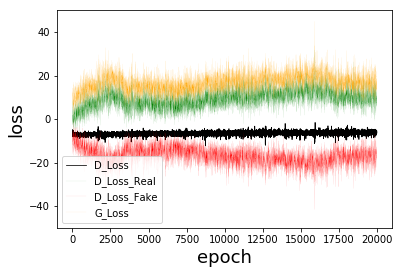

In [11]:
#batch 128 / 20000 epochs / Initial LR : 0.0006
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.75, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.05, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.05, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.05, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-50, 50)
plt.legend()
plt.show()

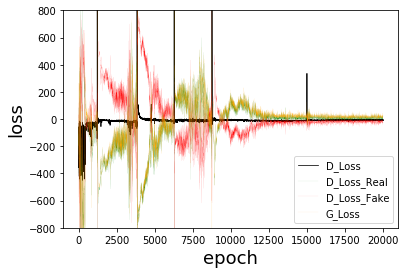

In [15]:
# plt.ylim(-800, 800)

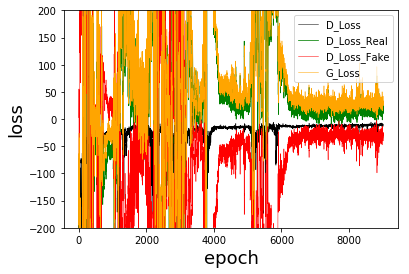

In [10]:
#batch 128 / 9000 epochs
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.75, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.15, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.15, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.15, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-200, 200)
plt.legend()
plt.show()

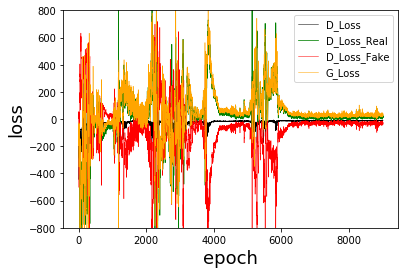

In [11]:
#batch 128 / 9000 epochs
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-800, 800)
plt.legend()
plt.show()